**1. Upload the dataset and drop the duplicates**

In [1]:
# Import the pandas library with the alias 'pd'
import pandas as pd

# Specify the file path where the CSV file is located
csv_file_path = "Data/amazon_comments.csv"

# Read the CSV file into a pandas DataFrame using pd.read_csv()
df = pd.read_csv(csv_file_path)

# Select specific columns from the DataFrame
df = df[['Product Price', 'Review - Rating', 'Review - Body', 'Search', 'Review - Date', 'Brand']]

# Display the resulting DataFrame
df


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/578171848.py:7: DtypeWarning: Columns (5,6,8,9,10,11,18,21,23,24,25,27,29,30,31,32,33,35,36,37,39,40,41,42,43,44,46,49,52,53,54,55,56,57,59,60,62,66,67,68,69,70,71,74,75,76,77,80,81,82,84,85,86,87,89,90,91,92,94,95,97,98,99,100,102,103,104,105,106,107,108,109,110,112,113,114,116,117,118,119,120,121,122,123,126,127,128,129,130,131,132,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Product Price     Review - Rating  \
0              86..  4.0 out of 5 stars   
1              86..  4.0 out of 5 stars   
2              86..  5.0 out of 5 stars   
3              86..  3.0 out of 5 stars   
4              86..  5.0 out of 5 stars   
...             ...                 ...   
21900          29..  5.0 out of 5 stars   
21901          29..  5.0 out of 5 stars   
21902          29..  5.0 out of 5 stars   
21903          29..  5.0 out of 5 stars   
21904          29..  5.0 out of 5 stars   

                                           Review - Body   Search  \
0      \n\n\n\n\n\n\n\n  \n  \n    The phone looks ex...   iPhone   
1      \n\n\n\n\n\n\n\n  \n  \n    Battery life is no...   iPhone   
2      \n\n\n\n\n\n\n\n  \n  \n    Perfect for my 11 ...   iPhone   
3      \n\n\n\n\n\n\n\n  \n  \n    It arrived within ...   iPhone   
4      \n\n\n\n\n\n\n\n  \n  \n    2nd mobile phonr\n...   iPhone   
...                                                  ...      ...   
21900  \n\n\n\n\n\n\n\n  \n  \n    Purchased these af...  AirPods   
21901  \n\n\n\n\n\n\n\n  \n  \n    It is a perfect re...  AirPods   
21902  \n\n\n\n\n\n\n\n  \n  \n    The case works per...  AirPods   
21903  \n\n\n\n\n\n\n\n  \n  \n    These were a perfe...  AirPods   
21904  \n\n\n\n\n\n\n\n  \n  \n    work well and good...  AirPods   

                                           Review - Date  Brand  
0      Reviewed in the United Kingdom on 14 October 2023  Apple  
1      Reviewed in the United Kingdom on 19 September...  Apple  
2      Reviewed in the United Kingdom on 16 October 2023  Apple  
3        Reviewed in the United Kingdom on 19 April 2023  Apple  
4      Reviewed in the United Kingdom on 27 September...  Apple  
...                                                  ...    ...  
21900  Reviewed in the United Kingdom on 16 November ...  Apple  
21901  Reviewed in the United Kingdom on 16 November ...  Apple  
21902  Reviewed in the United Kingdom on 6 November 2023  Apple  
21903  Reviewed in the United Kingdom on 31 October 2023  Apple  
21904  Reviewed in the United Kingdom on 2 November 2023  Apple  

[21905 rows x 6 columns]

In [2]:
# Filter the df to include only rows where the 'Brand' column contains 'Apple'
df = df[df['Brand'].str.contains('Apple', na=False, case=False)]

# Count the occurrences of each unique product
df['Search'].value_counts()


AirPods        10802
iPad            3690
iPhone          3400
Macbook         2319
Apple Watch     1694
Name: Search, dtype: int64

In [3]:
# Drop duplicate rows from df based on the specified subset of columns
df = df.drop_duplicates(subset=['Search', 'Review - Body'])

# Count the occurrences of each unique product
df['Search'].value_counts()


AirPods        10802
iPad            3690
iPhone          3400
Macbook         2319
Apple Watch     1694
Name: Search, dtype: int64

**2. Drop unnecessary columns**

In [4]:
# Display concise information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product Price    21905 non-null  object
 1   Review - Rating  21905 non-null  object
 2   Review - Body    21904 non-null  object
 3   Search           21905 non-null  object
 4   Review - Date    21905 non-null  object
 5   Brand            21905 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [5]:
# Rename specific columns
df.rename(columns={'Review - Body': 'Comment_Body', 'Review - Date': 'Date'}, inplace=True)

# Drop the 'Brand' column
df.drop(['Brand'], axis=1, inplace=True)

# Display concise information
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product Price    21905 non-null  object
 1   Review - Rating  21905 non-null  object
 2   Comment_Body     21904 non-null  object
 3   Search           21905 non-null  object
 4   Date             21905 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


**3. Adjust the type of the columns**

In [6]:
# Splitting the 'Date' column values based on whitespace and taking the last three elements.
df['Date'] = df['Date'].str.split().str[-3:].str.join(' ')

# Converting the modified 'Date' column to a pandas datetime format.
df['Date'] = pd.to_datetime(df['Date'])

# Displaying information about the DataFrame, including data types and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product Price    21905 non-null  object        
 1   Review - Rating  21905 non-null  object        
 2   Comment_Body     21904 non-null  object        
 3   Search           21905 non-null  object        
 4   Date             21905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ MB


In [7]:
# Extracting the first group of consecutive digits from each element in the 'Review - Rating' column.
df['Review - Rating'] = df['Review - Rating'].str.extract('(\d+)')

# Converting the extracted string values to integers using the 'astype(int)' method.
df['Review - Rating'] = df['Review - Rating'].astype(int)

# Displaying information about the DataFrame, including data types and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product Price    21905 non-null  object        
 1   Review - Rating  21905 non-null  int64         
 2   Comment_Body     21904 non-null  object        
 3   Search           21905 non-null  object        
 4   Date             21905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [8]:
df['Product Price'] = df['Product Price'].str.replace(r'[^\d]', '', regex=True)
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product Price    21905 non-null  int64         
 1   Review - Rating  21905 non-null  int64         
 2   Comment_Body     21904 non-null  object        
 3   Search           21905 non-null  object        
 4   Date             21905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.0+ MB


In [9]:
# Removing newline characters ('\n') from each element in the 'Comment_Body' column.
df['Comment_Body'] = df['Comment_Body'].str.replace('\n', '', regex=False)

# Removing double spaces ('  ') from each element in the 'Comment_Body' column.
df['Comment_Body'] = df['Comment_Body'].str.replace('  ', '', regex=False)

# Converting the 'Comment_Body' column to strings. This step may be redundant if the data is already in string format.
df['Comment_Body'] = df['Comment_Body'].astype(str)

# Creating a boolean mask to filter out rows where the 'Comment_Body' column contains the specified substring.
mask = ~df['Comment_Body'].str.contains("clickstreamNexusMetricsConfig")

# Applying the mask to the DataFrame, keeping only the rows where the condition is True.
df = df[mask]

# Displaying the modified DataFrame.
df


Product Price  Review - Rating  \
0                 86                4   
1                 86                4   
2                 86                5   
3                 86                3   
4                 86                5   
...              ...              ...   
21900             29                5   
21901             29                5   
21902             29                5   
21903             29                5   
21904             29                5   

                                            Comment_Body   Search       Date  
0      The phone looks exactly as it it has just come...   iPhone 2023-10-14  
1      Battery life is not very good... needs chargin...   iPhone 2023-09-19  
2      Perfect for my 11 year old for walking about i...   iPhone 2023-10-16  
3      It arrived within two days but had problems pe...   iPhone 2023-04-19  
4                                       2nd mobile phonr   iPhone 2023-09-27  
...                                                  ...      ...        ...  
21900  Purchased these after my original airpods case...  AirPods 2023-11-16  
21901  It is a perfect replacement for the AirPod 2ch...  AirPods 2023-11-16  
21902  The case works perfectly for my daughter’s air...  AirPods 2023-11-06  
21903  These were a perfect replacement for the AirPo...  AirPods 2023-10-31  
21904                             work well and good fit  AirPods 2023-11-02  

[21084 rows x 5 columns]

**3. Check the duplicates**

In [10]:
df = df.drop_duplicates()
df


Product Price  Review - Rating  \
0                 86                4   
1                 86                4   
2                 86                5   
3                 86                3   
4                 86                5   
...              ...              ...   
21900             29                5   
21901             29                5   
21902             29                5   
21903             29                5   
21904             29                5   

                                            Comment_Body   Search       Date  
0      The phone looks exactly as it it has just come...   iPhone 2023-10-14  
1      Battery life is not very good... needs chargin...   iPhone 2023-09-19  
2      Perfect for my 11 year old for walking about i...   iPhone 2023-10-16  
3      It arrived within two days but had problems pe...   iPhone 2023-04-19  
4                                       2nd mobile phonr   iPhone 2023-09-27  
...                                                  ...      ...        ...  
21900  Purchased these after my original airpods case...  AirPods 2023-11-16  
21901  It is a perfect replacement for the AirPod 2ch...  AirPods 2023-11-16  
21902  The case works perfectly for my daughter’s air...  AirPods 2023-11-06  
21903  These were a perfect replacement for the AirPo...  AirPods 2023-10-31  
21904                             work well and good fit  AirPods 2023-11-02  

[21084 rows x 5 columns]

**6. Detect the language and drop null values**

In [11]:
# Importing the 'detect' function from the 'langdetect' module.
from langdetect import detect

# Defining a function 'detect_language' that takes a 'comment' as input and attempts to detect its language.
def detect_language(comment):
    try:
        # Using the 'detect' function to determine the language of the given 'comment'.
        return detect(comment)
    except:
        # Handling exceptions that may occur during language detection and returning None in such cases.
        return None

# Applying the 'detect_language' function to each element in the 'Comment_Body' column of the DataFrame.
df['Language'] = df['Comment_Body'].apply(detect_language)

# Counting the occurrences of each language in the 'Language' column and displaying the counts.
df['Language'].value_counts()


en    19513
it      306
de      292
es      274
fr      248
ja       68
af       62
ca       53
pt       52
ro       29
so       20
nl       20
et       18
da       17
no       16
sv       16
tl       13
pl       12
cy       12
fi        6
sl        5
id        5
hu        4
tr        3
vi        3
sk        2
sq        2
cs        1
lt        1
sw        1
ru        1
hi        1
Name: Language, dtype: int64

In [12]:
df.dropna(inplace=True)
df['Search'].value_counts()


AirPods        10440
iPad            3672
iPhone          3333
Macbook         1950
Apple Watch     1681
Name: Search, dtype: int64

In [13]:
df['Language'].value_counts()

en    19513
it      306
de      292
es      274
fr      248
ja       68
af       62
ca       53
pt       52
ro       29
so       20
nl       20
et       18
da       17
no       16
sv       16
tl       13
pl       12
cy       12
fi        6
sl        5
id        5
hu        4
tr        3
vi        3
sk        2
sq        2
cs        1
lt        1
sw        1
ru        1
hi        1
Name: Language, dtype: int64

In [14]:
df[df['Language']=='tr']

Product Price  Review - Rating          Comment_Body   Search  \
4651              43                4                   Yes     iPad   
13361             39                4           Thank you 😊  AirPods   
21026             17                3  Little to big, bulky  AirPods   

            Date Language  
4651  2023-09-13       tr  
13361 2022-12-03       tr  
21026 2022-09-16       tr

In [15]:
df['Language'] = df['Language'].replace('tr', 'en')
df[df['Language']=='tr']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [16]:
df[df['Language']=='hi']

Product Price  Review - Rating  \
18875             79                3   

                                            Comment_Body   Search       Date  \
18875  । bud की साउंड क्वालिटी अच्छी है । और इसका anc...  AirPods 2023-11-05   

      Language  
18875       hi

In [17]:
df[df['Language']=='fi']

Product Price  Review - Rating          Comment_Body   Search  \
2033             380                5             Brilliant   iPhone   
4846              18                5          Superb value  AirPods   
6614              81                4                 Happy     iPad   
11460            515                5              Tutto ok  Macbook   
12249             46                5                  okay  AirPods   
21024             17                5  Too listen too music  AirPods   

            Date Language  
2033  2023-07-06       fi  
4846  2022-09-12       fi  
6614  2023-10-03       fi  
11460 2020-02-07       fi  
12249 2023-10-28       fi  
21024 2022-05-06       fi

In [18]:
df['Language'] = df['Language'].replace('fi', 'it')
df[df['Language']=='fi']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [19]:
df[df['Language']=='ru']

Product Price  Review - Rating Comment_Body   Search       Date  \
11325            989                4      Для игр  Macbook 2023-11-12   

      Language  
11325       ru

In [20]:
df[df['Language']=='sq']

Product Price  Review - Rating       Comment_Body   Search       Date  \
13795              6                5  I like it so much  AirPods 2023-09-11   
17054              6                5      She liked it.  AirPods 2023-10-30   

      Language  
13795       sq  
17054       sq

In [21]:
df['Language'] = df['Language'].replace('sq', 'en')
df[df['Language']=='sq']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [22]:
df[df['Language']=='sk']

Product Price  Review - Rating Comment_Body       Search       Date  \
1213             129                1       Broken  Apple Watch 2022-05-09   
15942              7                4  Produto bom      AirPods 2023-10-12   

      Language  
1213        sk  
15942       sk

In [23]:
df.loc[df['Comment_Body'].str.contains('Like very much'), 'Language'] = 'en'
df[df['Language']=='sk']


Product Price  Review - Rating Comment_Body       Search       Date  \
1213             129                1       Broken  Apple Watch 2022-05-09   
15942              7                4  Produto bom      AirPods 2023-10-12   

      Language  
1213        sk  
15942       sk

In [24]:
df[df['Language']=='id']

Product Price  Review - Rating Comment_Body   Search       Date  \
432             1249                5        Super   iPhone 2022-12-03   
4764               4                4      Not bad  AirPods 2020-06-18   
11508           1249                1    don't buy  Macbook 2023-09-18   
13923             28                4  Kamm gut an  AirPods 2023-01-23   
19575             13                2         Same  AirPods 2023-05-24   

      Language  
432         id  
4764        id  
11508       id  
13923       id  
19575       id

In [25]:
df.loc[df['Comment_Body'].str.contains('Super'), 'Language'] = 'en'
df[df['Language']=='id']


Product Price  Review - Rating Comment_Body   Search       Date  \
4764               4                4      Not bad  AirPods 2020-06-18   
11508           1249                1    don't buy  Macbook 2023-09-18   
13923             28                4  Kamm gut an  AirPods 2023-01-23   
19575             13                2         Same  AirPods 2023-05-24   

      Language  
4764        id  
11508       id  
13923       id  
19575       id

In [26]:
df[df['Language']=='cs']

Product Price  Review - Rating                 Comment_Body  Search  \
2171            226                4  No problemsBit small (obvs)  iPhone   

           Date Language  
2171 2023-10-26       cs

In [27]:
df['Language'] = df['Language'].replace('cs', 'en')
df[df['Language']=='cs']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [28]:
df[df['Language']=='sl']

Product Price  Review - Rating Comment_Body   Search       Date  \
322              418                5       Regalo   iPhone 2023-10-08   
4612              12                5         Love     iPad 2023-09-09   
6321              51                5  In love!!!!     iPad 2023-05-04   
8033              12                5       Travel     iPad 2023-11-03   
10189            330                4    I love it  Macbook 2019-11-19   

      Language  
322         sl  
4612        sl  
6321        sl  
8033        sl  
10189       sl

In [29]:
df['Language'] = df['Language'].replace('sl', 'en')
df.loc[df['Comment_Body'].str.contains('Regalo'), 'Language'] = 'tl'
df[df['Language']=='sl']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [30]:
df[df['Language']=='vi']

Product Price  Review - Rating              Comment_Body   Search  \
186              679                5                   TOP!!!!   iPhone   
3655              26                5  THE BARCODE IS NOT VALID   iPhone   
20281             24                4                        Na  AirPods   

            Date Language  
186   2023-10-27       vi  
3655  2023-10-04       vi  
20281 2020-12-15       vi

In [31]:
df.loc[df['Comment_Body'].str.contains('THE BARCODE IS NOT VALID'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('A bit chunky'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("don't buy"), 'Language'] = 'en'
df[df['Language']=='vi']

Product Price  Review - Rating Comment_Body   Search       Date  \
186              679                5      TOP!!!!   iPhone 2023-10-27   
20281             24                4           Na  AirPods 2020-12-15   

      Language  
186         vi  
20281       vi

In [32]:
df[df['Language']=='hu']

Product Price  Review - Rating Comment_Body       Search       Date  \
1191             399                4     But lagy  Apple Watch 2023-10-29   
19012              7                5           A1      AirPods 2021-05-02   
19134             18                5           a1      AirPods 2023-09-26   
19313             39                5      All ok.      AirPods 2022-02-08   

      Language  
1191        hu  
19012       hu  
19134       hu  
19313       hu

In [33]:
df.loc[df['Comment_Body'].str.contains("But lagy"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("All ok."), 'Language'] = 'en'
df[df['Language']=='hu']


Product Price  Review - Rating Comment_Body   Search       Date  \
19012              7                5           A1  AirPods 2021-05-02   
19134             18                5           a1  AirPods 2023-09-26   

      Language  
19012       hu  
19134       hu

In [34]:
df[df['Language']=='et']

Product Price  Review - Rating         Comment_Body       Search  \
530              213                4     Seems just great       iPhone   
2265             318                5  It is just like new       iPhone   
3027             458                5     My aunt likes it       iPhone   
4448              20                5          looks great       iPhone   
5325              11                5           Good value         iPad   
6789              10                4                Liked         iPad   
6997              12                5             Liked it         iPad   
9424              24                4       Bon ajustement  Apple Watch   
9588              15                5        Looks good on  Apple Watch   
9752              25                4           Looks good  Apple Watch   
9879             350                5    Works just fine 🤝      Macbook   
11108            399                4           good value      Macbook   
12035            139                5         Son likes it      AirPods   
13498             28                5             Alles ok      AirPods   
19603             14                5      Good value item      AirPods   
21159            113                2          See headlne      AirPods   
21587             64                5            Faultless      AirPods   
21890             10                5                 Like      AirPods   

            Date Language  
530   2022-12-25       et  
2265  2023-03-25       et  
3027  2023-10-19       et  
4448  2023-08-20       et  
5325  2023-03-21       et  
6789  2023-11-14       et  
6997  2023-11-10       et  
9424  2023-08-23       et  
9588  2023-10-08       et  
9752  2023-04-21       et  
9879  2023-10-10       et  
11108 2023-10-28       et  
12035 2023-11-08       et  
13498 2023-10-30       et  
19603 2022-10-08       et  
21159 2023-03-14       et  
21587 2021-05-07       et  
21890 2022-06-23       et

In [35]:
df['Language'] = df['Language'].replace('et', 'en')
df[df['Language']=='et']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [36]:
df[df['Language']=='pl']

Product Price  Review - Rating  \
906               20                5   
4271               9                4   
5013              19                5   
10754            164                5   
11726            819                5   
12506              9                4   
14903             15                5   
15908             24                5   
16175              6                4   
16817            149                5   
17882             23                5   
20973             69                3   

                                            Comment_Body       Search  \
906                                            Very nice      AirPods   
4271                                skidbriebskznienejdd       iPhone   
5013   Myślałem że to będzie prosta chińska branzolet...  Apple Watch   
10754                                       Web browsing      Macbook   
11726                                           nice one      Macbook   
12506                                             Was ok      AirPods   
14903  Plusy: podobają mi się, zapominam, ze mam je w...      AirPods   
15908                Szybka przesyłka. Dobrze zapakowane      AirPods   
16175                                       Góod product      AirPods   
16817  Słuchawki doskonale współpracują z telefonem o...      AirPods   
17882              Dobre słuchawki zwłaszcza za tę cenę.      AirPods   
20973  Nie dało się połączyć z telefonem, próbowałem ...      AirPods   

            Date Language  
906   2022-07-07       pl  
4271  2023-10-18       pl  
5013  2023-07-11       pl  
10754 2023-10-31       pl  
11726 2022-05-11       pl  
12506 2023-06-08       pl  
14903 2023-10-14       pl  
15908 2023-07-07       pl  
16175 2023-10-08       pl  
16817 2022-12-12       pl  
17882 2023-11-01       pl  
20973 2023-11-15       pl

In [37]:
df.loc[df['Comment_Body'].str.contains("Very nice"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("nice one"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Góod product"), 'Language'] = 'en'
df[df['Language']=='pl']


Product Price  Review - Rating  \
4271               9                4   
5013              19                5   
10754            164                5   
12506              9                4   
14903             15                5   
15908             24                5   
16817            149                5   
17882             23                5   
20973             69                3   

                                            Comment_Body       Search  \
4271                                skidbriebskznienejdd       iPhone   
5013   Myślałem że to będzie prosta chińska branzolet...  Apple Watch   
10754                                       Web browsing      Macbook   
12506                                             Was ok      AirPods   
14903  Plusy: podobają mi się, zapominam, ze mam je w...      AirPods   
15908                Szybka przesyłka. Dobrze zapakowane      AirPods   
16817  Słuchawki doskonale współpracują z telefonem o...      AirPods   
17882              Dobre słuchawki zwłaszcza za tę cenę.      AirPods   
20973  Nie dało się połączyć z telefonem, próbowałem ...      AirPods   

            Date Language  
4271  2023-10-18       pl  
5013  2023-07-11       pl  
10754 2023-10-31       pl  
12506 2023-06-08       pl  
14903 2023-10-14       pl  
15908 2023-07-07       pl  
16817 2022-12-12       pl  
17882 2023-11-01       pl  
20973 2023-11-15       pl

In [38]:
df[df['Language']=='no']

Product Price  Review - Rating  \
999              129                5   
2637               8                5   
5244              46                4   
5961               7                5   
10744            239                2   
13801              9                4   
15750             84                5   
16407             19                5   
16907             29                5   
17523              7                5   
17924             49                5   
19884             34                5   
20106              7                4   
20649             18                2   
21561            114                4   
21834             16                4   

                                            Comment_Body       Search  \
999                              A preset or my grandson      AirPods   
2637   Lovely material being tpu subtle sparkle, very...       iPhone   
5244                                         i like slay         iPad   
5961                                         Comfortable  Apple Watch   
10744                                          No koment      Macbook   
13801                                           Like my👌      AirPods   
15750                              Like sound and style.      AirPods   
16407                           Not genuine samsung make      AirPods   
16907                              Great listening enjoy      AirPods   
17523                          Never regret getting this      AirPods   
17924                                          I like it      AirPods   
19884                      Comfortable , value for money      AirPods   
20106                                  Perfette x Xiaomi      AirPods   
20649                       Not great One keeps stopping      AirPods   
21561                                         Vanno bene      AirPods   
21834              5 star made my little girl very happy      AirPods   

            Date Language  
999   2023-05-06       no  
2637  2023-09-25       no  
5244  2023-03-01       no  
5961  2023-10-15       no  
10744 2023-09-07       no  
13801 2023-10-13       no  
15750 2023-10-03       no  
16407 2022-06-07       no  
16907 2022-12-02       no  
17523 2023-11-07       no  
17924 2022-12-04       no  
19884 2023-01-11       no  
20106 2022-12-07       no  
20649 2023-08-02       no  
21561 2022-08-07       no  
21834 2016-09-14       no

In [39]:
df['Language'] = df['Language'].replace('no', 'en')
df.loc[df['Comment_Body'].str.contains("Vanno bene"), 'Language'] = 'it'
df[df['Language']=='no']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [40]:
df[df['Language']=='cy']

Product Price  Review - Rating           Comment_Body       Search  \
1717             330                5                Parfait      Macbook   
3339              13                5            Good length       iPhone   
3384               7                5          All good.....       iPhone   
3446               7                4              All good.       iPhone   
4401               7                5         Very good buy.       iPhone   
4874               6                4           Good charger  Apple Watch   
5668               2                4  You get what you paid  Apple Watch   
6171             119                5            Why buy new         iPad   
10396            389                5                    n/a      Macbook   
11174            349                5         Very well made      Macbook   
14583             16                5          Really good 👍      AirPods   
19936              7                5               My phone      AirPods   

            Date Language  
1717  2021-11-22       cy  
3339  2023-11-10       cy  
3384  2023-08-27       cy  
3446  2023-04-15       cy  
4401  2021-10-01       cy  
4874  2023-11-07       cy  
5668  2022-10-09       cy  
6171  2022-08-01       cy  
10396 2020-05-18       cy  
11174 2023-09-25       cy  
14583 2023-11-06       cy  
19936 2023-07-26       cy

In [41]:
df['Language'] = df['Language'].replace('cy', 'en')
df[df['Language']=='cy']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [42]:
df[df['Language']=='sv']

Product Price  Review - Rating  \
1430             199                4   
5213              69                5   
7347              44                5   
8259              21                4   
14391             19                5   
16084             58                5   
16139             25                4   
16887             48                2   
17068             48                5   
17544             52                5   
17799             24                5   
18303             27                5   
19665             28                5   
19742             65                4   
19743             65                1   
21681             71                5   

                                            Comment_Body   Search       Date  \
1430                                 Hat alles geklappt!     iPad 2021-02-02   
5213            Passar perfekt och färgen är fantastisk.     iPad 2023-03-15   
7347                               an excellent keyboard     iPad 2023-11-05   
8259                                     Seems so far ok     iPad 2023-02-23   
14391             Fodralet är snyggt och passar perfekt.  AirPods 2023-09-10   
16084  Bra batteritid, bra ljud, bra app där du kan ä...  AirPods 2023-09-29   
16139  De är små och lätta att ta med sig och håller ...  AirPods 2023-05-28   
16887  Jag köpte dessa för att kunna ta emot samtal, ...  AirPods 2023-06-25   
17068  Jag har nyligen köpt och testat Urbanista Seou...  AirPods 2023-03-04   
17544  Klockrent ljud, har dock inte testat om de ver...  AirPods 2020-12-15   
17799                           Välligt bra och billigt.  AirPods 2023-02-12   
18303                                         Five stars  AirPods 2023-09-25   
19665  Köpte denna till min 12-åring (Lilla Bönan) so...  AirPods 2023-10-28   
19742  Båda är likadana. Man kan alltså använda en i ...  AirPods 2022-11-20   
19743  Fick en produkt som vae helt död, både före oc...  AirPods 2023-05-07   
21681  Jag är överväldigad av dessa hörlurar som inte...  AirPods 2023-10-24   

      Language  
1430        sv  
5213        sv  
7347        sv  
8259        sv  
14391       sv  
16084       sv  
16139       sv  
16887       sv  
17068       sv  
17544       sv  
17799       sv  
18303       sv  
19665       sv  
19742       sv  
19743       sv  
21681       sv

In [43]:
df.loc[df['Comment_Body'].str.contains("I like it so much"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Five stars"), 'Language'] = 'en'
df[df['Language']=='sv']

Product Price  Review - Rating  \
1430             199                4   
5213              69                5   
7347              44                5   
8259              21                4   
14391             19                5   
16084             58                5   
16139             25                4   
16887             48                2   
17068             48                5   
17544             52                5   
17799             24                5   
19665             28                5   
19742             65                4   
19743             65                1   
21681             71                5   

                                            Comment_Body   Search       Date  \
1430                                 Hat alles geklappt!     iPad 2021-02-02   
5213            Passar perfekt och färgen är fantastisk.     iPad 2023-03-15   
7347                               an excellent keyboard     iPad 2023-11-05   
8259                                     Seems so far ok     iPad 2023-02-23   
14391             Fodralet är snyggt och passar perfekt.  AirPods 2023-09-10   
16084  Bra batteritid, bra ljud, bra app där du kan ä...  AirPods 2023-09-29   
16139  De är små och lätta att ta med sig och håller ...  AirPods 2023-05-28   
16887  Jag köpte dessa för att kunna ta emot samtal, ...  AirPods 2023-06-25   
17068  Jag har nyligen köpt och testat Urbanista Seou...  AirPods 2023-03-04   
17544  Klockrent ljud, har dock inte testat om de ver...  AirPods 2020-12-15   
17799                           Välligt bra och billigt.  AirPods 2023-02-12   
19665  Köpte denna till min 12-åring (Lilla Bönan) so...  AirPods 2023-10-28   
19742  Båda är likadana. Man kan alltså använda en i ...  AirPods 2022-11-20   
19743  Fick en produkt som vae helt död, både före oc...  AirPods 2023-05-07   
21681  Jag är överväldigad av dessa hörlurar som inte...  AirPods 2023-10-24   

      Language  
1430        sv  
5213        sv  
7347        sv  
8259        sv  
14391       sv  
16084       sv  
16139       sv  
16887       sv  
17068       sv  
17544       sv  
17799       sv  
19665       sv  
19742       sv  
19743       sv  
21681       sv

In [44]:
df[df['Language']=='tl']

Product Price  Review - Rating         Comment_Body       Search  \
322              418                5               Regalo       iPhone   
1806               0                5                  nan       iPhone   
2606              16                5           Durability       iPhone   
5020              18                5   Still looking good  Apple Watch   
5216              28                5              My ipad         iPad   
5469               8                5            It’s okay         iPad   
6637               9                5      Housing my ipad         iPad   
11204            699                5  Great gaming laptop      Macbook   
12751             47                4              Is okay      AirPods   
14799             15                5                  N/A      AirPods   
16825              8                5              Bang on      AirPods   
19433             11                2                 Okay      AirPods   
21349             11                1   Wouldn’t buy again      AirPods   

            Date Language  
322   2023-10-08       tl  
1806  2023-10-15       tl  
2606  2023-09-26       tl  
5020  2023-03-11       tl  
5216  2023-11-07       tl  
5469  2022-08-06       tl  
6637  2023-11-04       tl  
11204 2023-10-29       tl  
12751 2023-10-26       tl  
14799 2023-01-09       tl  
16825 2023-11-14       tl  
19433 2023-07-27       tl  
21349 2022-03-25       tl

In [45]:
df['Language'] = df['Language'].replace('tl', 'en')
df.loc[df['Comment_Body'].str.contains('Regalo'), 'Language'] = 'tl'
df[df['Language']=='tl']

Product Price  Review - Rating Comment_Body  Search       Date Language
322            418                5       Regalo  iPhone 2023-10-08       tl

In [46]:
df[df['Language']=='so']

Product Price  Review - Rating                  Comment_Body  \
96               223                4                          good   
176                0                5                          Good   
772              189                5                      All good   
990               19                5               Thank you ☺️ xx   
1209             129                1                       No good   
1354            1254                5                         goods   
1616             350                5                       AllGood   
2880              16                1                       Rubbish   
4807              39                4                             x   
5107              15                4                So far so good   
5716               9                5         Way to fit looks good   
7099              16                1                           Bad   
7860              11                5                       Is good   
7877              85                4                      Good but   
9114              13                4                      all good   
15697             13                5                  Relaxing xXx   
17366              9                3  WOULNT BUY AGAIN, CUMBERSOME   
18884             27                4                     Thankyou!   
20334             87                5                         Good!   
20573              7                5                        No bad   

            Search       Date Language  
96          iPhone 2023-06-10       so  
176         iPhone 2023-08-05       so  
772           iPad 2023-10-21       so  
990        AirPods 2023-10-21       so  
1209   Apple Watch 2023-10-02       so  
1354       Macbook 2023-09-30       so  
1616       Macbook 2023-01-13       so  
2880        iPhone 2023-10-09       so  
4807       AirPods 2023-08-13       so  
5107          iPad 2023-08-04       so  
5716   Apple Watch 2023-10-04       so  
7099          iPad 2023-01-27       so  
7860          iPad 2023-11-05       so  
7877          iPad 2023-01-04       so  
9114   Apple Watch 2023-10-14       so  
15697      AirPods 2023-09-11       so  
17366      AirPods 2023-11-08       so  
18884      AirPods 2023-07-07       so  
20334      AirPods 2023-04-11       so  
20573      AirPods 2023-04-12       so

In [47]:
df['Language'] = df['Language'].replace('so', 'en')
df[df['Language']=='so']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [48]:
df[df['Language']=='da']

Product Price  Review - Rating  \
3346              13                5   
4497              12                5   
5069              13                5   
5378              15                5   
5850              12                3   
5939               8                5   
6429              10                5   
6682              14                5   
8363              31                3   
8543              16                5   
8764              39                3   
12700             25                4   
13484             16                3   
15970             75                5   
16780             16                4   
17073             24                1   
18598             52                1   

                                           Comment_Body       Search  \
3346                           Great job very versatile       iPhone   
4497                        Prefect design for toddlers         iPad   
5069                                           Softness         iPad   
5378   Nice design good support A1 seller fast delivery         iPad   
5850                                        So returned  Apple Watch   
5939             great find, fast delivery, great style  Apple Watch   
6429                                Great item for kids         iPad   
6682                                        Recommended         iPad   
8363                                    Faster delivery         iPad   
8543                           Well designed and sturdy         iPad   
8764                                            Average      AirPods   
12700                                    Great for kids      AirPods   
13484                                          Returned      AirPods   
15970                                Remarkable design!      AirPods   
16780                              Good for bike riders      AirPods   
17073                           Item broke after 2 days      AirPods   
18598                                    Already broken      AirPods   

            Date Language  
3346  2023-10-16       da  
4497  2023-07-09       da  
5069  2020-05-19       da  
5378  2023-07-02       da  
5850  2023-10-27       da  
5939  2023-02-28       da  
6429  2023-05-18       da  
6682  2023-10-17       da  
8363  2023-07-12       da  
8543  2022-10-30       da  
8764  2023-08-07       da  
12700 2023-09-20       da  
13484 2023-07-02       da  
15970 2023-10-12       da  
16780 2023-10-01       da  
17073 2023-11-09       da  
18598 2023-11-01       da

In [49]:
df['Language'] = df['Language'].replace('da', 'en')
df[df['Language']=='da']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [50]:
df[df['Language']=='nl']

Product Price  Review - Rating  \
402               29                5   
1329              12                5   
1769             565                4   
2568               6                4   
5563              11                4   
6176             119                3   
8606              29                2   
8780              89                4   
9629              71                5   
9630              71                4   
12958             29                2   
13793              6                1   
14196             19                5   
15463             29                5   
18171             19                5   
18743             20                3   
18992             20                3   
19175             16                5   
19734              9                5   
21530             47                3   

                                            Comment_Body       Search  \
402    Dit is de beste van de drie lederen portemonne...       iPhone   
1329                      Small in size, big on value...      AirPods   
1769   Ik was erg zenuwachtig voor de refurbished aan...       iPhone   
2568                                           Fits well       iPhone   
5563   Heel mooi past perfect, spijtig waar twee kapo...  Apple Watch   
6176   De iPad zelf lijkt voorlopig goed te functione...         iPad   
8606   er zijn onder verschillende merknamen veel van...         iPad   
8780                                              Decent      AirPods   
9629   Ging op vakantie een paar dagen de woestijn in...  Apple Watch   
9630   Mooie powerbank. Strak model. Kabeltje usb C -...  Apple Watch   
12958                                          Not happy      AirPods   
13793                                             Poor:(      AirPods   
14196  Het zijn super fijne oortjes, makkelijk te ver...      AirPods   
15463                               Belkin just the best      AirPods   
18171                                           Niceeeee      AirPods   
18743  Ik wilde draadloze oordopjes om mee te slapen....      AirPods   
18992                                               Poor      AirPods   
19175                                        Replacement      AirPods   
19734  ze komen opgeladen aan.kan ze gelijk gebruiken...      AirPods   
21530  Prima voor het geld wat ik ervoor betaald heb....      AirPods   

            Date Language  
402   2023-10-29       nl  
1329  2023-10-24       nl  
1769  2023-10-07       nl  
2568  2023-10-16       nl  
5563  2021-09-24       nl  
6176  2021-12-20       nl  
8606  2023-03-31       nl  
8780  2020-11-06       nl  
9629  2023-06-13       nl  
9630  2023-04-22       nl  
12958 2022-12-13       nl  
13793 2023-05-05       nl  
14196 2022-05-05       nl  
15463 2022-12-13       nl  
18171 2019-05-30       nl  
18743 2023-08-07       nl  
18992 2023-03-15       nl  
19175 2023-03-18       nl  
19734 2022-08-22       nl  
21530 2023-06-25       nl

In [51]:
df.loc[df['Comment_Body'].str.contains('Replacement'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Poor'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Niceeeee'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Nice look'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Belkin just the best'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Poor'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Nice screen'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Decent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('It broken'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good make I would get one again'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('general use'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good headset'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Looks good.Ok value.Haven’t '), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Small in size, big on value'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Broken'), 'Language'] = 'en'
df[df['Language']=='nl']


Product Price  Review - Rating  \
402               29                5   
1769             565                4   
2568               6                4   
5563              11                4   
6176             119                3   
8606              29                2   
9629              71                5   
9630              71                4   
12958             29                2   
14196             19                5   
18743             20                3   
19734              9                5   
21530             47                3   

                                            Comment_Body       Search  \
402    Dit is de beste van de drie lederen portemonne...       iPhone   
1769   Ik was erg zenuwachtig voor de refurbished aan...       iPhone   
2568                                           Fits well       iPhone   
5563   Heel mooi past perfect, spijtig waar twee kapo...  Apple Watch   
6176   De iPad zelf lijkt voorlopig goed te functione...         iPad   
8606   er zijn onder verschillende merknamen veel van...         iPad   
9629   Ging op vakantie een paar dagen de woestijn in...  Apple Watch   
9630   Mooie powerbank. Strak model. Kabeltje usb C -...  Apple Watch   
12958                                          Not happy      AirPods   
14196  Het zijn super fijne oortjes, makkelijk te ver...      AirPods   
18743  Ik wilde draadloze oordopjes om mee te slapen....      AirPods   
19734  ze komen opgeladen aan.kan ze gelijk gebruiken...      AirPods   
21530  Prima voor het geld wat ik ervoor betaald heb....      AirPods   

            Date Language  
402   2023-10-29       nl  
1769  2023-10-07       nl  
2568  2023-10-16       nl  
5563  2021-09-24       nl  
6176  2021-12-20       nl  
8606  2023-03-31       nl  
9629  2023-06-13       nl  
9630  2023-04-22       nl  
12958 2022-12-13       nl  
14196 2022-05-05       nl  
18743 2023-08-07       nl  
19734 2022-08-22       nl  
21530 2023-06-25       nl

In [52]:
df[df['Language']=='ro']

Product Price  Review - Rating  \
474                0                5   
567             2977                5   
1422             139                5   
2312             239                5   
2407              34                5   
2518               6                5   
2813              18                5   
2965               8                5   
3275              15                5   
3336              19                4   
4522              63                5   
5067              13                5   
5322              11                5   
5413              48                5   
5959               7                4   
6402             175                5   
6498              27                5   
7529             699                5   
10525            164                4   
11205            699                5   
12398              8                4   
14465             16                5   
15161             14                5   
15572             69                5   
17055              6                5   
18097             29                5   
19314             39                5   
19703             12                5   

                                           Comment_Body       Search  \
474                                                Nice       iPhone   
567    just a beautiful laptop, came fast - great item.      Macbook   
1422                                      Great product         iPad   
2312                                       Great device       iPhone   
2407                            Nice case, nice colour.       iPhone   
2518                     Nice product at a great price.       iPhone   
2813                   Excellent service great product.       iPhone   
2965                             Nice fit. Robust case.       iPhone   
3275                                        Fab product       iPhone   
3336                                       Nice product       iPhone   
4522                                        Exceptional         iPad   
5067                           price good, size perfect         iPad   
5322                                      Nice product,         iPad   
5413                                     Beautiful case         iPad   
5959                                         nice strap  Apple Watch   
6402                                      Great produxt         iPad   
6498                                              great         iPad   
7529                           Extra useful, great sise         iPad   
10525                                       Nice laptop      Macbook   
11205                                      great laptop      Macbook   
12398                                             Price      AirPods   
14465                   Fantastic service great product      AirPods   
15161               Excellent product at a great price.      AirPods   
15572                                         Excelente      AirPods   
17055            Great large size, durable, great color      AirPods   
18097                                Great I appreciate      AirPods   
19314             Great value for a great product 5star      AirPods   
19703                                Great price at £11      AirPods   

            Date Language  
474   2023-10-03       ro  
567   2023-10-05       ro  
1422  2023-07-07       ro  
2312  2023-05-09       ro  
2407  2023-11-12       ro  
2518  2023-11-07       ro  
2813  2023-11-05       ro  
2965  2023-10-31       ro  
3275  2023-11-11       ro  
3336  2023-10-17       ro  
4522  2023-09-29       ro  
5067  2020-11-22       ro  
5322  2023-08-13       ro  
5413  2023-10-02       ro  
5959  2023-09-25       ro  
6402  2019-03-31       ro  
6498  2023-02-08       ro  
7529  2022-02-19       ro  
10525 2023-11-12       ro  
11205 2023-09-05       ro  
12398 2023-10-29       ro  
14465 2023-07-16       ro  
15161 2023-11-03       ro  
15572 2023-08-18       ro  
17055 2023-10-04       ro  


In [53]:
df['Language'] = df['Language'].replace('ro', 'en')
df[df['Language']=='ro']

Empty DataFrame
Columns: [Product Price, Review - Rating, Comment_Body, Search, Date, Language]
Index: []

In [54]:
df[df['Language']=='ca']

Product Price  Review - Rating  \
239              749                5   
316              429                5   
390                8                5   
725              138                5   
794              649                5   
2595              34                5   
2646              15                5   
3201              16                5   
3460              20                5   
3579               8                5   
3669               7                5   
3749               9                5   
3801              15                5   
4213              22                5   
4291               7                5   
5111              15                5   
5278               9                5   
6407             701                5   
6795              10                5   
6878              15                5   
7405              27                5   
8115             120                5   
8147              12                5   
8432              12                5   
9101               7                5   
9452              15                5   
10127            349                5   
10855            269                5   
10902             79                5   
10918            449                5   
10969           1349                5   
12055             29                4   
12247             46                5   
12510              9                5   
12549             23                5   
12768             29                4   
13039             18                5   
14624              9                5   
14689             12                5   
15509              5                5   
16514             42                5   
17210             52                5   
17238             54                5   
17693             33                5   
17724             22                5   
18152             26                5   
19408              9                2   
19525             19                5   
19858              7                5   
20552            179                5   
20581              7                4   
20838             42                5   
21860            119                5   

                                            Comment_Body       Search  \
239                                            Excellent       iPhone   
316                                      Value for money       iPhone   
390                           Excellent and as described       iPhone   
725                    Fantastic company prompt delivery         iPad   
794                                                  Ext         iPad   
2595                  Excellent value. Arrived next day.       iPhone   
2646            Excellent product , good value for money       iPhone   
3201                             Good value fits perfect       iPhone   
3460                           Excellent value for money       iPhone   
3579                                  Good value product       iPhone   
3669                                         All perfect       iPhone   
3749                                       great quality       iPhone   
3801                                      Excellent case       iPhone   
4213                                       Great quality       iPhone   
4291                         Excellent value and service       iPhone   
5111                                 excellent well made         iPad   
5278                                   Excellent quality         iPad   
6407                                         Excellent 👌         iPad   
6795                   Excellent quality at a good price         iPad   
6878                                         Top quality         iPad   
7405                                  Excellent quality.         iPad   
8115   És un accesori imprescindible, l'ùnica pega és...         iPad   
8147                          Excellent item perfect fit         iPad   
8432                 Excellent value and

In [55]:
df['Language'] = df['Language'].replace('ca', 'en')
df.loc[df['Comment_Body'].str.contains('Es ist alles gut!'), 'Language'] = 'ca'
df.loc[df['Comment_Body'].str.contains('Questa marca non delude mai'), 'Language'] = 'ca'
df.loc[df['Comment_Body'].str.contains('Incòmodes'), 'Language'] = 'ca'
df.loc[df['Comment_Body'].str.contains('És un accesori imprescindible'), 'Language'] = 'ca'
df[df['Language']=='ca']

Product Price  Review - Rating  \
8115             120                5   
19408              9                2   
20838             42                5   
21860            119                5   

                                            Comment_Body   Search       Date  \
8115   És un accesori imprescindible, l'ùnica pega és...     iPad 2023-09-19   
19408                                          Incòmodes  AirPods 2022-07-05   
20838                        Questa marca non delude mai  AirPods 2023-10-22   
21860                                  Es ist alles gut!  AirPods 2021-03-27   

      Language  
8115        ca  
19408       ca  
20838       ca  
21860       ca

In [56]:
df[df['Language']=='pt']

Product Price  Review - Rating  \
5212              69                4   
5442              19                4   
6378             289                5   
7052              14                5   
9428              24                5   
10950            225                5   
13148             29                5   
13222             19                4   
13277             16                5   
13278             16                4   
13280             16                5   
13336             29                5   
13567             19                5   
13568             19                5   
13569             19                5   
14602             99                5   
15042            119                4   
15296             32                5   
15301             32                5   
15912             24                5   
15919              4                4   
15941              7                5   
16775             74                5   
16857             49                5   
17117              8                5   
17182             21                5   
17801             24                4   
17894             14                5   
18198             24                3   
18199             24                5   
18200             24                5   
18337             15                5   
18434            109                5   
18435            109                5   
18438            109                5   
18635             44                4   
18636             44                5   
18637             44                5   
18638             44                5   
18639             44                5   
18641             44                5   
19145             59                4   
19146             59                3   
19147             59                5   
19600             99                4   
19844             25                1   
19984              9                5   
20503             47                5   
20762            139                5   
21160            113                5   
21163            113                4   

                                            Comment_Body       Search  \
5212   Caríssimo mas... original, o magnetico dele é ...         iPad   
5442   Gosto muito deste porta-iPad, é resistente e p...         iPad   
6378   O tablete está em bom estado, veio bem embalad...         iPad   
7052                                            Fabulous         iPad   
9428   Oferece boa proteção e se adapta muito bem ao ...  Apple Watch   
10950  """"VERYS""""""""EXCELLENTS""""""""M""""A""""C...      Macbook   
13148                                Comode da indossare      AirPods   
13222  Estou escrevendo esse review após 4 meses de u...      AirPods   
13277  Se adequa bem ao ouvido e fica bem firme, da p...      AirPods   
13278  No início até que atendia as expectativas mas ...      AirPods   
13280  Fone muito bom, qualidade de som é boa e longa...      AirPods   
13336   Muito bom, o som é ótimo e a bateria espetacular      AirPods   
13567  Chegou em perfeito estado e o Phone é muito bom .      AirPods   
13568                                excelente o produto      AirPods   
13569  Dos vários que já tive e que experimentei esse...      AirPods   
14602  Muito bom. entrega super rapida. Exatamente o ...      AirPods   
15042  Produto com a qualidade esperada JBL. Som Exce...      AirPods   
15296  Não sou capaz de avaliar, pois o item foi roub...      AirPods   
15301  Apresenta um som ótimo com conforto e a bateri...      AirPods   
15912  REGALO DI BABBO NATALE PERFETTO PER UNA BIMBA ...      AirPods   
15919                                             Comodo      AirPods   
15941  Fácil instalação. Fortes. Chegou tudo certinho!!!      AirPods   
16775  Produto Ótimo, eu já queria comprar um faz tem...      AirPods   
16857                                         Boa compra      AirPods   
17117                          Useful item, as de

In [57]:
df.loc[df['Comment_Body'].str.contains('Same'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Fabulous'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Useful item, as described'), 'Language'] = 'en'
df[df['Language']=='pt']

Product Price  Review - Rating  \
5212              69                4   
5442              19                4   
6378             289                5   
9428              24                5   
10950            225                5   
13148             29                5   
13222             19                4   
13277             16                5   
13278             16                4   
13280             16                5   
13336             29                5   
13567             19                5   
13568             19                5   
13569             19                5   
14602             99                5   
15042            119                4   
15296             32                5   
15301             32                5   
15912             24                5   
15919              4                4   
15941              7                5   
16775             74                5   
16857             49                5   
17182             21                5   
17801             24                4   
17894             14                5   
18198             24                3   
18199             24                5   
18200             24                5   
18337             15                5   
18434            109                5   
18435            109                5   
18438            109                5   
18635             44                4   
18636             44                5   
18637             44                5   
18638             44                5   
18639             44                5   
18641             44                5   
19145             59                4   
19146             59                3   
19147             59                5   
19600             99                4   
19844             25                1   
19984              9                5   
20503             47                5   
20762            139                5   
21160            113                5   
21163            113                4   

                                            Comment_Body       Search  \
5212   Caríssimo mas... original, o magnetico dele é ...         iPad   
5442   Gosto muito deste porta-iPad, é resistente e p...         iPad   
6378   O tablete está em bom estado, veio bem embalad...         iPad   
9428   Oferece boa proteção e se adapta muito bem ao ...  Apple Watch   
10950  """"VERYS""""""""EXCELLENTS""""""""M""""A""""C...      Macbook   
13148                                Comode da indossare      AirPods   
13222  Estou escrevendo esse review após 4 meses de u...      AirPods   
13277  Se adequa bem ao ouvido e fica bem firme, da p...      AirPods   
13278  No início até que atendia as expectativas mas ...      AirPods   
13280  Fone muito bom, qualidade de som é boa e longa...      AirPods   
13336   Muito bom, o som é ótimo e a bateria espetacular      AirPods   
13567  Chegou em perfeito estado e o Phone é muito bom .      AirPods   
13568                                excelente o produto      AirPods   
13569  Dos vários que já tive e que experimentei esse...      AirPods   
14602  Muito bom. entrega super rapida. Exatamente o ...      AirPods   
15042  Produto com a qualidade esperada JBL. Som Exce...      AirPods   
15296  Não sou capaz de avaliar, pois o item foi roub...      AirPods   
15301  Apresenta um som ótimo com conforto e a bateri...      AirPods   
15912  REGALO DI BABBO NATALE PERFETTO PER UNA BIMBA ...      AirPods   
15919                                             Comodo      AirPods   
15941  Fácil instalação. Fortes. Chegou tudo certinho!!!      AirPods   
16775  Produto Ótimo, eu já queria comprar um faz tem...      AirPods   
16857                                         Boa compra      AirPods   
17182  Funciona muito bem. Se conecta com uma facilid...      AirPods   
17801  Se você tem um ouvido de criança tipo eu kkkk ...      AirPods   
17894  Bem interessante para o valor que custou . Não...  

In [58]:
df[df['Language']=='af']

Product Price  Review - Rating  \
79               149                5   
98               223                4   
283               11                5   
350              404                5   
656               84                5   
789              104                5   
910               20                5   
929               49                5   
2832               9                5   
3368              26                4   
3560               9                5   
3584               8                5   
3671               7                5   
3726               9                5   
4293               7                5   
4395               7                5   
4552             129                5   
4944              18                5   
5135              14                5   
5363               8                5   
5602              12                4   
6085             139                5   
6203             167                5   
6260             129                4   
7189               7                5   
7214               8                5   
7650             129                5   
8120              19                5   
8298              21                5   
8426              12                5   
8441              12                3   
8940               7                5   
9606               5                5   
9855            1799                5   
10221            249                5   
11028            150                5   
11311            189                5   
11606            199                5   
11966             16                5   
12835             11                1   
12864              9                1   
12966             59                1   
13332             29                1   
13564             19                5   
14789              8                5   
16014              7                1   
16446             24                2   
16837             10                2   
17143             42                2   
18550             25                2   
18959             29                5   
19887             29                3   
19906             15                5   
20010              9                5   
20523             29                5   
20701              9                5   
20803             20                1   
21311              7                1   
21364             18                1   
21420              8                5   

                                        Comment_Body       Search       Date  \
79                                           Goons 😀       iPhone 2022-12-28   
98                                       Very good 😊       iPhone 2023-05-03   
283                                               Ok       iPhone 2022-11-21   
350                                        Very good       iPhone 2023-07-18   
656                                       Works well       iPhone 2023-02-01   
789                                        very good         iPad 2023-04-20   
910                          fit well and good value      AirPods 2023-01-02   
929                             Work well Good value      AirPods 2023-10-19   
2832                                 I mean it works       iPhone 2023-11-07   
3368                     Does not work after 2 weeks       iPhone 2022-12-11   
3560                      Looks good and feels great       iPhone 2023-11-02   
3584                                         Suoer e       iPhone 2023-09-29   
3671                       Makes phone look like new       iPhone 2023-09-27   
3726             Looks good, feels good. All’s good.       iPhone 2023-10-09   
4293                                         Awesome       iPhone 2023-08-19   
4395                                   Goodit of kit       iPhone 2022-06-22   
4552                                      Werks well         iPad 2022-11-14   
4944                             I like it very much  Apple Watch

In [59]:
df['Language'] = df['Language'].replace('af', 'en')
df.loc[df['Comment_Body'].str.contains('gute ipad ,gute versand,alles'), 'Language'] = 'af'
df.loc[df['Comment_Body'].str.contains('Hat alles geklappt!'), 'Language'] = 'af'
df[df['Language']=='af']

Product Price  Review - Rating  \
1430            199                4   
6260            129                4   

                                  Comment_Body Search       Date Language  
1430                       Hat alles geklappt!   iPad 2021-02-02       af  
6260  gute ipad ,gute versand,alles in ordung.   iPad 2023-02-04       af

In [60]:
df[df['Language']=='ja']

Product Price  Review - Rating  \
2817              17                3   
2818              17                3   
2819              17                3   
2820              17                3   
2821              17                3   
...              ...              ...   
20764            139                5   
20775             26                4   
20972             69                4   
21020            299                5   
21401             77                2   

                                            Comment_Body   Search       Date  \
2817               とても良いが、少し剥がれやすいのかも…それ以外は、とても気に入っています！   iPhone 2023-11-11   
2818   他のレビューにもあるように、貼るのは簡単ですが埃が入ります。同メーカーのレンズ用のものに交換...   iPhone 2023-10-29   
2819   皆さんが指摘している、ケースからの出っ張りや粘着力について、私は問題なかったのですが、iPh...   iPhone 2023-10-17   
2820   カメラリングがゴム製でなくて良い。ただ少し浮いてくる。spigenは比較的有名だから品質良い...   iPhone 2023-10-14   
2821                      わかっていたことですが、ケースをつけても厚みではみだします。   iPhone 2023-10-15   
...                                                  ...      ...        ...   
20764  電車に乗ることが多く、十数年ずっとカナル型イヤホンを使っていましたが、こちらのが圧倒的に耳へ...  AirPods 2023-07-18   
20775  (2023/03/05追記あり)あのスマホがイヤホンジャック廃止になったことにより、Blue...  AirPods 2019-10-17   
20972             旦那さんの誕生日プレゼントで買いました！音も問題なく毎日使っているようです。  AirPods 2023-04-18   
21020  Shure535から数万円のイヤホンを使い始め、ワイヤレスイヤホンとしては、BOSE→B&O...  AirPods 2023-11-11   
21401  使って2ヶ月程度ですが勝手に音楽のon/offを繰り返すようになりました。HyperX周辺機...  AirPods 2023-10-14   

      Language  
2817        ja  
2818        ja  
2819        ja  
2820        ja  
2821        ja  
...        ...  
20764       ja  
20775       ja  
20972       ja  
21020       ja  
21401       ja  

[68 rows x 6 columns]

In [61]:
df[df['Language']=='fr']

Product Price  Review - Rating  \
4                 86                5   
17               899                5   
18               899                5   
87               149                4   
89               149                4   
...              ...              ...   
21735             29                5   
21863             44                2   
21864             44                5   
21865             44                1   
21866             44                2   

                                            Comment_Body   Search       Date  \
4                                       2nd mobile phonr   iPhone 2023-09-27   
17     C’est certainement le meilleur smartphone de l...   iPhone 2023-10-28   
18     S’adapte parfaitement à mon iPhone 15+. Rien à...   iPhone 2023-10-29   
87     État parfait. Fonctionnement RAS.État batterie...   iPhone 2023-10-13   
89     J'ai reçus le colis il y a quelques temps et p...   iPhone 2023-04-15   
...                                                  ...      ...        ...   
21735                      Très bon rapport qualité prix  AirPods 2022-06-27   
21863  J'étais assez contente de mon achat jusqu'à ce...  AirPods 2023-09-03   
21864  Commande arriver rapidement alors que sa devai...  AirPods 2022-06-23   
21865                        Un écouteur sur 2 marche ..  AirPods 2023-01-29   
21866  J'ai acheté 2 paires de ces écouteurs et toujo...  AirPods 2023-04-24   

      Language  
4           fr  
17          fr  
18          fr  
87          fr  
89          fr  
...        ...  
21735       fr  
21863       fr  
21864       fr  
21865       fr  
21866       fr  

[240 rows x 6 columns]

In [62]:
df[df['Language']=='es']

Product Price  Review - Rating  \
85               149                4   
182              679                5   
201              942                5   
203              942                5   
205              942                5   
...              ...              ...   
21560            114                5   
21588             64                5   
21842             99                5   
21862             44                5   
21885             14                4   

                                            Comment_Body   Search       Date  \
85     Aparentemente parece nuevo, pero hay algunas z...   iPhone 2023-02-20   
182    Muy buen tamaño, batería, pantalla y software....   iPhone 2023-10-27   
201    Bien por Google y su Pixel 8 pro. Tengo aún mi...   iPhone 2023-10-15   
203    Tras un par de días de uso intensivo puede dec...   iPhone 2023-10-16   
205    Vengo del 7 pro y este viene a mejorar pantall...   iPhone 2023-10-29   
...                                                  ...      ...        ...   
21560  Sohermosos y el sonido excelente, pero la app ...  AirPods 2023-06-29   
21588  un buen producto a un buen precio para una gam...  AirPods 2023-01-29   
21842  Tengo otras marcas de audífonos true wireless ...  AirPods 2020-12-29   
21862  Cómodos, fáciles de utilizar y buen sonido. Se...  AirPods 2023-06-05   
21885  Me encantan.Por $35 compiten con los AirPods p...  AirPods 2022-10-27   

      Language  
85          es  
182         es  
201         es  
203         es  
205         es  
...        ...  
21560       es  
21588       es  
21842       es  
21862       es  
21885       es  

[273 rows x 6 columns]

In [63]:
df[df['Language']=='de']

Product Price  Review - Rating  \
16               899                5   
119              999                5   
204              942                4   
401               29                5   
434             1249                5   
...              ...              ...   
21683             71                5   
21685             71                5   
21856            119                4   
21858            119                5   
21859            119                5   

                                            Comment_Body   Search       Date  \
16     Wie jedes Jahr wollte ich mir nicht das neue i...   iPhone 2023-09-27   
119    Das neue iPhone 15 Pro hat ein iPhone 11 Pro a...   iPhone 2023-10-20   
204    Ich habe das Google Pixel 8 Pro mit meinem alt...   iPhone 2023-10-15   
401    Ich hatte vorher auch eine Handyhülle von Torr...   iPhone 2023-10-18   
434    Das iPhone 14 Pro Max ist zweifellos ein herau...   iPhone 2023-10-08   
...                                                  ...      ...        ...   
21683  Ich muss gestehen, ich bin sprachlos! Die Goog...  AirPods 2023-08-03   
21685  Meine vorherigen In-Ears, ebenfalls mit ANC (J...  AirPods 2023-02-22   
21856  Ich habe diese Buds gekauft, da das Paar, das ...  AirPods 2023-05-19   
21858  Es gefällt mir sehr gut. Ich nutze es für Frei...  AirPods 2022-08-30   
21859  Kann ich nur weiterempfehlen für jeden Android...  AirPods 2021-05-23   

      Language  
16          de  
119         de  
204         de  
401         de  
434         de  
...        ...  
21683       de  
21685       de  
21856       de  
21858       de  
21859       de  

[278 rows x 6 columns]

In [64]:
df[df['Language']=='it']

Product Price  Review - Rating  \
86               149                5   
88               149                5   
179              679                5   
180              679                4   
181              679                5   
...              ...              ...   
21678             71                5   
21679             71                4   
21682             71                5   
21883             14                5   
21884             14                4   

                                            Comment_Body   Search       Date  \
86     L'iPhone SE 2020 credo che ad oggi sia ancora ...   iPhone 2023-07-06   
88     Arrivato in ottime condizioni estetiche, con c...   iPhone 2023-10-17   
179    Da fan dei Googlefonini ho avuto praticamente ...   iPhone 2023-10-14   
180    Ho avuto in passato nexus, dopo un periodo più...   iPhone 2023-10-23   
181    Questo Pixel 8 è un ottimo telefono sia lato s...   iPhone 2023-10-14   
...                                                  ...      ...        ...   
21678  Salve!Ho acquistato questi Auricolari per il P...  AirPods 2023-08-19   
21679  Come da descrizione, qualità audio tra i migli...  AirPods 2023-11-15   
21682  Ho preso pixel 8 pro e pixel Watch 2 in sincro...  AirPods 2023-11-11   
21883  Innanzitutto mi complimento col servizio Amazo...  AirPods 2022-01-28   
21884  Discreta qualità, fanno il loro dovere. Passat...  AirPods 2023-08-03   

      Language  
86          it  
88          it  
179         it  
180         it  
181         it  
...        ...  
21678       it  
21679       it  
21682       it  
21883       it  
21884       it  

[308 rows x 6 columns]

In [65]:
df = df[df['Language']=='en']
df.Language.value_counts()


en    19806
Name: Language, dtype: int64

In [66]:
df.Search.value_counts()

AirPods        9713
iPad           3478
iPhone         3151
Macbook        1860
Apple Watch    1604
Name: Search, dtype: int64

In [67]:
def top_1000_comments(group):
    sorted_group = group.sort_values(by='Comment_Body', key=lambda x: x.str.len(), ascending=False)
    return sorted_group.head(1000)

df = df.groupby('Search').apply(top_1000_comments)
df.reset_index(drop=True, inplace=True)
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**6. Visualize the dataset**

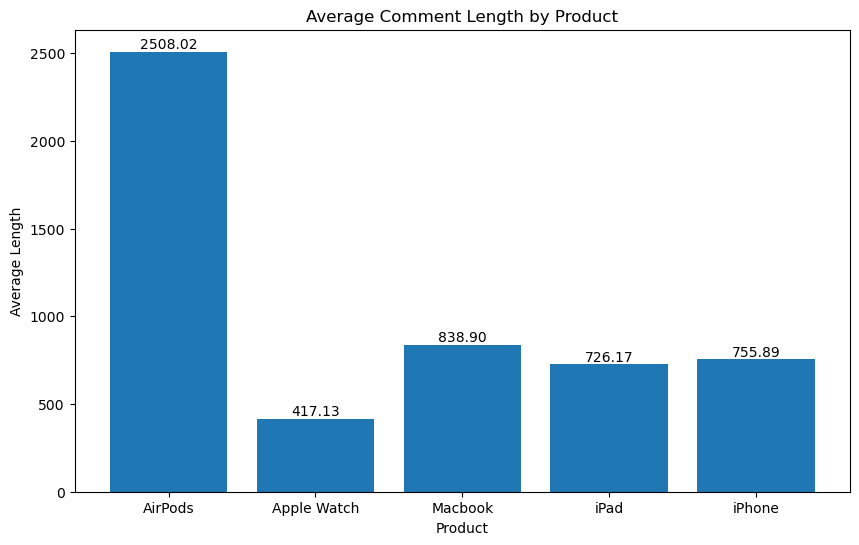

In [68]:
import matplotlib.pyplot as plt

average_lengths = df.groupby('Search')['Comment_Body'].apply(lambda x: x.str.len().mean()).reset_index()
average_lengths.rename(columns={'Comment_Body': 'Average_Length'}, inplace=True)

# Create a bigger bar chart,
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_plot = plt.bar(average_lengths['Search'], average_lengths['Average_Length'])

# Add text annotations with the average lengths on the bars
for i, value in enumerate(average_lengths['Average_Length']):
    plt.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Average Length')
plt.title('Average Comment Length by Product')

plt.show()


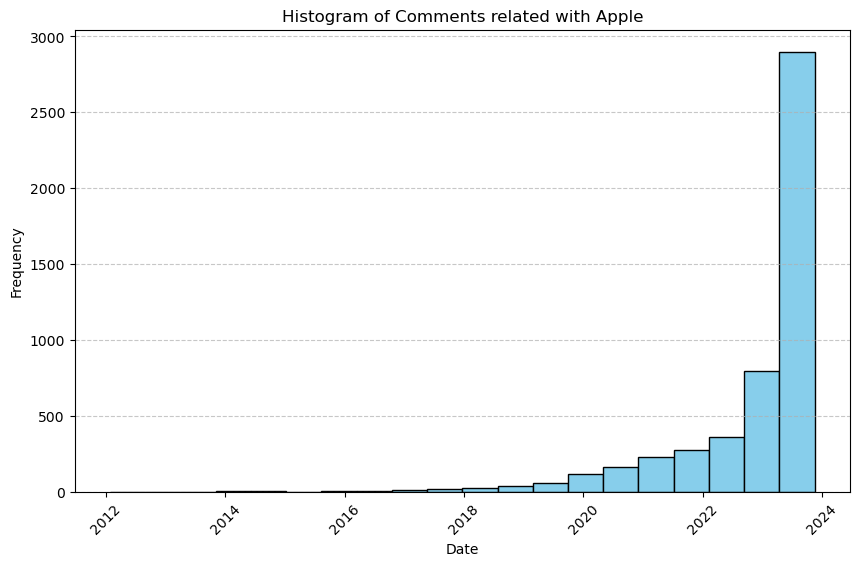

In [69]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()


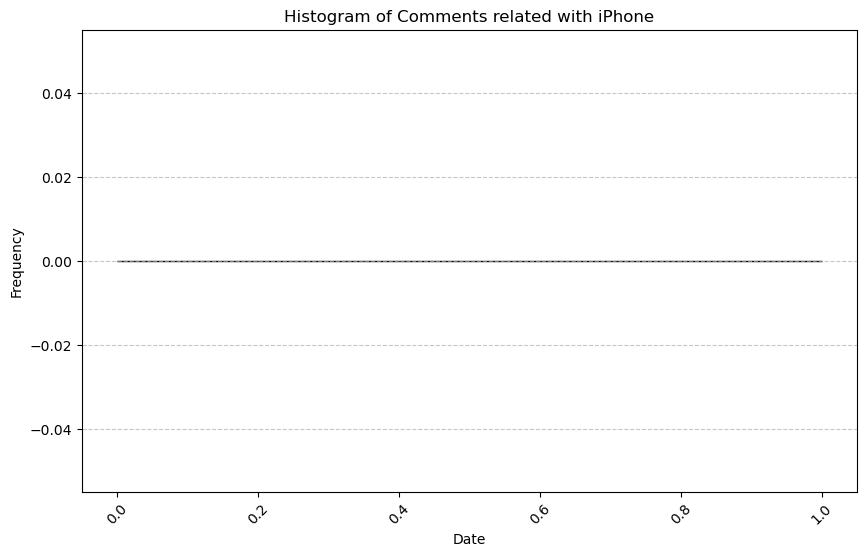

In [70]:
df_iphone = df[df['Search']=='iPhone']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_iphone['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPhone')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



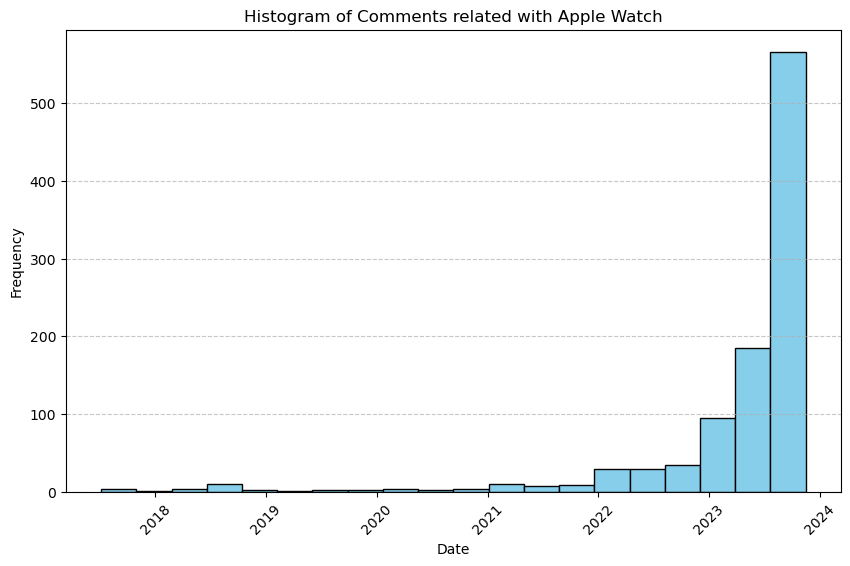

In [71]:
df_watch = df[df['Search']=='Apple Watch']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_watch['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple Watch')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



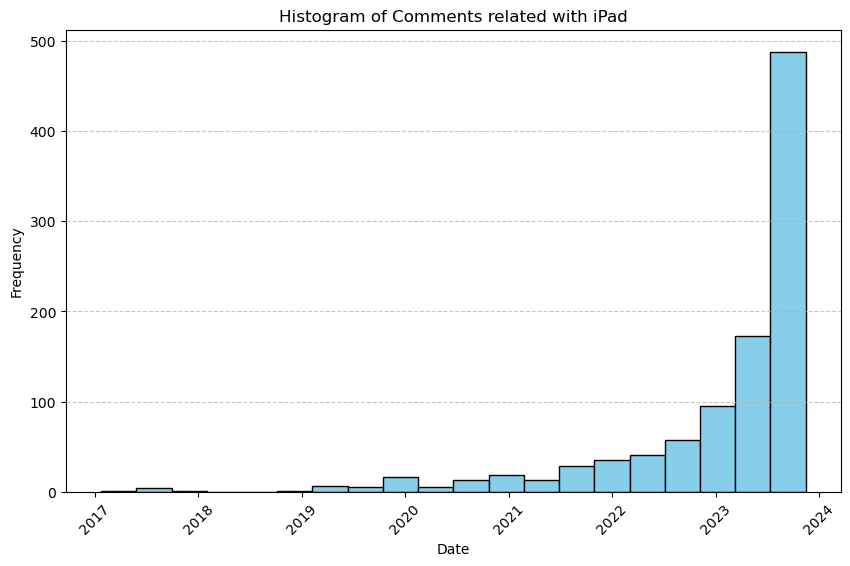

In [72]:
df_ipad = df[df['Search']=='iPad']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_ipad['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



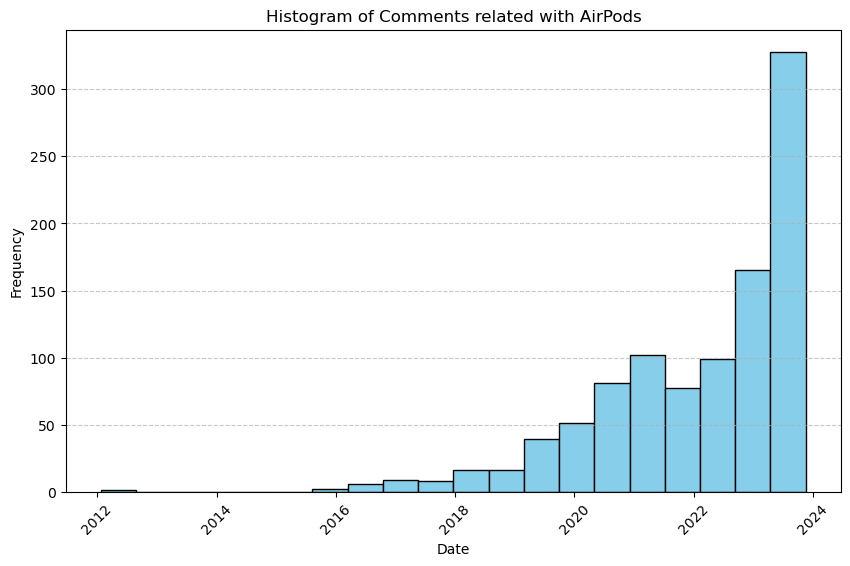

In [73]:
df_airpods = df[df['Search']=='AirPods']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_airpods['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with AirPods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



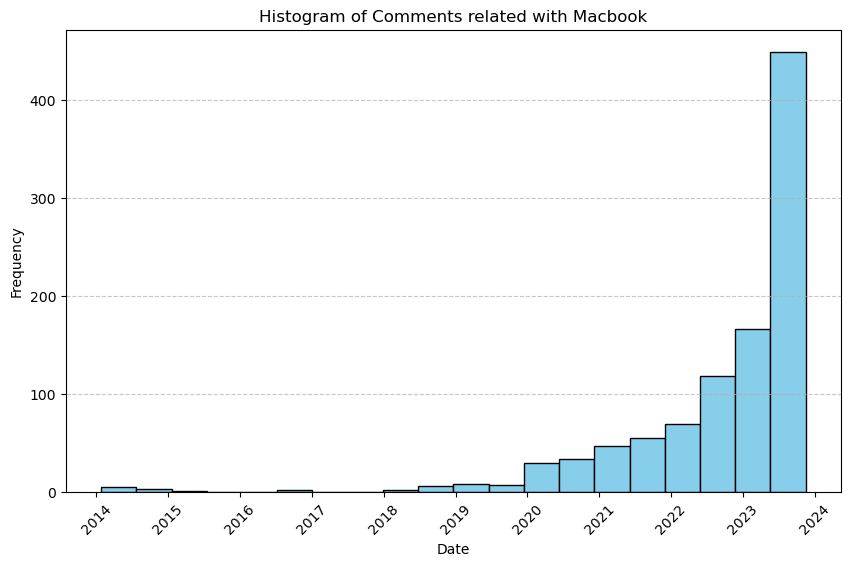

In [74]:
df_macbook = df[df['Search']=='Macbook']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_macbook['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Macbook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Product Price    5000 non-null   int64         
 1   Review - Rating  5000 non-null   int64         
 2   Comment_Body     5000 non-null   object        
 3   Search           5000 non-null   object        
 4   Date             5000 non-null   datetime64[ns]
 5   Language         5000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 234.5+ KB


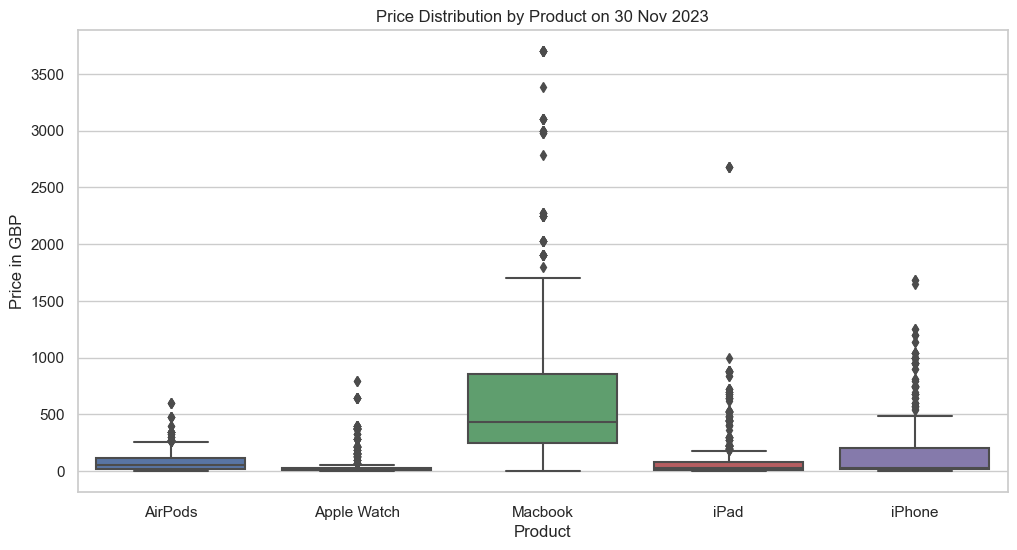

In [76]:
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='Search', y='Product Price', data=df)

# Set the title and labels of the boxplot
boxplot.set_title('Price Distribution by Product on 30 Nov 2023')
boxplot.set_xlabel('Product')
boxplot.set_ylabel('Price in GBP')

# Show the plot
plt.show()


**7.Apply Contractions to fix the comments**

In [77]:
# Importing the 'contractions' module, which provides a function to expand English contractions.
import contractions

# Applying the 'fix' function from 'contractions' to each element in the 'Comment_Body' column.
df['Fixed_Comment'] = df['Comment_Body'].apply(contractions.fix)

# Displaying rows where the 'Fixed_Comment' column is different from the original 'Comment_Body' column.
df[df['Fixed_Comment'] != df['Comment_Body']][8:]


Product Price  Review - Rating  \
8                79                5   
9               349                5   
10               79                5   
11              269                4   
12               55                2   
...             ...              ...   
4990            124                1   
4991            209                3   
4992             16                4   
4993            110                4   
4999            134                4   

                                           Comment_Body   Search       Date  \
8     Long time fan of Sony products. Have the WH-10...  AirPods 2023-04-22   
9     I'm pretty sure that people gave bad rating to...  AirPods 2023-03-31   
10    -- Updated review based on a few days of owner...  AirPods 2021-10-07   
11    Hello everyone,This review is for the:'Sennhei...  AirPods 2021-08-28   
12    UPDATE AT THE END OF THIS REVIEW:These Truly W...  AirPods 2019-12-04   
...                                                 ...      ...        ...   
4990  Got the phone and the battery actually goes do...   iPhone 2023-11-03   
4991  Refurb phone. Couldn’t get it to charge either...   iPhone 2023-02-24   
4992  This case looks very simple, but it's pretty d...   iPhone 2023-10-14   
4993  I ordered a white model but was sent a black m...   iPhone 2023-07-31   
4999  Most things about this purchase were great, th...   iPhone 2023-06-25   

     Language                                      Fixed_Comment  
8          en  Long time fan of Sony products. Have the WH-10...  
9          en  I am pretty sure that people gave bad rating t...  
10         en  -- Updated review based on a few days of owner...  
11         en  Hello everyone,This review is for the:'Sennhei...  
12         en  UPDATE AT THE END OF THIS REVIEW:These Truly W...  
...       ...                                                ...  
4990       en  Got the phone and the battery actually goes do...  
4991       en  Refurb phone. Could not get it to charge eithe...  
4992       en  This case looks very simple, but it is pretty ...  
4993       en  I ordered a white model but was sent a black m...  
4999       en  Most things about this purchase were great, th...  

[3805 rows x 7 columns]

**8. Patterns Substitution**

In [78]:
# Importing the 're' module, which provides support for regular expressions.
import re

# Defining regular expression patterns for different types of patterns to be matched in the text.
price_pattern = r'\$\d+(\.\d{2})?'  # Matches prices in the format $X.XX or $X
size_pattern = r'\b\d+(?:\.\d+)?(?:x\d+(?:\.\d+)?)?\b'  # Matches sizes like 10x10 or 2.5x3.2
volume_pattern = r'\b\d+(?:\.\d+)?\s*[Ll]\b'  # Matches volumes like 1L or 0.5 l
weight_pattern = r'\b\d+(?:\.\d+)?\s*[Kk][Gg]\b'  # Matches weights like 2.5 kg or 10.2 Kg

# Defining a function 'substitute_patterns' that substitutes matched patterns with placeholders.
def substitute_patterns(text):
    text = re.sub(price_pattern, '[PRICE]', text)
    text = re.sub(size_pattern, '[SIZE]', text)
    text = re.sub(volume_pattern, '[VOLUME]', text)
    text = re.sub(weight_pattern, '[WEIGHT]', text)
    return text

# Applying the 'substitute_patterns' function to each element in the 'Fixed_Comment' column.
df['Substituted_Comment'] = df['Fixed_Comment'].apply(substitute_patterns)

# Selecting rows where the 'Substituted_Comment' column is different from the 'Fixed_Comment' column.
df[df['Substituted_Comment'] != df['Fixed_Comment']][['Comment_Body', 'Substituted_Comment']][1:]


Comment_Body  \
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4     Firstly, let me apologise for the long read bu...   
5     Quick Summary:I bought them myself a week ago ...   
...                                                 ...   
4990  Got the phone and the battery actually goes do...   
4995  Just bought this MagSafe hybrid case with stan...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                    Substituted_Comment  
1     TL;DR - a stunning set of wireless headphones ...  
2     I bought these in May [SIZE] and a few other w...  
3     FURTHER UPDATE, FEB 2021I have experienced pai...  
4     Firstly, let me apologise for the long read bu...  
5     Quick Summary:I bought them myself a week ago ...  
...                                                 ...  
4990  Got the phone and the battery actually goes do...  
4995  Just bought this MagSafe hybrid case with stan...  
4997  The description says “Like New”. The appearanc...  
4998  I bought this iPhone [SIZE] as a reconditioned...  
4999  Most things about this purchase were great, th...  

[2925 rows x 2 columns]

**9. Http links replacement**

In [79]:
# Importing the 're' module, which provides support for regular expressions.
import re

# Defining a regular expression pattern to match URLs starting with 'http' or 'https'.
link_pattern = r'https?://\S+'

# Defining a function 'substitute_links' that replaces matched URLs with the placeholder '[LINK]'.
def substitute_links(text):
    return re.sub(link_pattern, '[LINK]', text)

# Applying the 'substitute_links' function to each element in the 'Substituted_Comment' column.
df['Replaced_Comment'] = df['Substituted_Comment'].apply(substitute_links)

# Displaying rows where the 'Substituted_Comment' column is different from the 'Replaced_Comment' column.
df[df['Substituted_Comment'] != df['Replaced_Comment']][['Comment_Body', 'Replaced_Comment']]


Comment_Body  \
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
33    Pros:Small & Lightweight with compact charging...   
1002  I wish I had read these reviews before I purch...   

                                       Replaced_Comment  
3     FURTHER UPDATE, FEB 2021I have experienced pai...  
33    Pros:Small & Lightweight with compact charging...  
1002  I wish I had read these reviews before I purch...

In [80]:
df = df[df["Replaced_Comment"]!="[[LINK]"]
df = df[df["Replaced_Comment"]!="[LINK]"]
df = df[df["Replaced_Comment"]!="&#x200B;\n\n[LINK]"]
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**10. Remove Line Breaks**

In [81]:
# Defining a function 'remove_line_breaks' that replaces newline characters '\n' with a space ' ' in the input text.
def remove_line_breaks(text):
    return text.replace('\n', ' ')

# Applying the 'remove_line_breaks' function to each element in the 'Replaced_Comment' column.
df['Without_LineBreaks'] = df['Replaced_Comment'].apply(remove_line_breaks)

# Displaying rows where the 'Replaced_Comment' column is different from the 'Without_LineBreaks' column.
df[df['Replaced_Comment'] != df['Without_LineBreaks']][['Comment_Body', 'Without_LineBreaks']]


Empty DataFrame
Columns: [Comment_Body, Without_LineBreaks]
Index: []

**12. Apply TextBlob to correct comments**

In [82]:
from textblob import TextBlob

words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma', 'If', 'Just', 'lossless', 'Pro', 
                 'This', 'Hey', 'Here', 'airpods', 'mic', 'audio', 'Pros', 'airpod', 'Max', 'Hi', 'fake', 'probuds', 
                 'mum', 'My', 'Cool', 'Bro', 'So', 'No', 'Do', 'Yoda', 'pods', 'Bought', 'What', 'To', 'Do',
                 'transparency', 'laptop']
lowercase_words_to_keep = {word.lower() for word in words_to_keep}  # Convert words to lowercase for comparison

def correct_comment(row):
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][:50]

Comment_Body  \
0   The Philips T8505 Active Noise Cancelling True...   
1   TL;DR - a stunning set of wireless headphones ...   
2   I bought these in May 2021 and a few other wir...   
3   FURTHER UPDATE, FEB 2021I have experienced pai...   
4   Firstly, let me apologise for the long read bu...   
5   Quick Summary:I bought them myself a week ago ...   
6   OVERVIEW: I've been in the market for wireless...   
7   Purchased these direct from amazon for just un...   
8   Long time fan of Sony products. Have the WH-10...   
9   I'm pretty sure that people gave bad rating to...   
10  -- Updated review based on a few days of owner...   
11  Hello everyone,This review is for the:'Sennhei...   
12  UPDATE AT THE END OF THIS REVIEW:These Truly W...   
13  The media could not be loaded. Don’t very ofte...   
14  Out of the box I managed to pair these up via ...   
15  Edit: added more at the endIf you had an aller...   
16  So far I’ve been through: Last two generations...   
17  I bought these to compliment my WH-1000xm4. I ...   
18  Headphones and earphones are a very subjective...   
19  Bang & Olufsen let loose a wild and toothless ...   
20  I purchased Bang & Olufsen's BeoPlay E8 (3rd g...   
21  OK so let's start by saying firstly I purchase...   
22  Now, I want to preface by saying that these da...   
23  Updated November 2022:Updated again: I have be...   
24  I've has these for about 3 weeks now and used ...   
25  UPDATE July 2 2017:At some point, I ended up u...   
26  I bought the SoundPEATS TrueFree+ because I've...   
27  I have had my Buds for about 6 months now and ...   
28  I have found AirPods the most ergonomic of the...   
29  If you're considering buying the Bose QC45, yo...   
30  The Belkin Soundform Immerse IEMs are delivere...   
31  I've been using these airpods for a little ove...   
32  12 Month Update:So after just over 12 months u...   
33  Pros:Small & Lightweight with compact charging...   
34  I was given a pair of these 2 years ago as a p...   
35  Before addressing the AirPods, you should know...   
36  Let's get the obvious out of the way: these bu...   
37  I think these are a decent pair of airpods. I ...   
38  I have been using the LG UFP-9 for over 11 mon...   
39  For anyone who knows the headphone market they...   
40  I was a little sceptical about these as some o...   
41  This is my first experience of an Anker Soundc...   
42  I'd been considering replacing my ISP router f...   
43  Having used the Sony XM4 buds, and phones, reg...   
44  I read and watched a lot of reviews about ANC ...   
45  Sound is amazing on these, no question about t...   
46  Looking for a quick summary? Jump to the botto...   
47  INITIAL THOUGHTS : Had these for about a month...   
48  I’ve been waiting to pull the trigger on these...   
49  I've been commuting for ages with a set of ove...   

                 Corrected_Comment(SentimentAnalysis)  
0   The Philip T8505 Active Noise Panelling True T...  
1   of ; of - a stunning set of tireless headphone...  
2   I bought these in May [ SIZE ] and a few other...  
3   FURTHER UPDATE , FEB 2021I have experienced pa...  
4   Firstly , let me apologise for the long read b...  
5   Quick Summary : I bought them myself a week ag...  
6   OVERVIEW : I have been in the market for tirel...  
7   Purchased these direct from amazon for just un...  
8   Long time fan of Bony products . Have the of -...  
9   I am pretty sure that people gave bad rating t...  
10  - - Updated review based on a few days of owne...  
11  Hello everyone , This review is for the : ' Se...  
12  UPDATE of THE END of THIS REVIEW : These Truly...  
13  The media could not be loaded . Do not very of...  
14  But of the box I managed to pair these up via ...  
15  Edit : added more at the end you had an allerg...  
16  So far I have been through : Last two generati...  
17  I bought these to compliment my of - 1000xm4 ....  
18  Headphones and earphones are a very subjective...  
19  Sang & Ol

In [83]:
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][50:100]


Comment_Body  \
50  Well firstly let's start with the biggest thin...   
51  As an introduction to this review, here is a s...   
52  I had a pair of Tozo Crystal airpods, which we...   
53  I have only had these a couple of hours and fe...   
54  ►TL;DR: Worst in every way than the amazing So...   
55  I have been a longtime fan of Skullcandy headp...   
56  I've been sold on the idea of "True Wireless" ...   
57  I have owned dozens of earphones over the year...   
58  ▬ Introduction ▬▬▬Before you even think about ...   
59  As a professional sound engineer, I do have ve...   
60  How can a flagship set of headphones from B&O ...   
61  The Sony WH-1000XM5 are the latest wireless he...   
62  I am so glad I bought these Huawei Freebuds 3....   
63  *Please be aware this review is being written ...   
64  I will definately update my review after a bit...   
65  The Liberty 2 Air Pro are very good headphones...   
66  I'm going to start with the most important thi...   
67  Firstly let me start by saying I’m a big fan o...   
68  Like others, I was sceptical at first due to t...   
69  These essentially are a perfect complement if ...   
70  This is an edit to my original review a couple...   
71  Update to my original review. Unfortunately sh...   
72  I should note upfront that I received these ea...   
73  To think I was afraid of a phone without a hea...   
74  The media could not be loaded. I purchased the...   
75  Quick summary: they sound great, the fit is a ...   
76  CLARIFYING EDIT: Regarding the awful volume bu...   
77  Only had them three days so will update if any...   
78  I see many people writing 1, 2, and 3-star rev...   
79  The Airloop Snap is a new concept to me: airpo...   
80  Setup:Setting up for an iPhone was easy, it is...   
81  Do I love these wireless bluetooth airpods? Eh...   
82  2022 UPDATE: Just ordered another one for an a...   
83  Finding myself now using my phone for playing ...   
84  I'll preface this with the fact that I'll be c...   
85  I read a lot of reviews prior to purchase, but...   
86  I picked up the Cleer Enduro ANC headphones to...   
87  The media could not be loaded. I ordered these...   
88  I researched these headphones against the equi...   
89  After 2 days research and much sucking of teet...   
90  I bought these having left my Sony active nois...   
91  I Have bought many sets of earphones and airpo...   
92  I have had the momentum 2 headphones for years...   
93  These airpods are around the 20 quid mark, so ...   
94  Just received my new blue Liberty Air 2 Pro ai...   
95  [I try to include everything in my reviews for...   
96  I've been looking for a set of wireless airpod...   
97  I was lucky enough to get B&O HX on Amazon pri...   
98  Okay so I have had so many airpods and headset...   
99  I can't talk about tiers and timing like the a...   

                 Corrected_Comment(SentimentAnalysis)  
50  Well firstly let us start with the biggest thi...  
51  Is an introduction to this review , here is a ...  
52  I had a pair of Too Crystal airpods , which we...  
53  I have only had these a couple of hours and fe...  
54  ► of ; of : Worst in every way than the amazin...  
55  I have been a longtime fan of Skullcandy headp...  
56  I have been sold on the idea of " True Tireles...  
57  I have owned dozens of earphones over the year...  
58  ▬ Introduction ▬ ▬ ▬ Before you even think abo...  
59  Is a professional sound engineer , I do have v...  
60  Now can a flagship set of headphones from B & ...  
61  The Bony of - 1000XM5 are the latest tireless ...  
62  I am so glad I bought these Huawei Freebuds [ ...  
63  * Please be aware this review is being written...  
64  I will definitely update my review after a bit...  
65  The Liberty [ SIZE ] Air Pro are very good hea...  
66  I am going to start with the most important th...  
67  Firstly let me start by saying I am a big fan ...  
68  Like others , I was sceptic at first due to th...  
69  These ess

In [84]:
# List of words to keep in the corrected comments.
words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma', 'If', 'Just', 'lossless', 'Pro',
                 'This', 'Hey', 'Here', 'airpods', 'mic', 'audio', 'Pros', 'airpod', 'Max', 'Hi', 'fake', 'probuds',
                 'mum', 'My', 'Cool', 'Bro', 'So', 'No', 'Do', 'Yoda', 'pods', 'Bought', 'What', 'To', 'Do',
                 'transparency', 'laptop', 'Let', 'As', 'Wireless', 'How', 'Setup', 'Setting']

# Convert words to lowercase for comparison
lowercase_words_to_keep = {word.lower() for word in words_to_keep}

# Function to correct comments by preserving specified words and correcting others using TextBlob.
def correct_comment(row):
    # Set of preserved punctuations
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    
    # Tokenize the comment into words and punctuation marks
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

# Applying the 'correct_comment' function to each element in the 'Without_LineBreaks' column.
df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)

# Displaying rows where the 'Without_LineBreaks' column is different from the corrected comment.
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][:50]


Comment_Body  \
0   The Philips T8505 Active Noise Cancelling True...   
1   TL;DR - a stunning set of wireless headphones ...   
2   I bought these in May 2021 and a few other wir...   
3   FURTHER UPDATE, FEB 2021I have experienced pai...   
4   Firstly, let me apologise for the long read bu...   
5   Quick Summary:I bought them myself a week ago ...   
6   OVERVIEW: I've been in the market for wireless...   
7   Purchased these direct from amazon for just un...   
8   Long time fan of Sony products. Have the WH-10...   
9   I'm pretty sure that people gave bad rating to...   
10  -- Updated review based on a few days of owner...   
11  Hello everyone,This review is for the:'Sennhei...   
12  UPDATE AT THE END OF THIS REVIEW:These Truly W...   
13  The media could not be loaded. Don’t very ofte...   
14  Out of the box I managed to pair these up via ...   
15  Edit: added more at the endIf you had an aller...   
16  So far I’ve been through: Last two generations...   
17  I bought these to compliment my WH-1000xm4. I ...   
18  Headphones and earphones are a very subjective...   
19  Bang & Olufsen let loose a wild and toothless ...   
20  I purchased Bang & Olufsen's BeoPlay E8 (3rd g...   
21  OK so let's start by saying firstly I purchase...   
22  Now, I want to preface by saying that these da...   
23  Updated November 2022:Updated again: I have be...   
24  I've has these for about 3 weeks now and used ...   
25  UPDATE July 2 2017:At some point, I ended up u...   
26  I bought the SoundPEATS TrueFree+ because I've...   
27  I have had my Buds for about 6 months now and ...   
28  I have found AirPods the most ergonomic of the...   
29  If you're considering buying the Bose QC45, yo...   
30  The Belkin Soundform Immerse IEMs are delivere...   
31  I've been using these airpods for a little ove...   
32  12 Month Update:So after just over 12 months u...   
33  Pros:Small & Lightweight with compact charging...   
34  I was given a pair of these 2 years ago as a p...   
35  Before addressing the AirPods, you should know...   
36  Let's get the obvious out of the way: these bu...   
37  I think these are a decent pair of airpods. I ...   
38  I have been using the LG UFP-9 for over 11 mon...   
39  For anyone who knows the headphone market they...   
40  I was a little sceptical about these as some o...   
41  This is my first experience of an Anker Soundc...   
42  I'd been considering replacing my ISP router f...   
43  Having used the Sony XM4 buds, and phones, reg...   
44  I read and watched a lot of reviews about ANC ...   
45  Sound is amazing on these, no question about t...   
46  Looking for a quick summary? Jump to the botto...   
47  INITIAL THOUGHTS : Had these for about a month...   
48  I’ve been waiting to pull the trigger on these...   
49  I've been commuting for ages with a set of ove...   

                 Corrected_Comment(SentimentAnalysis)  
0   The Philip T8505 Active Noise Panelling True W...  
1   of ; of - a stunning set of wireless headphone...  
2   I bought these in May [ SIZE ] and a few other...  
3   FURTHER UPDATE , FEB 2021I have experienced pa...  
4   Firstly , let me apologise for the long read b...  
5   Quick Summary : I bought them myself a week ag...  
6   OVERVIEW : I have been in the market for wirel...  
7   Purchased these direct from amazon for just un...  
8   Long time fan of Bony products . Have the of -...  
9   I am pretty sure that people gave bad rating t...  
10  - - Updated review based on a few days of owne...  
11  Hello everyone , This review is for the : ' Se...  
12  UPDATE of THE END of THIS REVIEW : These Truly...  
13  The media could not be loaded . Do not very of...  
14  But of the box I managed to pair these up via ...  
15  Edit : added more at the end you had an allerg...  
16  So far I have been through : Last two generati...  
17  I bought these to compliment my of - 1000xm4 ....  
18  Headphones and earphones are a very subjective...  
19  Sang & Ol

**12.Add a common case stage**

In [85]:
df['Lower_Comment'] = df['Corrected_Comment(SentimentAnalysis)'].str.lower()
df[['Comment_Body', 'Lower_Comment']]


Comment_Body  \
0     The Philips T8505 Active Noise Cancelling True...   
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4     Firstly, let me apologise for the long read bu...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                          Lower_Comment  
0     the philip t8505 active noise panelling true w...  
1     of ; of - a stunning set of wireless headphone...  
2     i bought these in may [ size ] and a few other...  
3     further update , feb 2021i have experienced pa...  
4     firstly , let me apologise for the long read b...  
...                                                 ...  
4995  just bought this magsafe horrid case with stan...  
4996  brilliant product and quite sturdy and a barga...  
4997  the description says “ like new ” . the appear...  
4998  i bought this iphone [ size ] as a uncondition...  
4999  most things about this purchase were great , t...  

[5000 rows x 2 columns]

**13. Tokenization**

In [86]:
# Importing the necessary modules from the Natural Language Toolkit (nltk).
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Downloading the 'punkt' tokenizer models from nltk.
nltk.download('punkt')

# Function to tokenize text into sentences and then into words.
def tokenize_text(text):
    sentences = sent_tokenize(text)   # Tokenize into sentences
    words = [word_tokenize(sentence) for sentence in sentences]   # Tokenize each sentence into words
    return ' '.join([' '.join(sentence) for sentence in words])

# Applying the 'tokenize_text' function to each element in the 'Lower_Comment' column.
df['Tokenized_Comment'] = df['Lower_Comment'].apply(tokenize_text)

# Displaying rows where the 'Lower_Comment' column is different from the tokenized comment.
df[df['Tokenized_Comment'] != df['Lower_Comment']][['Lower_Comment', 'Tokenized_Comment']]


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Lower_Comment  \
0     the philip t8505 active noise panelling true w...   
2     i bought these in may [ size ] and a few other...   
3     further update , feb 2021i have experienced pa...   
4     firstly , let me apologise for the long read b...   
5     quick summary : i bought them myself a week ag...   
...                                                 ...   
4923  really impressed with this case . just the rig...   
4938  arrived next day delivery & is perfect for pro...   
4942  i do not upgrade my phone yearly or every othe...   
4952  he very careful when removing the screen . slo...   
4969  a lovely case for the iphone [ size ] pro - th...   

                                      Tokenized_Comment  
0     the philip t8505 active noise panelling true w...  
2     i bought these in may [ size ] and a few other...  
3     further update , feb 2021i have experienced pa...  
4     firstly , let me apologise for the long read b...  
5     quick summary : i bought them myself a week ag...  
...                                                 ...  
4923  really impressed with this case . just the rig...  
4938  arrived next day delivery & is perfect for pro...  
4942  i do not upgrade my phone yearly or every othe...  
4952  he very careful when removing the screen . slo...  
4969  a lovely case for the iphone [ size ] pro - th...  

[1105 rows x 2 columns]

**14. Remove the stopwords**

In [87]:
# Importing the stopwords corpus from the Natural Language Toolkit (nltk).
from nltk.corpus import stopwords

# Function to remove stopwords from a text, excluding the word "not" from removal.
def remove_stopwords_except_not(text):
    stop_words = set(stopwords.words('english'))  # Get the set of English stopwords
    stop_words.remove("not")  # Exclude the word "not" from the set of stopwords
    words = text.split()  # Split the space-separated string into a list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filter out stopwords, excluding "not"
    return ' '.join(filtered_words)  # Convert the list of words back to a space-separated string

# Applying the 'remove_stopwords_except_not' function to the 'Tokenized_Comment' column.
df['Without_Stopwords'] = df['Tokenized_Comment'].apply(remove_stopwords_except_not)

# Displaying rows where the 'Tokenized_Comment' column is different from the comment without stopwords.
df[df['Tokenized_Comment'] != df['Without_Stopwords']][['Tokenized_Comment', 'Without_Stopwords']]


Tokenized_Comment  \
0     the philip t8505 active noise panelling true w...   
1     of ; of - a stunning set of wireless headphone...   
2     i bought these in may [ size ] and a few other...   
3     further update , feb 2021i have experienced pa...   
4     firstly , let me apologise for the long read b...   
...                                                 ...   
4995  just bought this magsafe horrid case with stan...   
4996  brilliant product and quite sturdy and a barga...   
4997  the description says “ like new ” . the appear...   
4998  i bought this iphone [ size ] as a uncondition...   
4999  most things about this purchase were great , t...   

                                      Without_Stopwords  
0     philip t8505 active noise panelling true wirel...  
1     ; - stunning set wireless headphones prompted ...  
2     bought may [ size ] wireless airpods time spec...  
3     update , feb 2021i experienced paring issues ....  
4     firstly , let apologise long read really wante...  
...                                                 ...  
4995  bought magsafe horrid case stand armorite scre...  
4996  brilliant product quite sturdy bargain comes c...  
4997  description says “ like new ” . appearance lik...  
4998  bought iphone [ size ] unconditioned ' excelle...  
4999  things purchase great , one little flaw , phon...  

[4999 rows x 2 columns]

**15. Remove emojis, punctations**

In [88]:
# Importing the 'string' module for string operations and regular expressions.
import string

# Function to remove emojis from a text using a regular expression pattern.
def remove_emojis(text):
    # Define a regular expression pattern for matching emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+")
    # Substitute the emojis with an empty string
    return emoji_pattern.sub(r'', text)

# Function to remove punctuation and quotes from a text using string operations.
def remove_punctuation_and_quotes(text):
    # Combine the punctuation string with the double quote character and the opening double quote character “
    custom_punctuation = string.punctuation + '"' + "“"
    # Use translate() to remove specified characters from the text
    return text.translate(str.maketrans('', '', custom_punctuation))

# Applying the 'remove_emojis' function to the 'Without_Stopwords' column.
df['Prepared_Comment'] = df['Without_Stopwords'].apply(remove_emojis)

# Applying the 'remove_punctuation_and_quotes' function to the 'Prepared_Comment' column.
df['Prepared_Comment'] = df['Prepared_Comment'].apply(remove_punctuation_and_quotes)

# Displaying rows where the 'Without_Stopwords' column is different from the prepared comment.
df[df['Prepared_Comment'] != df['Without_Stopwords']][['Comment_Body', 'Prepared_Comment']][1240:]


Comment_Body  \
1240  I wanted a strap that was a little smarter tha...   
1241  When it arrived it was beautifully packaged, c...   
1242  I love this, I quite rough with my watches and...   
1243  A misleading product that doesn’t actually pro...   
1244  It’s much more then a watch: a compass, a remo...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                       Prepared_Comment  
1240  wanted strap little smarter usual apple watch ...  
1241  arrived beautifully package  connections perfe...  
1242  love  quite rough watches end smashing watch f...  
1243  misleading product not actually protect much w...  
1244  much watch  compass  remote phone camera  time...  
...                                                 ...  
4995  bought magsafe horrid case stand armorite scre...  
4996  brilliant product quite sturdy bargain comes c...  
4997  description says  like new ”  appearance like ...  
4998  bought iphone  size  unconditioned  excellent ...  
4999  things purchase great  one little flaw  phone ...  

[3731 rows x 2 columns]

**16. Apply lemmatisation**

In [89]:
# Importing the necessary modules from the Natural Language Toolkit (nltk).
from nltk.stem import WordNetLemmatizer

# Downloading the 'omw-1.4' and 'wordnet' resources from nltk.
nltk.download('omw-1.4')
nltk.download('wordnet')

# Creating a WordNet Lemmatizer instance.
lemmatizer = WordNetLemmatizer()

# Function to preprocess text by removing stopwords and lemmatizing words.
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))  # Get the set of English stopwords
    words = word_tokenize(text)  # Tokenize the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]  # Lemmatize words
    return ' '.join(lemmatized_words)  # Convert the list of lemmatized words back to a space-separated string

# Applying the 'preprocess_text' function to the 'Prepared_Comment' column.
df['Lemmatized_Comment'] = df['Prepared_Comment'].apply(preprocess_text)

# Displaying rows where the 'Prepared_Comment' column is different from the lemmatized comment.
df[df['Lemmatized_Comment'] != df['Prepared_Comment']][['Prepared_Comment', 'Lemmatized_Comment']]


[nltk_data] Error loading omw-1.4: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


Prepared_Comment  \
0     philip t8505 active noise panelling true wirel...   
1       stunning set wireless headphones prompted wr...   
2     bought may  size  wireless airpods time specif...   
3     update  feb 2021i experienced paring issues   ...   
4     firstly  let apologise long read really wanted...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain comes c...   
4997  description says  like new ”  appearance like ...   
4998  bought iphone  size  unconditioned  excellent ...   
4999  things purchase great  one little flaw  phone ...   

                                     Lemmatized_Comment  
0     philip t8505 active noise panelling true wirel...  
1     stunning set wireless headphone prompted write...  
2     bought may size wireless airpods time specific...  
3     update feb 2021i experienced paring issue size...  
4     firstly let apologise long read really wanted ...  
...                                                 ...  
4995  bought magsafe horrid case stand armorite scre...  
4996  brilliant product quite sturdy bargain come ca...  
4997  description say like new ” appearance like new...  
4998  bought iphone size unconditioned excellent con...  
4999  thing purchase great one little flaw phone sti...  

[4997 rows x 2 columns]

**17. Remove the unnecessary columns**

In [90]:
df = df[['Search', 'Product Price', 'Comment_Body', 'Lemmatized_Comment', 'Corrected_Comment(SentimentAnalysis)']]
df


Search  Product Price  \
0     AirPods             59   
1     AirPods             99   
2     AirPods             99   
3     AirPods            209   
4     AirPods            120   
...       ...            ...   
4995   iPhone             25   
4996   iPhone             11   
4997   iPhone            380   
4998   iPhone            247   
4999   iPhone            134   

                                           Comment_Body  \
0     The Philips T8505 Active Noise Cancelling True...   
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4     Firstly, let me apologise for the long read bu...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                     Lemmatized_Comment  \
0     philip t8505 active noise panelling true wirel...   
1     stunning set wireless headphone prompted write...   
2     bought may size wireless airpods time specific...   
3     update feb 2021i experienced paring issue size...   
4     firstly let apologise long read really wanted ...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                   Corrected_Comment(SentimentAnalysis)  
0     The Philip T8505 Active Noise Panelling True W...  
1     of ; of - a stunning set of wireless headphone...  
2     I bought these in May [ SIZE ] and a few other...  
3     FURTHER UPDATE , FEB 2021I have experienced pa...  
4     Firstly , let me apologise for the long read b...  
...                                                 ...  
4995  Just bought this MagSafe horrid case with stan...  
4996  Brilliant product and quite sturdy and a barga...  
4997  The description says “ Like New ” . The appear...  
4998  I bought this iPhone [ SIZE ] as a uncondition...  
4999  Most things about this purchase were great , t...  

[5000 rows x 5 columns]

**18. Rename the columns**

In [91]:
df.rename(columns={'Comment_Body': 'Comment', 'Lemmatized_Comment': 'Cleaned_Comment',
                   'Corrected_Comment(SentimentAnalysis)': 'Sentiment_Comment'}, inplace=True)
df

Search  Product Price  \
0     AirPods             59   
1     AirPods             99   
2     AirPods             99   
3     AirPods            209   
4     AirPods            120   
...       ...            ...   
4995   iPhone             25   
4996   iPhone             11   
4997   iPhone            380   
4998   iPhone            247   
4999   iPhone            134   

                                                Comment  \
0     The Philips T8505 Active Noise Cancelling True...   
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4     Firstly, let me apologise for the long read bu...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
0     philip t8505 active noise panelling true wirel...   
1     stunning set wireless headphone prompted write...   
2     bought may size wireless airpods time specific...   
3     update feb 2021i experienced paring issue size...   
4     firstly let apologise long read really wanted ...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  
0     The Philip T8505 Active Noise Panelling True W...  
1     of ; of - a stunning set of wireless headphone...  
2     I bought these in May [ SIZE ] and a few other...  
3     FURTHER UPDATE , FEB 2021I have experienced pa...  
4     Firstly , let me apologise for the long read b...  
...                                                 ...  
4995  Just bought this MagSafe horrid case with stan...  
4996  Brilliant product and quite sturdy and a barga...  
4997  The description says “ Like New ” . The appear...  
4998  I bought this iPhone [ SIZE ] as a uncondition...  
4999  Most things about this purchase were great , t...  

[5000 rows x 5 columns]

**19. Check the na rows**

In [92]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             5000 non-null   object
 1   Product Price      5000 non-null   int64 
 2   Comment            5000 non-null   object
 3   Cleaned_Comment    5000 non-null   object
 4   Sentiment_Comment  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 234.4+ KB


**20. Calculate the length**

In [93]:
df['Length'] = df['Comment'].apply(len)
df

Search  Product Price  \
0     AirPods             59   
1     AirPods             99   
2     AirPods             99   
3     AirPods            209   
4     AirPods            120   
...       ...            ...   
4995   iPhone             25   
4996   iPhone             11   
4997   iPhone            380   
4998   iPhone            247   
4999   iPhone            134   

                                                Comment  \
0     The Philips T8505 Active Noise Cancelling True...   
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4     Firstly, let me apologise for the long read bu...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
0     philip t8505 active noise panelling true wirel...   
1     stunning set wireless headphone prompted write...   
2     bought may size wireless airpods time specific...   
3     update feb 2021i experienced paring issue size...   
4     firstly let apologise long read really wanted ...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  Length  
0     The Philip T8505 Active Noise Panelling True W...   13149  
1     of ; of - a stunning set of wireless headphone...   10252  
2     I bought these in May [ SIZE ] and a few other...    9998  
3     FURTHER UPDATE , FEB 2021I have experienced pa...    9081  
4     Firstly , let me apologise for the long read b...    8087  
...                                                 ...     ...  
4995  Just bought this MagSafe horrid case with stan...     280  
4996  Brilliant product and quite sturdy and a barga...     280  
4997  The description says “ Like New ” . The appear...     280  
4998  I bought this iPhone [ SIZE ] as a uncondition...     279  
4999  Most things about this purchase were great , t...     279  

[5000 rows x 6 columns]

In [94]:
# Function to determine the price segment based on the given price and median price.
def price_segment(price, median):
    return "Expensive" if price > median else "Cheap"

# Filtering the DataFrame for iPad products.
df_ipad = df[df['Search'] == 'iPad']

# Calculating the median price for iPad products.
median_price_ipad = df_ipad['Product Price'].median()

# Applying the 'price_segment' function to create a new 'Price_Segment' column in the iPad DataFrame.
df_ipad['Price_Segment'] = df_ipad['Product Price'].apply(lambda x: price_segment(x, median_price_ipad))

# Creating separate DataFrames for expensive and cheap iPad products based on the 'Price_Segment'.
df_ipad_expensive = df_ipad[df_ipad['Price_Segment'] == 'Expensive']
df_ipad_cheap = df_ipad[df_ipad['Price_Segment'] == 'Cheap']

# Repeating the process for iPhone products.
df_iphone = df[df['Search'] == 'iPhone']
median_price_iphone = df_iphone['Product Price'].median()
df_iphone['Price_Segment'] = df_iphone['Product Price'].apply(lambda x: price_segment(x, median_price_iphone))
df_iphone_expensive = df_iphone[df_iphone['Price_Segment'] == 'Expensive']
df_iphone_cheap = df_iphone[df_iphone['Price_Segment'] == 'Cheap']

# Repeating the process for Apple Watch products.
df_watch = df[df['Search'] == 'Apple Watch']
median_price_watch = df_watch['Product Price'].median()
df_watch['Price_Segment'] = df_watch['Product Price'].apply(lambda x: price_segment(x, median_price_watch))
df_watch_expensive = df_watch[df_watch['Price_Segment'] == 'Expensive']
df_watch_cheap = df_watch[df_watch['Price_Segment'] == 'Cheap']

# Repeating the process for AirPods products.
df_airpods = df[df['Search'] == 'AirPods']
median_price_airpods = df_airpods['Product Price'].median()
df_airpods['Price_Segment'] = df_airpods['Product Price'].apply(lambda x: price_segment(x, median_price_airpods))
df_airpods_expensive = df_airpods[df_airpods['Price_Segment'] == 'Expensive']
df_airpods_cheap = df_airpods[df_airpods['Price_Segment'] == 'Cheap']

# Repeating the process for MacBook products.
df_mac = df[df['Search'] == 'Macbook']
median_price_mac = df_mac['Product Price'].median()
df_mac['Price_Segment'] = df_mac['Product Price'].apply(lambda x: price_segment(x, median_price_mac))
df_mac_expensive = df_mac[df_mac['Price_Segment'] == 'Expensive']
df_mac_cheap = df_mac[df_mac['Price_Segment'] == 'Cheap']


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/112434388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Price_Segment'] = df_ipad['Product Price'].apply(lambda x: price_segment(x, median_price_ipad))
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/112434388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Price_Segment'] = df_iphone['Product Price'].apply(lambda x: price_segment(x, median_price_iphone))
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00

In [95]:
df.Length.describe()

count     5000.00000
mean      1049.22080
std       1107.68785
min        110.00000
25%        347.00000
50%        597.00000
75%       1494.25000
max      13149.00000
Name: Length, dtype: float64

In [96]:
df.Length.mode()

0    291
Name: Length, dtype: int64

In [97]:
df.sort_values(by='Length', ascending=False).head(10)


Search  Product Price  \
0         AirPods             59   
4000       iPhone           1038   
1         AirPods             99   
2         AirPods             99   
3         AirPods            209   
4001       iPhone           1689   
2000      Macbook            139   
1000  Apple Watch            399   
4         AirPods            120   
5         AirPods             32   

                                                Comment  \
0     The Philips T8505 Active Noise Cancelling True...   
4000  This will be a long and detailed review. I am ...   
1     TL;DR - a stunning set of wireless headphones ...   
2     I bought these in May 2021 and a few other wir...   
3     FURTHER UPDATE, FEB 2021I have experienced pai...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
2000  I'm in my last semester (hopefully) of my unde...   
1000  How often do you upgrade your smart devices? I...   
4     Firstly, let me apologise for the long read bu...   
5     Quick Summary:I bought them myself a week ago ...   

                                        Cleaned_Comment  \
0     philip t8505 active noise panelling true wirel...   
4000  long detailed review writing guide resistant w...   
1     stunning set wireless headphone prompted write...   
2     bought may size wireless airpods time specific...   
3     update feb 2021i experienced paring issue size...   
4001  nachdem ich ein iphone size pro max von merest...   
2000  last smelter hopefully undergrad size year old...   
1000  often upgrade smart device upgrade iphone ever...   
4     firstly let apologise long read really wanted ...   
5     quick summary bought week ago used soundpeats ...   

                                      Sentiment_Comment  Length  
0     The Philip T8505 Active Noise Panelling True W...   13149  
4000  This will be a long and detailed review . I am...   10441  
1     of ; of - a stunning set of wireless headphone...   10252  
2     I bought these in May [ SIZE ] and a few other...    9998  
3     FURTHER UPDATE , FEB 2021I have experienced pa...    9081  
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841  
2000  I am in my last smelter ( hopefully ) of my un...    8448  
1000  How often do you upgrade your smart devices ? ...    8134  
4     Firstly , let me apologise for the long read b...    8087  
5     Quick Summary : I bought them myself a week ag...    7999

In [98]:
df.sort_values(by='Length', ascending=True).head(10)


Search  Product Price  \
1999  Apple Watch              0   
1998  Apple Watch             14   
1997  Apple Watch             21   
1996  Apple Watch              6   
1995  Apple Watch             18   
1993  Apple Watch              0   
1994  Apple Watch             18   
1992  Apple Watch             12   
1991  Apple Watch             59   
1990  Apple Watch              5   

                                                Comment  \
1999  Love this product - colour combinations with m...   
1998  Very good value for moneyColour true to advert...   
1997  These straps are great they look and feel just...   
1996  Very comfortable replacement for an old tired ...   
1995  Ok for the price. The one i received has a mar...   
1993  Doesn’t irritate wrist good stretch only compl...   
1994  Among the best products I purchased for Apple ...   
1992  Y'know, for the price point, I wasn't expectin...   
1991  Very good, but only time will tell about the q...   
1990  Love it, a lot more comfortable than a normal ...   

                                        Cleaned_Comment  \
1999  love product colour combination outfit fabulou...   
1998  good value moneycolour true advertised colourl...   
1997  strap great look feel like apple strap well wo...   
1996  comfortable replacement old tired original app...   
1995  k price one received mark strap doesnot come g...   
1993  irritate wrist good stretch complaint little s...   
1994  among best product purchased apple patch recom...   
1992  know price point expecting much pleasantly sur...   
1991  good time tell quality previous smart watch fa...   
1990  love lot comfortable normal strap easy put goo...   

                                      Sentiment_Comment  Length  
1999  Love this product - colour combinations with m...     110  
1998  Very good value for moneyColour true to advert...     111  
1997  These straps are great they look and feel just...     111  
1996  Very comfortable replacement for an old tired ...     111  
1995  K for the price . The one i received has a mar...     111  
1993  Does not irritate wrist good stretch only comp...     112  
1994  Among the best products I purchased for Apple ...     112  
1992  Y ' know , for the price point , I was not exp...     112  
1991  Very good , but only time will tell about the ...     112  
1990  Love it , a lot more comfortable than a normal...     112

In [99]:
df_ipad.sort_values(by='Length', ascending=False).head(10)


Search  Product Price                                            Comment  \
3000   iPad             73  I bought this tablet when I retired and had mo...   
3001   iPad             89  I've been using this for a few weeks now and I...   
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3003   iPad            527  Over a year ago, I used the iPad 5th gen to co...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
3005   iPad             14  The JETech Screen Protector for iPad has been ...   
3006   iPad            649  For the last 5 years my previous iPad was stuc...   
3007   iPad            105  I bought the Goodtel tablet as a replacement f...   
3008   iPad             67  There are some very nice Android tablets out t...   
3009   iPad             12  If you need an affordable matte, papery screen...   

                                        Cleaned_Comment  \
3000  bought tablet retired time sit around reading ...   
3001  using week impressed fit ipad size pro magnifi...   
3002  introduction rvntop 20w usb c last larger bund...   
3003  year ago used ipad th gen control smart home a...   
3004  journey procase size back screen protector ipa...   
3005  jetech screen protector ipad absolute game cha...   
3006  last size year previous ipad stuck drawer find...   
3007  bought goodtel tablet replacement ipad air alt...   
3008  nice android tablet willing pay price price ho...   
3009  need unfordable matter paper screen protector ...   

                                      Sentiment_Comment  Length Price_Segment  
3000  I bought this tablet when I retired and had mo...    5271     Expensive  
3001  I have been using this for a few weeks now and...    4876     Expensive  
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap  
3003  Over a year ago , I used the iPad th gen to co...    3774     Expensive  
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap  
3005  The JETech Screen Protector for iPad has been ...    3455         Cheap  
3006  For the last [ SIZE ] years my previous iPad w...    3363     Expensive  
3007  I bought the Goodtel tablet as a replacement f...    3078     Expensive  
3008  There are some very nice Android tablets out t...    2993     Expensive  
3009  If you need an unfordable matter , paper scree...    2908         Cheap

In [100]:
df_ipad.sort_values(by='Length', ascending=True).head(10)


Search  Product Price                                            Comment  \
3999   iPad             16  The protector is nice and clear so doesn't dam...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3996   iPad             19  Bought blue version for iPhone 15 supplied USB...   
3993   iPad             49  Everything has been updated since i got my las...   
3997   iPad             19  This is a very good quality product as my son ...   
3995   iPad            105  Two weeks usage and so far very impressed with...   
3994   iPad             34  Ok, it is not exactly like paper. But it is go...   
3991   iPad             10  Great for what I wanted, and you can’t argue a...   
3989   iPad             15  Bought a more expensive case from a well known...   
3992   iPad             27  knocked my screen protector off because of the...   

                                        Cleaned_Comment  \
3999  protector nice clear damper ipad pro screen co...   
3998  absolutely phenomenon alternative apple pen st...   
3996  bought blue version iphone size supplied usb c...   
3993  everything updated since got last one updated ...   
3997  good quality product son started use pleasantl...   
3995  two week usage far impressed bundle tablet per...   
3994  k exactly like paper good enough started using...   
3991  great wanted argue price look bit plastic tend...   
3989  bought expensive case well known brand watchin...   
3992  knocked screen protector way side designed wit...   

                                      Sentiment_Comment  Length Price_Segment  
3999  The protector is nice and clear so does not da...     290         Cheap  
3998  Absolutely phenomena alternative to an apple p...     290         Cheap  
3996  Bought blue version for iPhone [ SIZE ] suppli...     291         Cheap  
3993  Everything has been updated since i got my las...     291     Expensive  
3997  This is a very good quality product as my son ...     291         Cheap  
3995  Two weeks usage and so far very impressed with...     291     Expensive  
3994  K , it is not exactly like paper . But it is g...     291     Expensive  
3991  Great for what I wanted , and you cannot argue...     292         Cheap  
3989  Bought a more expensive case from a well known...     292         Cheap  
3992  knocked my screen protector off because of the...     292     Expensive

In [101]:
df_iphone.sort_values(by='Length', ascending=False).head(10)


Search  Product Price  \
4000  iPhone           1038   
4001  iPhone           1689   
4002  iPhone            259   
4003  iPhone            953   
4004  iPhone            599   
4005  iPhone             15   
4006  iPhone            649   
4007  iPhone             25   
4008  iPhone           1038   
4009  iPhone             15   

                                                Comment  \
4000  This will be a long and detailed review. I am ...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4002  I have been waiting for Umidigi to release an ...   
4003  I've been a long-time user of Android and I'm ...   
4004  Before we start, apologies for the long review...   
4005  I purchased one of these 'kits' back in Decemb...   
4006  The Apple iPhone 14 (128 GB) in Midnight color...   
4007  This case was ordered ahead of receiving my ne...   
4008  Maybe this will get something done!I am a very...   
4009  When I decided to invest in a protective case ...   

                                        Cleaned_Comment  \
4000  long detailed review writing guide resistant w...   
4001  nachdem ich ein iphone size pro max von merest...   
4002  waiting umidigi release unlocked phone global ...   
4003  long time user android also tech enthusiast us...   
4004  start apology long review hope useful submissi...   
4005  purchased one kit back december iphone size bl...   
4006  apple iphone size size midnight color absolute...   
4007  case ordered ahead receiving new iphone size p...   
4008  maybe get something done unhappy customer nove...   
4009  decided invest protective case iphone size tor...   

                                      Sentiment_Comment  Length Price_Segment  
4000  This will be a long and detailed review . I am...   10441     Expensive  
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive  
4002  I have been waiting for Umidigi to release an ...    7158     Expensive  
4003  I have been a long - time user of Android and ...    4335     Expensive  
4004  Before we start , apologies for the long revie...    4220     Expensive  
4005  I purchased one of these ' kits ' back in Dece...    4133         Cheap  
4006  The Apple iPhone [ SIZE ] ( [ SIZE ] of ) in M...    3874     Expensive  
4007  This case was ordered ahead of receiving my ne...    3808         Cheap  
4008  Maybe this will get something done ! I am a ve...    3649     Expensive  
4009  When I decided to invest in a protective case ...    3624         Cheap

In [102]:
df_iphone.sort_values(by='Length', ascending=True).head(10)


Search  Product Price  \
4999  iPhone            134   
4998  iPhone            247   
4996  iPhone             11   
4997  iPhone            380   
4995  iPhone             25   
4991  iPhone            209   
4994  iPhone            364   
4993  iPhone            110   
4992  iPhone             16   
4989  iPhone              6   

                                                Comment  \
4999  Most things about this purchase were great, th...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4995  Just bought this MagSafe hybrid case with stan...   
4991  Refurb phone. Couldn’t get it to charge either...   
4994  Excellent conditionI am very happy with the I ...   
4993  I ordered a white model but was sent a black m...   
4992  This case looks very simple, but it's pretty d...   
4989  Bought to replace an old Samsung charger that ...   

                                        Cleaned_Comment  \
4999  thing purchase great one little flaw phone sti...   
4998  bought iphone size unconditioned excellent con...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4995  bought magsafe horrid case stand armorite scre...   
4991  refurb phone would get charge either charge su...   
4994  excellent condition happy phone far arrived ti...   
4993  ordered white model sent black model gathered ...   
4992  case look simple pretty decent protecting phon...   
4989  bought replace old samsung charge needed c typ...   

                                      Sentiment_Comment  Length Price_Segment  
4999  Most things about this purchase were great , t...     279     Expensive  
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive  
4996  Brilliant product and quite sturdy and a barga...     280         Cheap  
4997  The description says “ Like New ” . The appear...     280     Expensive  
4995  Just bought this MagSafe horrid case with stan...     280         Cheap  
4991  Refurb phone . Would not get it to charge eith...     281     Expensive  
4994  Excellent condition am very happy with the I p...     281     Expensive  
4993  I ordered a white model but was sent a black m...     281     Expensive  
4992  This case looks very simple , but it is pretty...     281         Cheap  
4989  Bought to replace an old Samsung charge that n...     282         Cheap

In [103]:
df_watch.sort_values(by='Length', ascending=False).head(10)


Search  Product Price  \
1000  Apple Watch            399   
1001  Apple Watch            369   
1002  Apple Watch             71   
1003  Apple Watch             44   
1004  Apple Watch             29   
1005  Apple Watch             49   
1006  Apple Watch             18   
1007  Apple Watch             59   
1008  Apple Watch              0   
1009  Apple Watch             13   

                                                Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
1005  I bought this watch having never owned a smart...   
1006  For just £20 this is an excellent way of seein...   
1007  I took a leap on this multi charger to reduce ...   
1008  The Apple Watch SE (2nd generation) in its Sta...   
1009  This is a set of 4 silicone Apple Watch straps...   

                                        Cleaned_Comment  \
1000  often upgrade smart device upgrade iphone ever...   
1001  apple watch series size latest operation apple...   
1002  wish read review purchased many review spot bo...   
1003  say watch good reasonably price useful feature...   
1004  charging station one favorite recent purchase ...   
1005  bought watch never owned smart watch bit chall...   
1006  £ size excellent way seeing really want go rou...   
1007  took leap multi charge reduce amount table use...   
1008  apple watch generation starlight aluminium cas...   
1009  set size silicone apple watch strap cut detail...   

                                      Sentiment_Comment  Length Price_Segment  
1000  How often do you upgrade your smart devices ? ...    8134     Expensive  
1001  The Apple Watch Series [ SIZE ] is the latest ...    5039     Expensive  
1002  I wish I had read these reviews before I purch...    3873     Expensive  
1003  I have to say this watch is good , and reasona...    3539     Expensive  
1004  This charging station is one of my favorite re...    3339     Expensive  
1005  I bought this watch having never owned a smart...    2477     Expensive  
1006  For just £ [ SIZE ] this is an excellent way o...    2424     Expensive  
1007  I took a leap on this multi charge to reduce t...    2322     Expensive  
1008  The Apple Watch of ( and generation ) in its S...    2165         Cheap  
1009  This is a set of [ SIZE ] silicone Apple Watch...    2125         Cheap

In [104]:
df_watch.sort_values(by='Length', ascending=True).head(10)


Search  Product Price  \
1999  Apple Watch              0   
1995  Apple Watch             18   
1998  Apple Watch             14   
1997  Apple Watch             21   
1996  Apple Watch              6   
1993  Apple Watch              0   
1990  Apple Watch              5   
1994  Apple Watch             18   
1992  Apple Watch             12   
1991  Apple Watch             59   

                                                Comment  \
1999  Love this product - colour combinations with m...   
1995  Ok for the price. The one i received has a mar...   
1998  Very good value for moneyColour true to advert...   
1997  These straps are great they look and feel just...   
1996  Very comfortable replacement for an old tired ...   
1993  Doesn’t irritate wrist good stretch only compl...   
1990  Love it, a lot more comfortable than a normal ...   
1994  Among the best products I purchased for Apple ...   
1992  Y'know, for the price point, I wasn't expectin...   
1991  Very good, but only time will tell about the q...   

                                        Cleaned_Comment  \
1999  love product colour combination outfit fabulou...   
1995  k price one received mark strap doesnot come g...   
1998  good value moneycolour true advertised colourl...   
1997  strap great look feel like apple strap well wo...   
1996  comfortable replacement old tired original app...   
1993  irritate wrist good stretch complaint little s...   
1990  love lot comfortable normal strap easy put goo...   
1994  among best product purchased apple patch recom...   
1992  know price point expecting much pleasantly sur...   
1991  good time tell quality previous smart watch fa...   

                                      Sentiment_Comment  Length Price_Segment  
1999  Love this product - colour combinations with m...     110         Cheap  
1995  K for the price . The one i received has a mar...     111     Expensive  
1998  Very good value for moneyColour true to advert...     111         Cheap  
1997  These straps are great they look and feel just...     111     Expensive  
1996  Very comfortable replacement for an old tired ...     111         Cheap  
1993  Does not irritate wrist good stretch only comp...     112         Cheap  
1990  Love it , a lot more comfortable than a normal...     112         Cheap  
1994  Among the best products I purchased for Apple ...     112     Expensive  
1992  Y ' know , for the price point , I was not exp...     112         Cheap  
1991  Very good , but only time will tell about the ...     112     Expensive

In [105]:
df_airpods.sort_values(by='Length', ascending=False).head(10)


Search  Product Price                                            Comment  \
0  AirPods             59  The Philips T8505 Active Noise Cancelling True...   
1  AirPods             99  TL;DR - a stunning set of wireless headphones ...   
2  AirPods             99  I bought these in May 2021 and a few other wir...   
3  AirPods            209  FURTHER UPDATE, FEB 2021I have experienced pai...   
4  AirPods            120  Firstly, let me apologise for the long read bu...   
5  AirPods             32  Quick Summary:I bought them myself a week ago ...   
6  AirPods             99  OVERVIEW: I've been in the market for wireless...   
7  AirPods             92  Purchased these direct from amazon for just un...   
8  AirPods             79  Long time fan of Sony products. Have the WH-10...   
9  AirPods            349  I'm pretty sure that people gave bad rating to...   

                                     Cleaned_Comment  \
0  philip t8505 active noise panelling true wirel...   
1  stunning set wireless headphone prompted write...   
2  bought may size wireless airpods time specific...   
3  update feb 2021i experienced paring issue size...   
4  firstly let apologise long read really wanted ...   
5  quick summary bought week ago used soundpeats ...   
6  overview market wireless airpods year stand ha...   
7  purchased direct amazon £ size lowest price st...   
8  long time fan bony product 1000xm4 1000xm4 ban...   
9  pretty sure people gave bad rating problem fin...   

                                   Sentiment_Comment  Length Price_Segment  
0  The Philip T8505 Active Noise Panelling True W...   13149     Expensive  
1  of ; of - a stunning set of wireless headphone...   10252     Expensive  
2  I bought these in May [ SIZE ] and a few other...    9998     Expensive  
3  FURTHER UPDATE , FEB 2021I have experienced pa...    9081     Expensive  
4  Firstly , let me apologise for the long read b...    8087     Expensive  
5  Quick Summary : I bought them myself a week ag...    7999         Cheap  
6  OVERVIEW : I have been in the market for wirel...    7575     Expensive  
7  Purchased these direct from amazon for just un...    7561     Expensive  
8  Long time fan of Bony products . Have the of -...    7414     Expensive  
9  I am pretty sure that people gave bad rating t...    7402     Expensive

In [106]:
df_airpods.sort_values(by='Length', ascending=True).head(10)


Search  Product Price  \
999  AirPods             15   
996  AirPods             15   
998  AirPods             19   
997  AirPods            479   
995  AirPods             79   
994  AirPods             58   
993  AirPods              5   
992  AirPods            149   
991  AirPods             18   
990  AirPods              7   

                                               Comment  \
999  Delivery & Packaging - the airpods were delive...   
996  Am not into buying expensive earphones as it's...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   
997  Good sounding and very comfortable wireless he...   
995  The Galaxy Buds are great!The black colour loo...   
994  Quick review as there are so few reviews of th...   
993  The media could not be loaded. Really good cle...   
992  I feel like a 4 star review might be a bit har...   
991  I am thoroughly impressed with the exceptional...   
990  Brought these as another set of earphones had ...   

                                       Cleaned_Comment  \
999  delivery packaging airpods delivered next day ...   
996  buying expensive earphone easy lose damage sou...   
998  sunday size january size size size gmt cab bud...   
997  good sounding comfortable wireless headphone w...   
995  galaxy bud great black colour look sleek actua...   
994  quick review review picked offer steal price r...   
993  medium could loaded really good cleaning kit b...   
992  feel like size star review might bit harsh how...   
991  thoroughly impressed exceptional sound quality...   
990  brought another set earphone given constant se...   

                                     Sentiment_Comment  Length Price_Segment  
999  Delivery & Packaging - the airpods were delive...    1400         Cheap  
996  Am not into buying expensive earphones as it i...    1404         Cheap  
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap  
997  Good sounding and very comfortable wireless he...    1404     Expensive  
995  The Galaxy Buds are great ! The black colour l...    1406     Expensive  
994  Quick review as there are so few reviews of th...    1408     Expensive  
993  The media could not be loaded . Really good cl...    1410         Cheap  
992  I feel like a [ SIZE ] star review might be a ...    1410     Expensive  
991  I am thoroughly impressed with the exceptional...    1412         Cheap  
990  Brought these as another set of earphones had ...    1413         Cheap

In [107]:
df_mac.sort_values(by='Length', ascending=False).head(10)


Search  Product Price  \
2000  Macbook            139   
2001  Macbook            139   
2002  Macbook            139   
2003  Macbook           1249   
2004  Macbook              0   
2005  Macbook           1199   
2006  Macbook            498   
2007  Macbook           1150   
2008  Macbook            189   
2009  Macbook            995   

                                                Comment  \
2000  I'm in my last semester (hopefully) of my unde...   
2001  To start, this Chromebook is the best one I ha...   
2002  Alright folks, I just bought my first chromebo...   
2003  I shall break this review into 2 categories - ...   
2004  Have you been putting off upgrading that Retin...   
2005  Pros:- It's astonishingly fast.- Huge battery ...   
2006  Having had 3 MacBooks stolen during burglaries...   
2007  Exceptional, but I need to increase ram from 8...   
2008  I can't complain with the price but even at su...   
2009  Yes always had a windows computer since the la...   

                                        Cleaned_Comment  \
2000  last smelter hopefully undergrad size year old...   
2001  start chromebook best one ever owned read revi...   
2002  alright folk bought first chromebook hour hour...   
2003  shall break review size category hardware soft...   
2004  putting upbraiding retina macbook pro reluctan...   
2005  pro astonishing fast huge battery life totally...   
2006  size macbooks stolen burglary hugging past siz...   
2007  exceptional need increase ram go 32gb ssd orde...   
2008  complain price even low cost expect tablet con...   
2009  yes always window computer since late size hig...   

                                      Sentiment_Comment  Length Price_Segment  
2000  I am in my last smelter ( hopefully ) of my un...    8448         Cheap  
2001  To start , this Chromebook is the best one I h...    7585         Cheap  
2002  Alright folks , I just bought my first chromeb...    6001         Cheap  
2003  I shall break this review into [ SIZE ] catego...    5538     Expensive  
2004  Have you been putting off upbraiding that Reti...    5022         Cheap  
2005  Pros : - It is astonishing fast . - Huge batte...    5017     Expensive  
2006  Having had [ SIZE ] MacBooks stolen during bur...    5002     Expensive  
2007  Exceptional , but I need to increase ram from ...    4872     Expensive  
2008  I cannot complain with the price but even at s...    4842         Cheap  
2009  Yes always had a windows computer since the la...    4778     Expensive

In [108]:
df_mac.sort_values(by='Length', ascending=True).head(10)


Search  Product Price  \
2999  Macbook            619   
2994  Macbook            269   
2995  Macbook            499   
2998  Macbook            293   
2997  Macbook            349   
2996  Macbook            599   
2992  Macbook            519   
2991  Macbook           1699   
2993  Macbook            395   
2990  Macbook             79   

                                                Comment  \
2999  Fantastic item my daughter is over the moon wi...   
2994  For a second hand product it was immaculate to...   
2995  really nice laptop, runs windows 11 and Adobe ...   
2998  Bought this MacBook pro for my son and he’s ov...   
2997  Just got it today! Fast delivery! Used it for ...   
2996  I thought a refurbished MacBook won’t be as go...   
2992  DO NOT BUY THIS MACHINE, IT IS MISLEADING FROM...   
2991  Great machine! It’s a noticeable upgrade from ...   
2993  The charger is not an original magsafe 2 and i...   
2990  I was hesitant about this as it seemed such go...   

                                        Cleaned_Comment  \
2999  fantastic item daughter moon sent faulty item ...   
2994  second hand product immaculate fair good new i...   
2995  really nice laptop run window size done nicely...   
2998  bought macbook pro son moon battery life amazi...   
2997  got today last delivery used day hardly felt l...   
2996  thought refurbished macbook good considering c...   
2992  buy machine misleading advertising tool includ...   
2991  great machine noticeable upgrade older size mo...   
2993  charge original massage size bought form expre...   
2990  resistant seemed good value expected issue ext...   

                                      Sentiment_Comment  Length Price_Segment  
2999  Fantastic item my daughter is over the moon wi...     202     Expensive  
2994  For a second hand product it was immaculate to...     203         Cheap  
2995  really nice laptop , runs windows [ SIZE ] and...     203     Expensive  
2998  Bought this MacBook pro for my son and he is o...     203         Cheap  
2997  Just got it today ! Last delivery ! Used it fo...     203         Cheap  
2996  I thought a refurbished MacBook will not be as...     203     Expensive  
2992  DO NOT BUY THIS MACHINE , of of MISLEADING FRO...     204     Expensive  
2991  Great machine ! It is a noticeable upgrade fro...     204     Expensive  
2993  The charge is not an original massage [ SIZE ]...     204         Cheap  
2990  I was resistant about this as it seemed such g...     205         Cheap

**22. Term Frequency**

In [109]:
from collections import Counter

all_comments = ' '.join(df['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies:
size: 11186
case: 5583
good: 4203
would: 3871
one: 3613
phone: 3425
sound: 3281
use: 3087
quality: 2905
like: 2889
ear: 2835
airpods: 2817
screen: 2653
well: 2579
battery: 2482
get: 2465
time: 2419
great: 2408
really: 2383
also: 2283


***22.1 iPad***

In [110]:
from collections import Counter

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad:
ipad: 1646
case: 1278
size: 1203
keyboard: 887
screen: 772
one: 591
would: 569
use: 556
good: 551
well: 442
like: 439
tablet: 419
also: 368
apple: 361
work: 355
great: 348
protector: 345
really: 335
time: 329
get: 310


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [111]:
from collections import Counter

all_comments = ' '.join(df_ipad_expensive['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad - Expensive:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for iPad - Expensive:
ipad: 752
size: 739
keyboard: 533
case: 478
tablet: 327
one: 301
would: 300
use: 298
screen: 291
good: 291
like: 236
well: 213
apple: 196
work: 193
also: 186
time: 179
really: 178
great: 178
battery: 174
get: 170


In [112]:
from collections import Counter

all_comments = ' '.join(df_ipad_cheap['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad - Cheap:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad - Cheap:
ipad: 894
case: 800
screen: 481
size: 464
keyboard: 354
protector: 303
one: 290
would: 269
good: 260
use: 258
well: 229
like: 203
cover: 201
also: 182
pencil: 171
great: 170
easy: 166
apple: 165
fit: 164
work: 162


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


***22.2 iPhone***

In [113]:
from collections import Counter

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for iPhone:
phone: 2146
size: 1972
case: 1913
screen: 981
iphone: 933
would: 590
good: 569
one: 550
battery: 475
protector: 460
new: 428
pro: 402
camera: 400
like: 398
well: 395
great: 384
feel: 364
also: 351
time: 337
really: 327


In [114]:
from collections import Counter

all_comments = ' '.join(df_iphone_expensive['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone - Expensive:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for iPhone - Expensive:
phone: 1301
size: 1267
case: 490
iphone: 480
battery: 415
screen: 329
would: 317
good: 312
one: 275
new: 273
pro: 224
day: 213
like: 202
charge: 196
apple: 194
time: 187
great: 183
camera: 181
use: 181
get: 172


In [115]:
from collections import Counter

all_comments = ' '.join(df_iphone_cheap['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone - Cheap:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for iPhone - Cheap:
case: 1423
phone: 845
size: 705
screen: 652
iphone: 453
protector: 388
one: 275
would: 273
good: 257
feel: 227
well: 225
camera: 219
protection: 217
great: 201
like: 196
fit: 195
also: 179
pro: 178
quality: 175
button: 175


***22.3 Apple Watch***

In [116]:
from collections import Counter

all_comments = ' '.join(df_watch['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for Apple Watch:
watch: 1432
size: 794
strap: 755
apple: 541
one: 407
look: 406
charge: 392
good: 375
would: 331
great: 296
like: 278
really: 277
fit: 258
easy: 235
time: 226
well: 222
use: 212
wrist: 211
get: 210
quality: 209


In [117]:
from collections import Counter

all_comments = ' '.join(df_watch_expensive['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch - Expensive:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Apple Watch - Expensive:
watch: 769
size: 530
charge: 326
apple: 261
strap: 261
one: 197
would: 178
look: 172
good: 167
charging: 165
phone: 158
time: 150
great: 147
like: 136
use: 123
really: 115
get: 108
also: 105
quality: 104
easy: 103


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [118]:
from collections import Counter

all_comments = ' '.join(df_watch_cheap['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch - Cheap:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for Apple Watch - Cheap:
watch: 663
strap: 494
apple: 280
size: 264
look: 234
one: 210
good: 208
fit: 184
really: 162
would: 153
great: 149
like: 142
wrist: 136
colour: 136
easy: 132
screen: 128
well: 127
case: 122
quality: 105
get: 102


***22.4 AirPods***

In [119]:
from collections import Counter

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for AirPods:
size: 4867
sound: 3023
ear: 2812
airpods: 2754
case: 2136
good: 2105
bud: 1910
quality: 1860
would: 1710
headphone: 1625
noise: 1495
one: 1494
use: 1391
like: 1334
music: 1250
get: 1217
battery: 1170
time: 1152
really: 1112
well: 1109


In [120]:
from collections import Counter

all_comments = ' '.join(df_airpods_expensive['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods - Expensive:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for AirPods - Expensive:
size: 2579
sound: 1692
ear: 1490
airpods: 1363
good: 1136
bud: 1070
case: 983
quality: 935
noise: 906
would: 899
headphone: 811
like: 779
one: 747
use: 731
music: 674
get: 647
pp: 639
really: 619
well: 606
time: 577


In [121]:
from collections import Counter

all_comments = ' '.join(df_airpods_cheap['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods - Cheap:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for AirPods - Cheap:
size: 2288
airpods: 1391
sound: 1331
ear: 1322
case: 1153
good: 969
quality: 925
bud: 840
headphone: 814
would: 811
one: 747
use: 660
battery: 641
charge: 627
charging: 616
noise: 589
music: 576
time: 575
get: 570
earphone: 562


***22.5 Macbook***

In [122]:
from collections import Counter

all_comments = ' '.join(df_mac['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook:
size: 2350
laptop: 1351
screen: 676
would: 671
use: 603
good: 603
one: 571
battery: 518
macbook: 510
keyboard: 465
work: 465
like: 440
great: 419
well: 411
get: 406
new: 388
window: 376
time: 375
need: 349
price: 345


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [123]:
from collections import Counter

all_comments = ' '.join(df_mac_expensive['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook - Expensive:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook - Expensive:
size: 1257
laptop: 689
screen: 376
would: 349
good: 307
use: 306
one: 285
macbook: 280
battery: 258
great: 234
like: 230
work: 225
get: 223
well: 218
keyboard: 217
time: 195
need: 187
sac: 183
apple: 183
price: 181


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [124]:
from collections import Counter

all_comments = ' '.join(df_mac_cheap['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook - Cheap:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


Most common 20 words and their frequencies for Macbook - Cheap:
size: 1093
laptop: 662
would: 322
screen: 300
use: 297
good: 296
one: 286
battery: 260
keyboard: 248
work: 240
macbook: 230
new: 212
like: 210
window: 207
well: 193
great: 185
get: 183
time: 180
also: 164
price: 164


**23. Word Clouds**

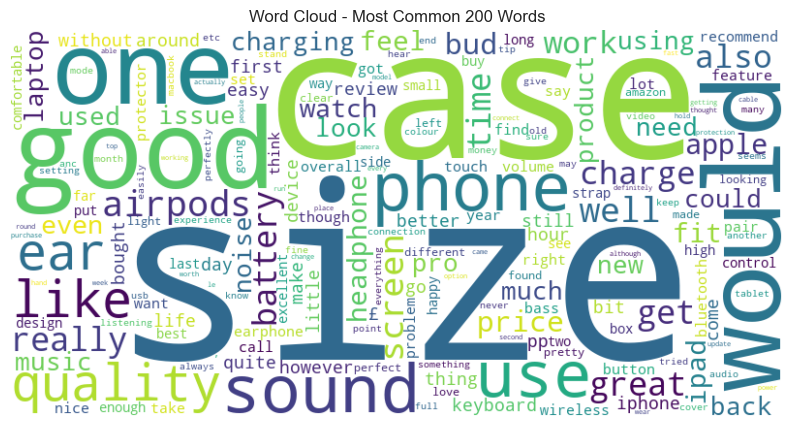

In [125]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words')
plt.show()


***23.1 iPad***

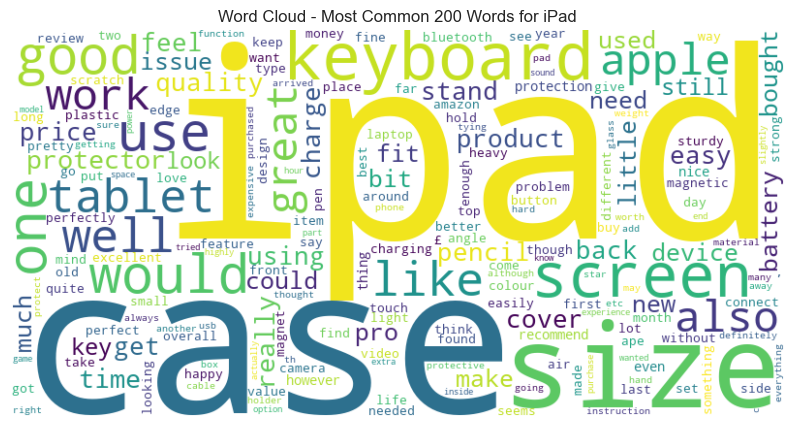

In [126]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad')
plt.show()


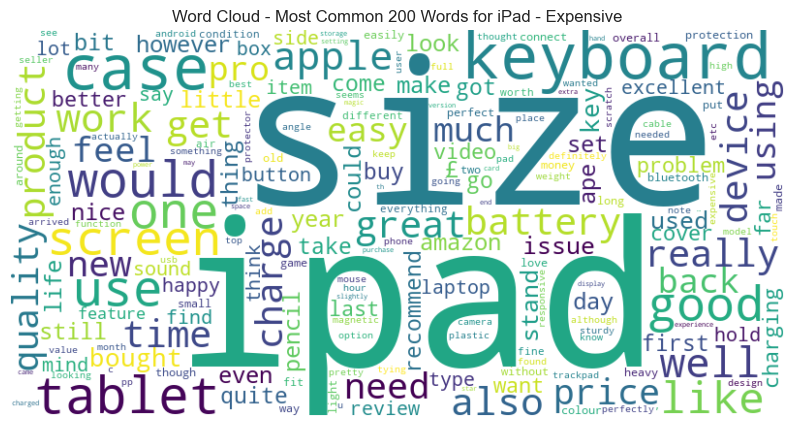

In [128]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad_expensive['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad - Expensive')
plt.show()


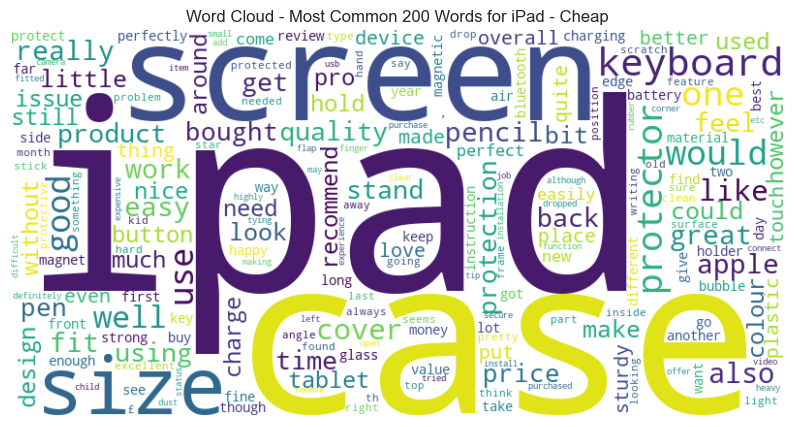

In [129]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad_cheap['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad - Cheap')
plt.show()


***23.2 iPhone***

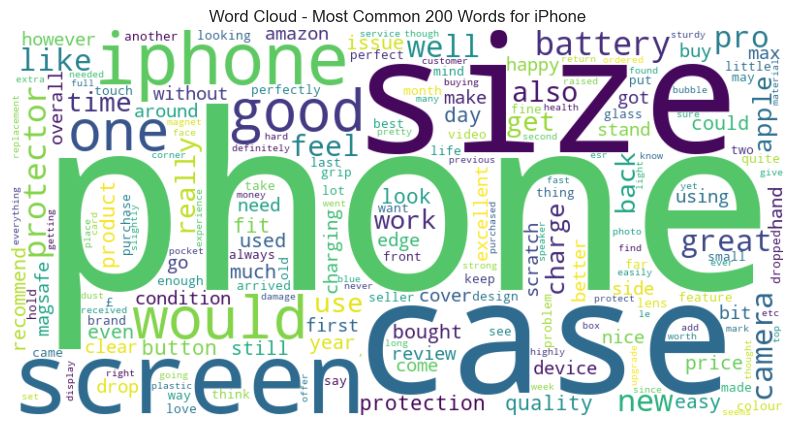

In [130]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone')
plt.show()


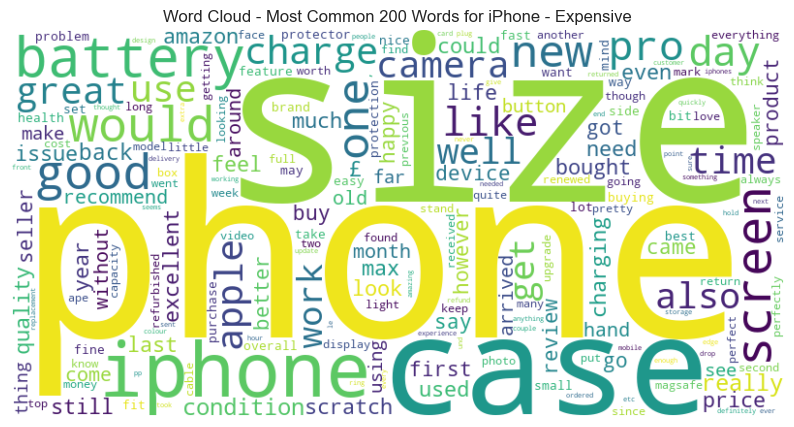

In [132]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone_expensive['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone - Expensive')
plt.show()


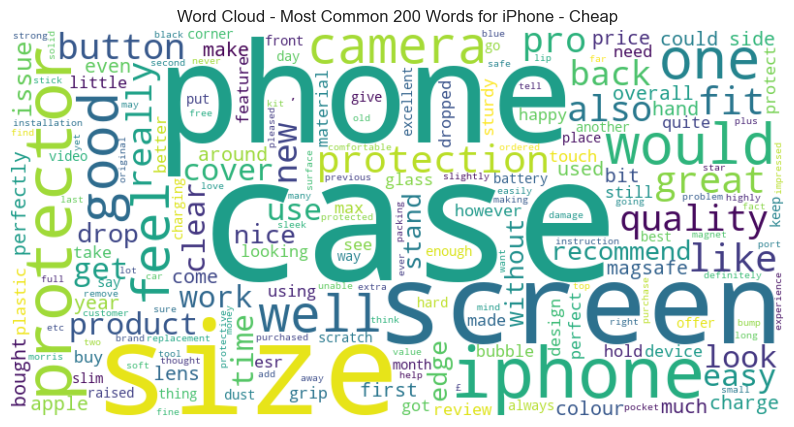

In [133]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone_cheap['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone - Cheap')
plt.show()


***23.3 Macbook***

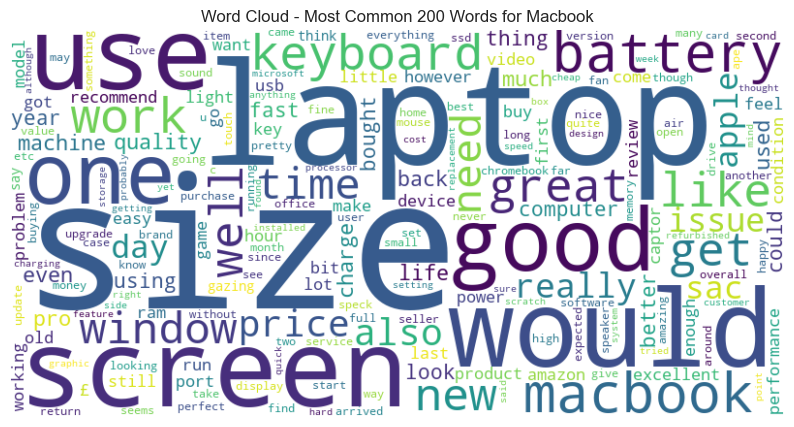

In [134]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook')
plt.show()


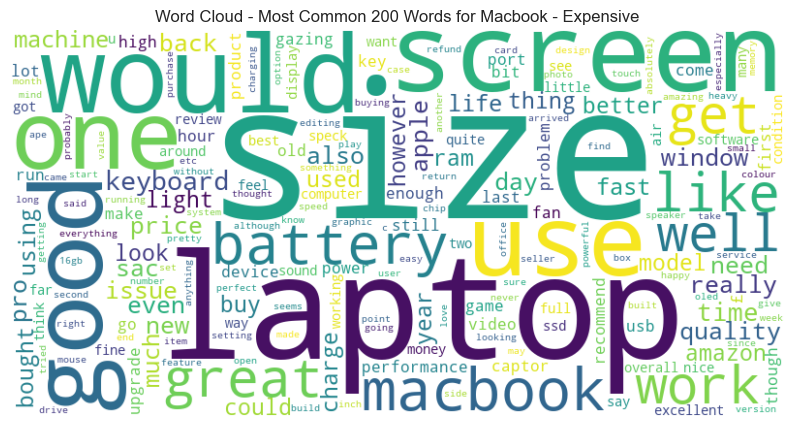

In [135]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac_expensive['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook - Expensive')
plt.show()


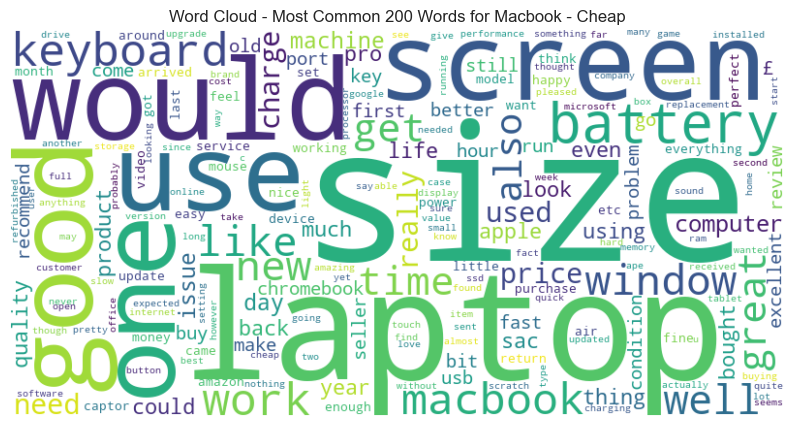

In [136]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac_cheap['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook - Cheap')
plt.show()


***23.4 Apple Watch***

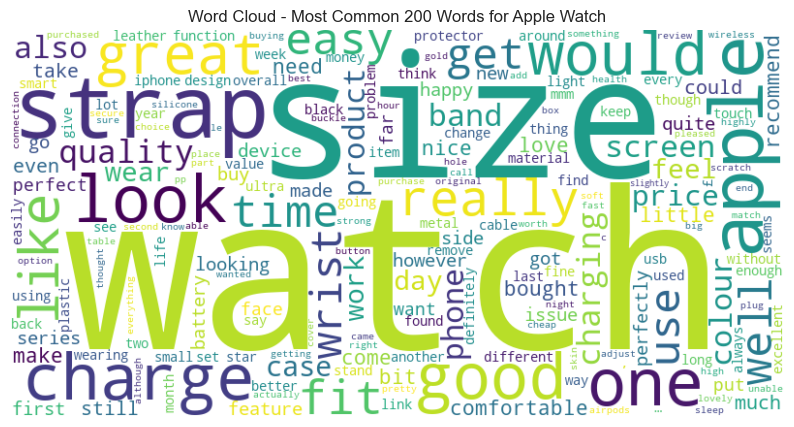

In [137]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch')
plt.show()


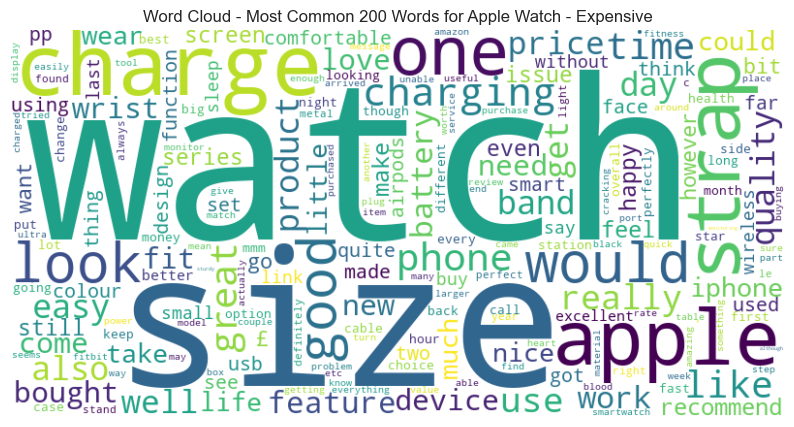

In [138]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch_expensive['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch - Expensive')
plt.show()


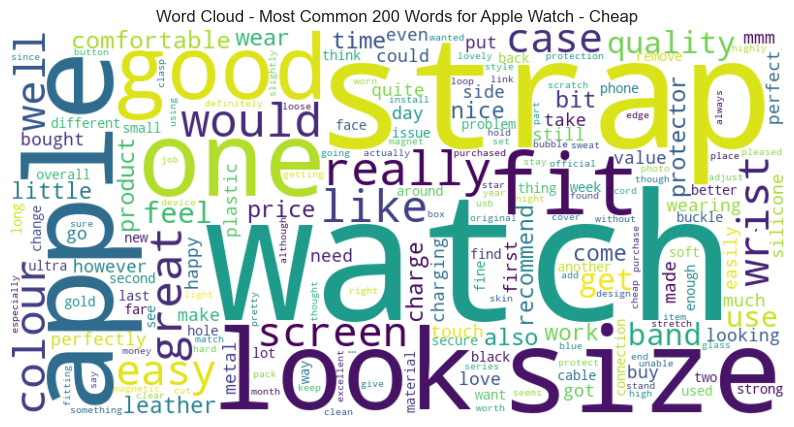

In [139]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch_cheap['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch - Cheap')
plt.show()


***23.5 AirPods***

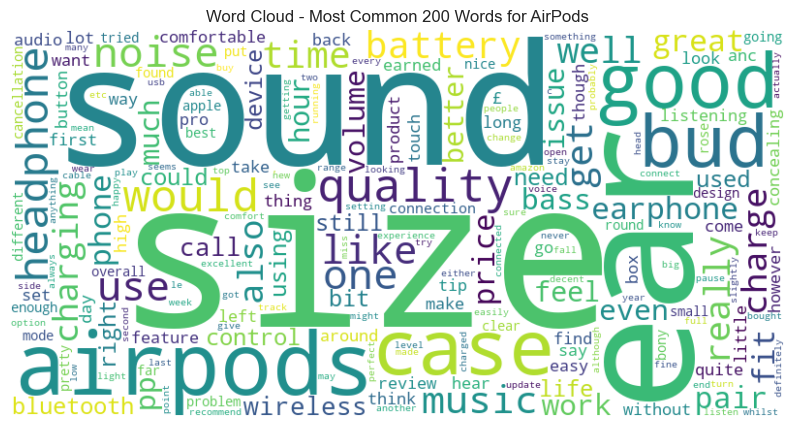

In [140]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods')
plt.show()


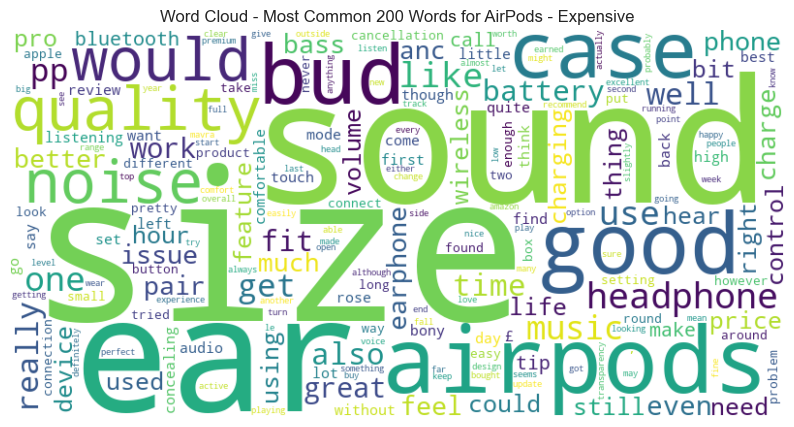

In [141]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods_expensive['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods - Expensive')
plt.show()


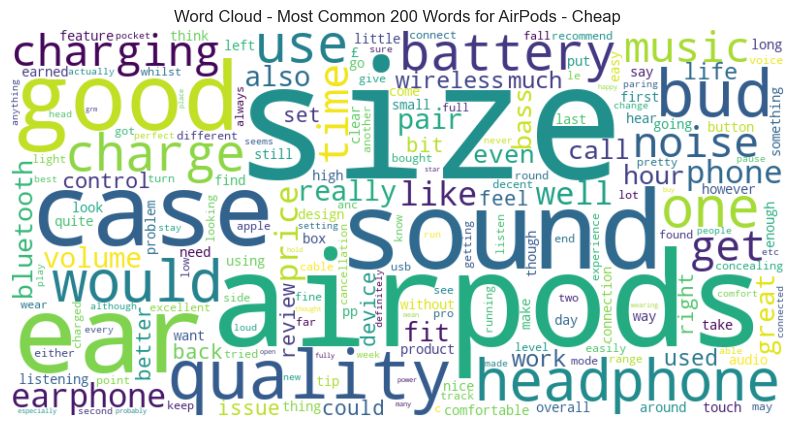

In [142]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods_cheap['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods - Cheap')
plt.show()


**24. Extracting noun phrases with TextBlob**

In [144]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases:
sound quality: 353
£ size: 232
battery life: 202
size hour: 164
screen protector: 155
iphone size: 130
size year: 108
size size: 103
pro max: 94
size month: 78


***24.1 Macbook***

In [145]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook:
battery life: 41
size hour: 38
window size: 37
size year: 36
£ size: 36
macbook air: 28
excellent condition: 22
size size: 18
size macbook: 17
size month: 16


In [146]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac_expensive['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook - Expensive:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook - Expensive:
battery life: 31
£ size: 20
size year: 19
size hour: 19
window size: 13
macbook air: 13
size macbook: 12
new macbook: 11
size size: 10
great laptop: 10


In [147]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac_cheap['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook - Cheap:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook - Cheap:
window size: 24
size hour: 19
£ size: 17
size year: 17
macbook air: 15
excellent condition: 15
size month: 11
battery life: 10
easy set: 9
size size: 8


***24.2 iPhone***

In [148]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone:
iphone size: 114
pro max: 86
screen protector: 72
new phone: 59
phone case: 40
new iphone size: 30
clear case: 28
battery life: 21
old phone: 21
excellent condition: 21


In [149]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone_expensive['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone - Expensive:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone - Expensive:
iphone size: 67
pro max: 42
new phone: 36
battery life: 21
old phone: 20
excellent condition: 20
screen protector: 16
size size: 14
size month: 13
phone case: 12


In [150]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone_cheap['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone - Cheap:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone - Cheap:
screen protector: 56
iphone size: 49
pro max: 43
phone case: 28
new iphone size: 26
clear case: 24
new phone: 23
peace mind: 10
front screen: 10
case phone: 9


***24.3 Apple Watch***

In [151]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch:
series size: 26
£ size: 19
good quality: 15
small wrist: 14
battery life: 13
screen protector: 13
size star: 13
strap apple: 13
fit apple: 10
great product: 8


In [152]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch_expensive['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch - Expensive:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch - Expensive:
series size: 23
£ size: 18
battery life: 10
size hour: 8
size star: 8
small wrist: 7
good quality: 5
easy use: 5
wireless charge: 5
great product: 5


In [153]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch_cheap['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch - Cheap:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch - Cheap:
screen protector: 11
good quality: 11
strap apple: 9
new strap: 7
small wrist: 7
fit apple: 6
fit wrist: 6
size month: 6
lovely strap: 6
different colour: 6


***24.4 iPad***

In [154]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad:
screen protector: 70
size year: 29
new ipad: 29
ipad case: 24
pro size: 21
£ size: 20
apple pencil: 17
fit ipad: 17
easy use: 16
size star: 14


In [155]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad_expensive['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad - Expensive:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad - Expensive:
£ size: 15
pro size: 13
new ipad: 12
size year: 11
battery life: 11
easy use: 10
keyboard case: 9
screen protector: 9
size month: 8
ipad case: 8


In [156]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad_cheap['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad - Cheap:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad - Cheap:
screen protector: 63
size year: 18
new ipad: 17
ipad case: 16
apple pencil: 14
fit ipad: 10
pro size: 8
case keyboard: 8
easy install: 8
size month: 7


***24.5 AirPods***

In [157]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods:
sound quality: 334
£ size: 137
battery life: 114
size hour: 101
noise cancellation: 68
ear bud: 67
fit ear: 67
active noise: 62
size size: 59
touch control: 44


In [158]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods_expensive['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods - Expensive:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods - Expensive:
sound quality: 169
£ size: 71
size hour: 59
battery life: 58
active noise: 43
fit ear: 42
noise cancellation: 40
ear bud: 33
size size: 31
ear canal: 30


In [159]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods_cheap['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods - Cheap:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods - Cheap:
sound quality: 165
£ size: 67
battery life: 56
size hour: 42
ear bud: 34
noise cancellation: 28
size size: 28
fit ear: 25
touch control: 21
active noise: 19


**24. Performing the LDA Topic Modelling**

In [261]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_iphone['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_iphone['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_iphone['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2661475112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.032*"size" + 0.024*"phone" + 0.019*"iphone" + 0.011*"case" + 0.009*"battery" + 0.009*"screen" + 0.007*"device" + 0.006*"camera" + 0.006*"protection" + 0.005*"pro" | Comment Count: 101
Topic 1: 0.040*"size" + 0.021*"phone" + 0.019*"iphone" + 0.016*"pro" + 0.007*"max" + 0.007*"camera" + 0.006*"day" + 0.006*"back" + 0.005*"new" + 0.005*"apple" | Comment Count: 50
Topic 2: 0.041*"phone" + 0.023*"screen" + 0.019*"size" + 0.018*"case" + 0.013*"protector" + 0.012*"would" + 0.010*"one" + 0.009*"new" + 0.008*"good" + 0.007*"like" | Comment Count: 408
Topic 3: 0.033*"size" + 0.023*"phone" + 0.020*"case" + 0.014*"screen" + 0.010*"good" + 0.009*"iphone" + 0.009*"would" + 0.009*"battery" + 0.007*"one" + 0.006*"product" | Comment Count: 228
Topic 4: 0.067*"case" + 0.019*"phone" + 0.014*"iphone" + 0.014*"size" + 0.014*"feel" + 0.010*"magsafe" + 0.009*"button" + 0.009*"pro" + 0.009*"stand" + 0.009*"well" | Comment Count: 213


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2661475112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [161]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_mac['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_mac['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_mac['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2265032275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.035*"size" + 0.012*"laptop" + 0.010*"macbook" + 0.009*"screen" + 0.008*"would" + 0.008*"one" + 0.008*"battery" + 0.007*"use" + 0.007*"good" + 0.006*"new" | Comment Count: 306
Topic 1: 0.035*"size" + 0.027*"laptop" + 0.011*"good" + 0.010*"screen" + 0.009*"would" + 0.007*"battery" + 0.006*"keyboard" + 0.006*"really" + 0.006*"well" + 0.006*"one" | Comment Count: 227
Topic 2: 0.018*"laptop" + 0.010*"would" + 0.010*"size" + 0.009*"new" + 0.009*"one" + 0.008*"use" + 0.007*"macbook" + 0.007*"screen" + 0.007*"work" + 0.007*"time" | Comment Count: 192
Topic 3: 0.028*"size" + 0.010*"laptop" + 0.009*"use" + 0.008*"like" + 0.007*"window" + 0.006*"screen" + 0.006*"one" + 0.006*"keyboard" + 0.006*"get" + 0.006*"need" | Comment Count: 205
Topic 4: 0.016*"laptop" + 0.012*"size" + 0.008*"price" + 0.008*"screen" + 0.007*"would" + 0.007*"good" + 0.007*"work" + 0.006*"great" + 0.006*"battery" + 0.005*"window" | Comment Count: 70


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2265032275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [162]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_ipad['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_ipad['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_ipad['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1621576080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.021*"size" + 0.014*"ipad" + 0.013*"case" + 0.011*"tablet" + 0.010*"keyboard" + 0.010*"would" + 0.009*"use" + 0.009*"apple" + 0.008*"good" + 0.007*"screen" | Comment Count: 329
Topic 1: 0.036*"ipad" + 0.033*"keyboard" + 0.029*"case" + 0.011*"size" + 0.010*"well" + 0.009*"use" + 0.009*"good" + 0.008*"one" + 0.007*"stand" + 0.007*"key" | Comment Count: 285
Topic 2: 0.016*"size" + 0.014*"ipad" + 0.013*"screen" + 0.012*"one" + 0.012*"case" + 0.011*"tablet" + 0.007*"use" + 0.006*"stand" + 0.005*"like" + 0.005*"good" | Comment Count: 101
Topic 3: 0.025*"ipad" + 0.012*"size" + 0.011*"case" + 0.010*"good" + 0.009*"would" + 0.008*"cover" + 0.007*"one" + 0.007*"use" + 0.006*"like" + 0.005*"quality" | Comment Count: 83
Topic 4: 0.024*"screen" + 0.024*"ipad" + 0.018*"protector" + 0.017*"case" + 0.017*"size" + 0.009*"one" + 0.008*"like" + 0.007*"would" + 0.006*"also" + 0.006*"good" | Comment Count: 202


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1621576080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [163]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_watch['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_watch['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_watch['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1214900019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.022*"size" + 0.016*"charge" + 0.015*"watch" + 0.014*"charging" + 0.011*"good" + 0.011*"look" + 0.011*"quality" + 0.009*"product" + 0.009*"strap" + 0.008*"great" | Comment Count: 132
Topic 1: 0.015*"charge" + 0.014*"look" + 0.014*"watch" + 0.012*"strap" + 0.012*"size" + 0.011*"really" + 0.008*"like" + 0.008*"colour" + 0.007*"great" + 0.007*"little" | Comment Count: 80
Topic 2: 0.038*"strap" + 0.034*"watch" + 0.016*"size" + 0.016*"apple" + 0.015*"one" + 0.011*"fit" + 0.010*"would" + 0.010*"good" + 0.010*"look" + 0.009*"colour" | Comment Count: 400
Topic 3: 0.045*"watch" + 0.026*"size" + 0.014*"apple" + 0.008*"one" + 0.008*"time" + 0.008*"good" + 0.008*"would" + 0.008*"look" + 0.007*"like" + 0.007*"screen" | Comment Count: 248
Topic 4: 0.035*"watch" + 0.024*"charge" + 0.017*"great" + 0.012*"apple" + 0.012*"charging" + 0.009*"easy" + 0.009*"size" + 0.008*"look" + 0.008*"cable" + 0.008*"strap" | Comment Count: 140


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1214900019.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [164]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_airpods['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_airpods['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_airpods['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3152854227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.016*"size" + 0.012*"sound" + 0.008*"ear" + 0.008*"would" + 0.008*"good" + 0.007*"one" + 0.006*"bud" + 0.005*"like" + 0.005*"quality" + 0.005*"anc" | Comment Count: 45
Topic 1: 0.022*"size" + 0.014*"ear" + 0.013*"sound" + 0.011*"airpods" + 0.010*"good" + 0.010*"case" + 0.009*"bud" + 0.008*"would" + 0.007*"quality" + 0.007*"headphone" | Comment Count: 778
Topic 2: 0.022*"size" + 0.014*"sound" + 0.011*"quality" + 0.011*"airpods" + 0.010*"case" + 0.009*"headphone" + 0.009*"earphone" + 0.008*"ear" + 0.008*"battery" + 0.007*"charge" | Comment Count: 149
Topic 3: 0.009*"bony" + 0.005*"rose" + 0.004*"pro" + 0.004*"le" + 0.004*"fixed" + 0.004*"feel" + 0.004*"good" + 0.003*"sound" + 0.003*"quality" + 0.003*"bass" | Comment Count: 4
Topic 4: 0.041*"airpods" + 0.011*"wireless" + 0.010*"size" + 0.009*"music" + 0.008*"quality" + 0.008*"sound" + 0.007*"case" + 0.007*"noise" + 0.006*"ear" + 0.006*"good" | Comment Count: 24


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3152854227.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


**25. Conduct a sentiment analysis with VADER model**

**25.1 iPhone**

In [165]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_VADER'] = df_iphone['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_iphone[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3845702056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3845702056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

Sentiment_Comment  SentimentScore_VADER  \
4000  This will be a long and detailed review . I am...                0.9996   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...               -0.9991   
4002  I have been waiting for Umidigi to release an ...                0.9991   
4003  I have been a long - time user of Android and ...                0.9983   
4004  Before we start , apologies for the long revie...                0.9993   
...                                                 ...                   ...   
4995  Just bought this MagSafe horrid case with stan...                0.9528   
4996  Brilliant product and quite sturdy and a barga...                0.8207   
4997  The description says “ Like New ” . The appear...                0.4199   
4998  I bought this iPhone [ SIZE ] as a uncondition...                0.8536   
4999  Most things about this purchase were great , t...                0.5106   

     SentimentCategory_VADER  
4000                Positive  
4001                Negative  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Positive  
4996                Positive  
4997                Positive  
4998                Positive  
4999                Positive  

[1000 rows x 3 columns]

In [166]:
df_iphone.SentimentScore_VADER.describe()

count    1000.000000
mean        0.684409
std         0.517666
min        -0.999100
25%         0.715550
50%         0.928700
75%         0.973625
max         0.999600
Name: SentimentScore_VADER, dtype: float64

In [167]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 This will be a long and detailed review. I am writing this to guide those who are hesitant whether to get an iPhone or not, and which iPhone to get. I will start by focusing on the iPhone 13 Pro model, but I will speak more generally towards the end, especially when comparing iOS versus Android Products.iPhone 13 Pro Overview:I had the chance to unbox this device and set it up as my new main device. Prior to this I was using a Samsung Note and a Realme smartphones.- Box Contents and Eco-Friendliness:The iPhone 13 Pro box contains paper leaflets, sticker, a cable, and of course phone. The phone itself is wrapped in recyclable material rather than eco-unfriendly plastic. Part of the switch to Apple is what I personally see as an effort from them to go green, in addition to other reasons I will discuss below.- Design and Build Quality:The iPhone 13 Pro is simply amazing in terms of design. Holding it feels almost like holding the previous 12 Pro model, albeit the 13 Pro comes with notic

In [168]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Nachdem ich ein iPhone 12 Pro Max von Herbst 2020 in Verwendung habe, bei dem mir die Speicherkapazität langsam nicht mehr ausreicht und ich die Video-Verbesserungen seit dem iPhone 13 Pro interessant finde, ist jetzt die Zeit für ein neues iPhone.Das iPhone 14 Pro Max ist wieder sehr hochwertig verarbeitet und weiter im bewerten Design seit dem iPhone 12, dass schon an Generationen 4 bis iPhone 5S erinnert.Für mich wichtigste Neuerungen: -Haupt-Kamera deutlich verbessert mit bis zu 48 Megapixel! Allerdings im Alltag nur weiterhin 12 Megapixel und somit wohl kaum Größenunterschied der Dateien. Gut, denn wer mehr Pixel voll ausnutzen will, kann auf RAW umstellen (viel Bearbeitungs-Potential, aber riesige Dateien), bei normalen Fotos hingegen wird einfach die Qualität verbessert.  Die Brennweite entspricht jetzt einem 24mm, also etwas mehr Weitwinkel (13 Pro: 26mm).-Ultraweitwinkel-Kamera verbessert, soll auch bei Macro-Aufnahmen besser sein-2fach Zoom wieder da: Wie beim iPhone XS kan

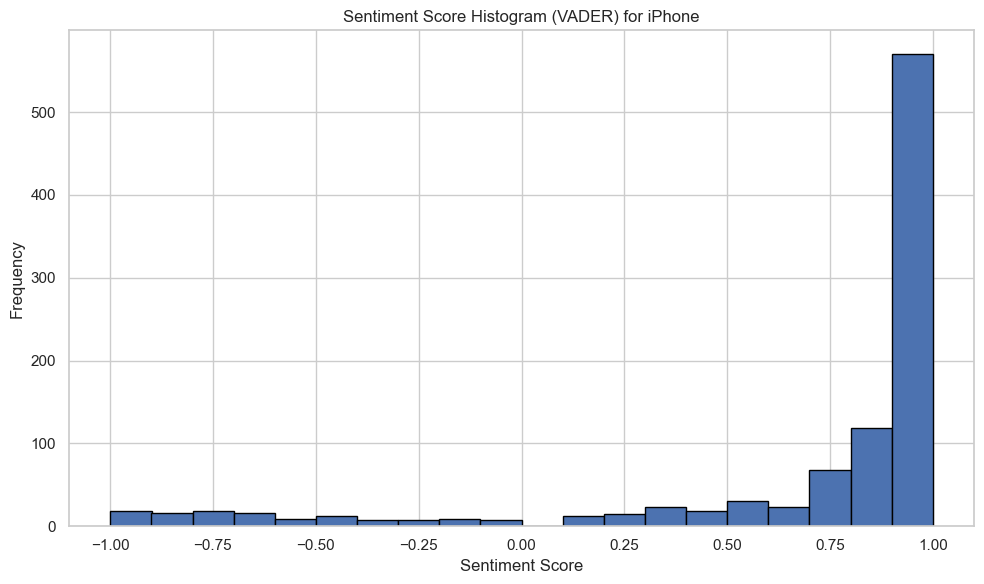

In [169]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_iphone['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.2 Macbook**

In [170]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_VADER'] = df_mac['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_mac[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2233685362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2233685362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac[

Sentiment_Comment  SentimentScore_VADER  \
2000  I am in my last smelter ( hopefully ) of my un...                0.9993   
2001  To start , this Chromebook is the best one I h...                0.9992   
2002  Alright folks , I just bought my first chromeb...                0.9995   
2003  I shall break this review into [ SIZE ] catego...                0.9795   
2004  Have you been putting off upbraiding that Reti...                0.9995   
...                                                 ...                   ...   
2995  really nice laptop , runs windows [ SIZE ] and...                0.8706   
2996  I thought a refurbished MacBook will not be as...                0.6572   
2997  Just got it today ! Last delivery ! Used it fo...                0.8443   
2998  Bought this MacBook pro for my son and he is o...                0.9022   
2999  Fantastic item my daughter is over the moon wi...                0.8934   

     SentimentCategory_VADER  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Positive  
2996                Positive  
2997                Positive  
2998                Positive  
2999                Positive  

[1000 rows x 3 columns]

In [171]:
df_mac.SentimentScore_VADER.describe()

count    1000.000000
mean        0.614077
std         0.577539
min        -0.974600
25%         0.551850
50%         0.904450
75%         0.973875
max         0.999500
Name: SentimentScore_VADER, dtype: float64

In [172]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Alright folks, I just bought my first chromebook after hours and hours of searching for the one with the best specs for the cheapest price. And here we are!I am not really much of a laptop guy, I have a ridiculously expensive pc, with a filco cherry brown mx keyboard, and gaming mice, etc. So why did I decide to buy a chromebook? Well, I am a student, and I didn't want to go home after class every single day just to do hw or wait for class (and god knows, I won't study once im in that gaming environment i created). So I looked to find a way to help me stay focused - at school. And bam, a fast pc that cant play games but can work very well on the browser. And furthermore, google made it! Expecting quality out of em.And quality I received. Everything I love about this except for a few minor thingsGoogle Slides is trashcan for viewing microsoft PPTs. It is always in some shape or form corrupted. Not even worth my time. So I recommend having a power house computer at home. What I did was

In [173]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 The charger that arrived with the 2in1 mini device does not fit, I still have not been able to power it on. Really disappointed. Do not recommend, considering closing my account not just because of this hassle but, a couple of other orders I have placed have not arrived at all. Does anyone have any ideas how I can use this 2in1 device? Wrong size charger arrived which is useless. No value for money. Unable to comment on the screen as its not been switched on, due to wrong USB being the wrong one. What a waste of money.
-----------------------------------------------------------------------------------------------
1 Bought this Mac Air 2 years ago.Went to use it this week and the battery is dead.Have only charged it about 6 times since owned it.NOT GOOD ENOUGH apple of course the warranty has run out!!for the amount of money i expect a battery in a MAC to last at least 5 years!This is a disgrace.I have been shocked at the substandard checks carried out again.This is not the first time

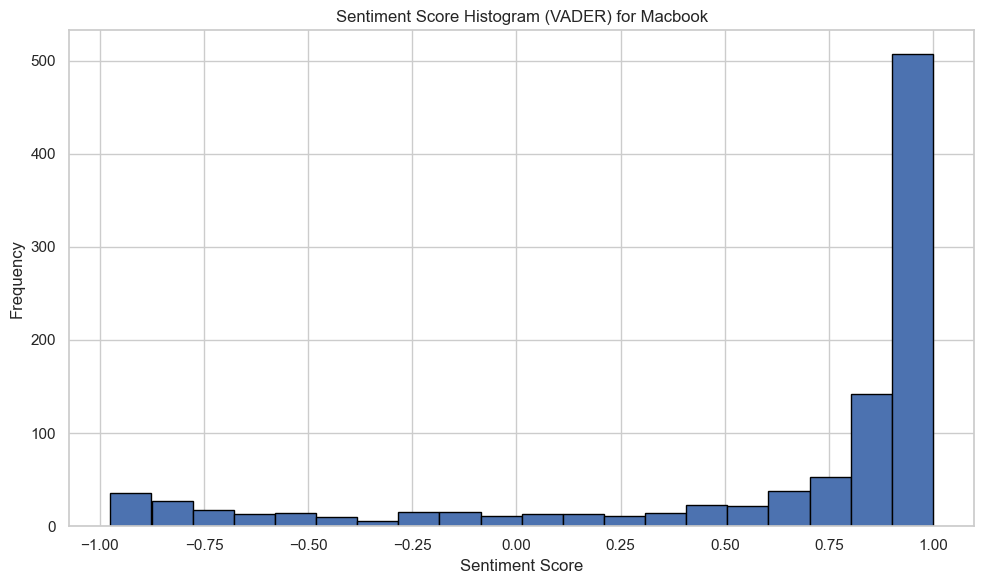

In [174]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_mac['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.3 iPad**

In [175]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_VADER'] = df_ipad['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_ipad[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/571326633.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/571326633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad

Sentiment_Comment  SentimentScore_VADER  \
3000  I bought this tablet when I retired and had mo...                0.9993   
3001  I have been using this for a few weeks now and...                0.9925   
3002  Introduction : The Rvntop 20W USB C Last Large...               -0.6743   
3003  Over a year ago , I used the iPad th gen to co...                0.9985   
3004  My journey with the ProCase [ SIZE ] Back Scre...               -0.9934   
...                                                 ...                   ...   
3995  Two weeks usage and so far very impressed with...                0.9306   
3996  Bought blue version for iPhone [ SIZE ] suppli...                0.4767   
3997  This is a very good quality product as my son ...                0.9544   
3998  Absolutely phenomena alternative to an apple p...                0.2732   
3999  The protector is nice and clear so does not da...               -0.8508   

     SentimentCategory_VADER  
3000                Positive  
3001                Positive  
3002                Negative  
3003                Positive  
3004                Negative  
...                      ...  
3995                Positive  
3996                Positive  
3997                Positive  
3998                Positive  
3999                Negative  

[1000 rows x 3 columns]

In [176]:
df_ipad.SentimentScore_VADER.describe()

count    1000.000000
mean        0.683020
std         0.490906
min        -0.993400
25%         0.664150
50%         0.913000
75%         0.968600
max         0.999300
Name: SentimentScore_VADER, dtype: float64

In [177]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 I bought this tablet when I retired and had more time to sit around reading emails, keeping up with social media, and streaming box sets of TV series I never had time to watch. It does all of these admirably, and serves me well.The 10" screen is crisp and clear and has a good viewing angle should you wish to share it with others, for example during a video call. I don't know much about processor types and speeds, but there is enough oomph to power all the apps I use without the screen flickering or pixelating.The onboard storage is pretty reasonable at 64Gb, but if you like to download lots of movies etc you can add a memory card, giving up to 512Gb extra. Some well-known tablets don't offer this facility, and instead sell a range of models with different storage sizes. I find it hard to know my requirements inadvance, so the ability to upgrade as needed is extremely useful and reassuring.Next to the slot for the memory card are two SIM card slots, enabling you to connect to the Inte

In [178]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 My journey with the ProCase 2 Pack Screen Protector for iPad 10.2 Inch 9th / 8th / 7th Generation has been filled with disappointment and frustration. As an iPad user seeking reliable screen protection, I had high hopes for this product. However, it has fallen far short of my expectations, leaving me with a lingering sense of regret and dissatisfaction.Incompatible and Misleading Design:Upon receiving the screen protector, I was excited to apply it to my iPad 10.2” 2021 2020 2019, 9th / 8th / 7th Generation (Model: A2602, A2603, A2604, A2605, A2270, A2428, A2429, A2430, A2197, A2198, A2200). Unfortunately, my excitement quickly turned to frustration when I discovered that the screen protector was not a perfect fit for my iPad. Despite diligently checking the model number “Axxxx” as instructed, the screen protector left parts of my iPad’s screen exposed and vulnerable. This lack of compatibility made me question the accuracy of the product’s description and left me feeling misled.Infe

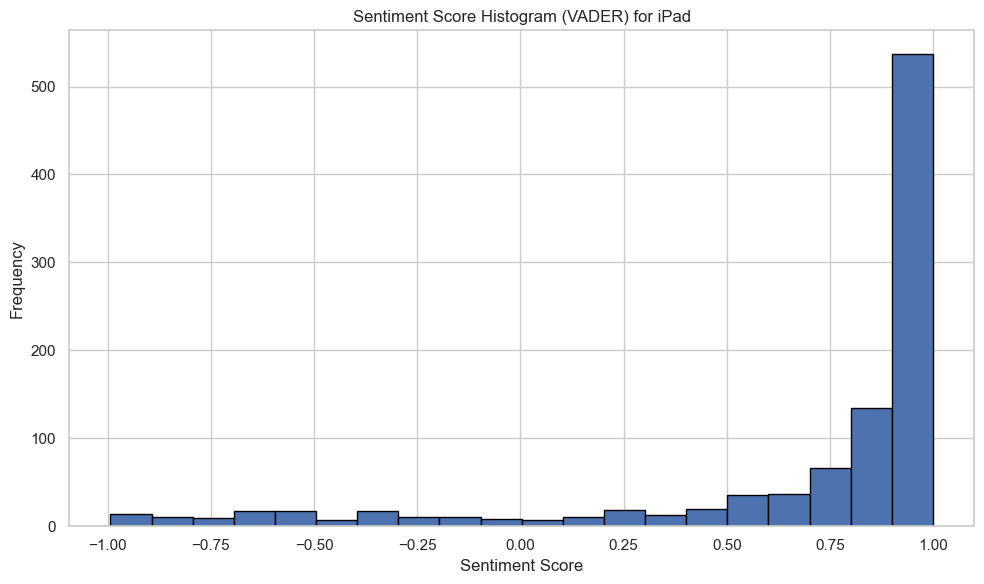

In [179]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_ipad['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.4 AirPods**

In [180]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_VADER'] = df_airpods['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_airpods[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1128605631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1128605631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Sentiment_Comment  SentimentScore_VADER  \
0    The Philip T8505 Active Noise Panelling True W...                1.0000   
1    of ; of - a stunning set of wireless headphone...                0.9994   
2    I bought these in May [ SIZE ] and a few other...                0.9996   
3    FURTHER UPDATE , FEB 2021I have experienced pa...                0.9995   
4    Firstly , let me apologise for the long read b...                0.9998   
..                                                 ...                   ...   
995  The Galaxy Buds are great ! The black colour l...                0.9957   
996  Am not into buying expensive earphones as it i...                0.9931   
997  Good sounding and very comfortable wireless he...                0.9895   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...               -0.8852   
999  Delivery & Packaging - the airpods were delive...                0.9592   

    SentimentCategory_VADER  
0                  Positive  
1                  Positive  
2                  Positive  
3                  Positive  
4                  Positive  
..                      ...  
995                Positive  
996                Positive  
997                Positive  
998                Negative  
999                Positive  

[1000 rows x 3 columns]

In [181]:
df_airpods.SentimentScore_VADER.describe()

count    1000.000000
mean        0.884375
std         0.382373
min        -0.998400
25%         0.973175
50%         0.992550
75%         0.996700
max         1.000000
Name: SentimentScore_VADER, dtype: float64

In [182]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 The Philips T8505 Active Noise Cancelling True Wireless airpods provides a very pleasant Great Audio Sound experience with loads of Clean Smooth Bass, the airpods are very lightweight, comfortable to wear without them falling out, and the airpods are very well Design Craft built.airpods are built with premium audio drivers with Bluetooth 5.0 signal delivery, and wireless airpods generate incredible HD sound quality with some rich well balanced Bass.Philips airpods are just like the Jabra 85t airpods with the Philips airpods having an Oval Shape Nozzle & a semi-open design with pressure relief vents, preventing pressure build-up inside the ear, and create a secure, noise-cancelling seal, and boosting the sound quality.Overall the Philips T8505 Active Noise Cancelling True Wireless airpods are pretty nice, and functional.The functionality with everything on Wireless airpods works pretty Good overall, there is NO problems with anything.The Philips T8505 Active Noise Cancelling True Wire

In [183]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Hello everyone,This review is for the:'Sennheiser MOMENTUM True Wireless 2'I'm saying this just in case because Amazon likes to mix up reviews, and you never know what review you are actually looking at, and what product they are talking about. Plus most of them are Bots that Amazon uses to fill up the review section with fake 5 star reviews.Now let's talk about the earplugs.About the product, I see a lot of people saying that they are bad, that they are not premium, they are not good for calls, the microphone is garbage, and so on and so on.I'm going to try and break down what people have said in the reviews so I can make your life easier so you can decide if you are going to buy these airpods or not.- Quality of airpods:It's plastic... plastic is as good as plastic can be, I like how some people say metal or some other material is more premium, people this thing goes in your ear, you do NOT want something that weighs too much in your ear, trust me.- Comfort:Here is what I notice, I

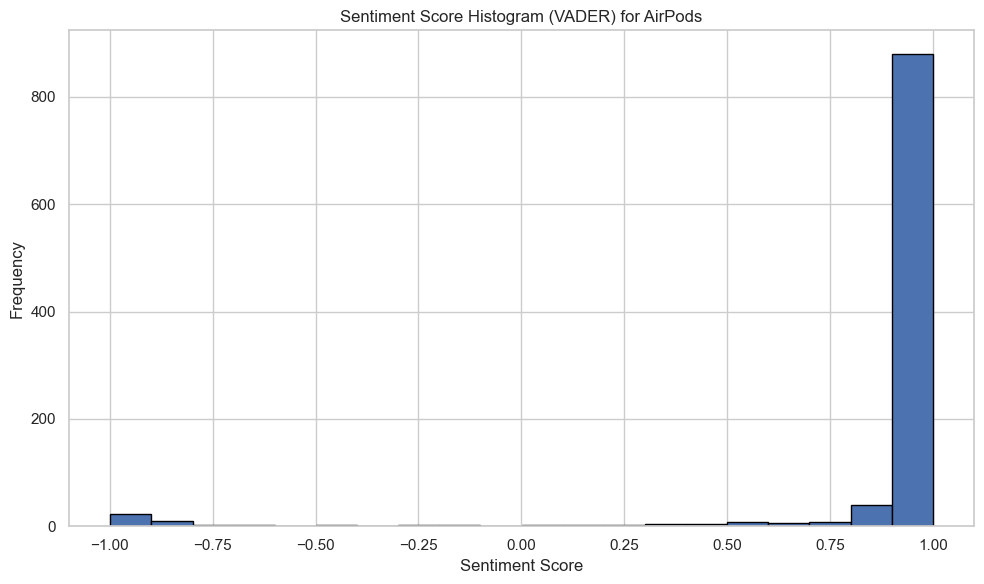

In [184]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_airpods['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.5 Apple Watch**

In [185]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_VADER'] = df_watch['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_watch[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1356089718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1356089718.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

Sentiment_Comment  SentimentScore_VADER  \
1000  How often do you upgrade your smart devices ? ...                0.9995   
1001  The Apple Watch Series [ SIZE ] is the latest ...                0.9971   
1002  I wish I had read these reviews before I purch...               -0.3640   
1003  I have to say this watch is good , and reasona...                0.9954   
1004  This charging station is one of my favorite re...                0.9964   
...                                                 ...                   ...   
1995  K for the price . The one i received has a mar...                0.0000   
1996  Very comfortable replacement for an old tired ...                0.8122   
1997  These straps are great they look and feel just...                0.8625   
1998  Very good value for moneyColour true to advert...                0.8308   
1999  Love this product - colour combinations with m...                0.9305   

     SentimentCategory_VADER  
1000                Positive  
1001                Positive  
1002                Negative  
1003                Positive  
1004                Positive  
...                      ...  
1995                 Neutral  
1996                Positive  
1997                Positive  
1998                Positive  
1999                Positive  

[1000 rows x 3 columns]

In [186]:
df_watch.SentimentScore_VADER.describe()

count    1000.000000
mean        0.596870
std         0.494347
min        -0.957800
25%         0.426675
50%         0.839450
75%         0.940225
max         0.999500
Name: SentimentScore_VADER, dtype: float64

In [187]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 How often do you upgrade your smart devices? I upgrade my iPhone every 2-3 generations, the same goes for my iPad Pro. But what about the Apple Watch? I don’t believe the majority of people upgrade every year, or even two or three years. The incremental improvements to each generation of Apple Watch appears so minor that you’d struggle to see the difference if two successive devices were compared against each other.Which is why I’ve waited so long to upgrade from my pensionable Series 3. I’ve had it since shortly after its release at the end of 2017. 6 years is a long time for a gadget, especially one that is attached to my body every single day. But I’ve struggled to see the reason for upgrading, despite my Series 3 become less and less reliable over the passing years. The screen was sometimes washing out and made it difficult to read, especially outdoors. The finger gestures to swipe up and down rarely worked, and the crown dial was almost fused to the watch it was that difficult t

In [188]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

0 Ok so good and bad points to this watch strap. Looks good and is very comfortable. I can be a bit of a sensitive bunny and have a reaction to a lot of materials but so far no reaction to this. However, I’ve found it has tarnished very quickly and I cannot get it clean. Not sure if it is actually tarnished or if the coating has rubbed off. Also being magnetic I find I’m sticking to everything! Picnic tables, my kitchen knife block, the kitchen knives…not a huge issue but more annoying than anything else. Especially when you lean across your kitchen counter and end up with a bread knife attached to your wrist! Dispute this, I would buy again.
-----------------------------------------------------------------------------------------------
1 Good watch. How to put it on takes a minute but easy once you get used to it. Like all apple products battery life is terrible.They say battery life is 18 hours which is completely unacceptable in a smart watch fitness tracker. It is a shame because t

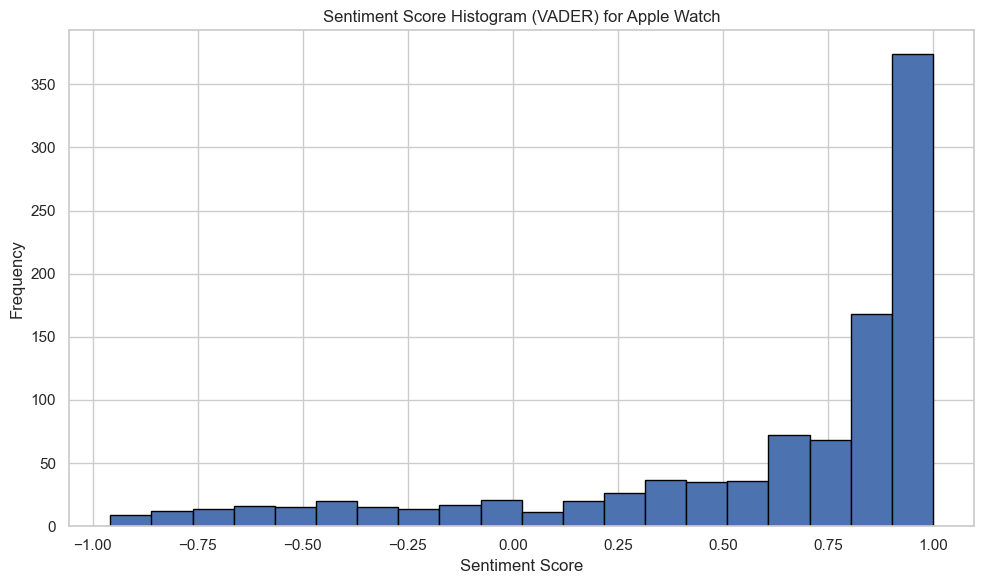

In [189]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_watch['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**26. Conduct a sentiment analysis with NaiveBayesAnalyzer**

***26.1. iPhone***

In [190]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

def get_sentiment_textblob(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    if sentiment.p_pos >= 0.6:
        return "Positive"
    elif sentiment.p_neg >= 0.6:
        return "Negative"
    return "Neutral"

df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)

df_iphone[['Sentiment_Comment', 'SentimentCategory_Bayes']]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2934576485.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
4000  This will be a long and detailed review . I am...   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...   
4002  I have been waiting for Umidigi to release an ...   
4003  I have been a long - time user of Android and ...   
4004  Before we start , apologies for the long revie...   
...                                                 ...   
4995  Just bought this MagSafe horrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “ Like New ” . The appear...   
4998  I bought this iPhone [ SIZE ] as a uncondition...   
4999  Most things about this purchase were great , t...   

     SentimentCategory_Bayes  
4000                Positive  
4001                Positive  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Positive  
4996                Positive  
4997                 Neutral  
4998                Negative  
4999                Positive  

[1000 rows x 2 columns]

In [191]:
df_iphone[df_iphone.SentimentCategory_Bayes != df_iphone.SentimentCategory_VADER]

Search  Product Price  \
4001  iPhone           1689   
4008  iPhone           1038   
4017  iPhone             29   
4018  iPhone            242   
4019  iPhone           1038   
...      ...            ...   
4989  iPhone              6   
4991  iPhone            209   
4992  iPhone             16   
4997  iPhone            380   
4998  iPhone            247   

                                                Comment  \
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4008  Maybe this will get something done!I am a very...   
4017  Having bought this battery case close to 2022 ...   
4018  Let's make it clear I really really wanted to ...   
4019  I don't write reviews in general but this time...   
...                                                 ...   
4989  Bought to replace an old Samsung charger that ...   
4991  Refurb phone. Couldn’t get it to charge either...   
4992  This case looks very simple, but it's pretty d...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   

                                        Cleaned_Comment  \
4001  nachdem ich ein iphone size pro max von merest...   
4008  maybe get something done unhappy customer nove...   
4017  bought battery case close size nye come conclu...   
4018  let u make clear really really wanted love new...   
4019  write review general time experience bad revie...   
...                                                 ...   
4989  bought replace old samsung charge needed c typ...   
4991  refurb phone would get charge either charge su...   
4992  case look simple pretty decent protecting phon...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   

                                      Sentiment_Comment  Length Price_Segment  \
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive   
4008  Maybe this will get something done ! I am a ve...    3649     Expensive   
4017  Having bought this battery case close to [ SIZ...    2973     Expensive   
4018  Let us make it clear I really really wanted to...    2899     Expensive   
4019  I do not write reviews in general but this tim...    2775     Expensive   
...                                                 ...     ...           ...   
4989  Bought to replace an old Samsung charge that n...     282         Cheap   
4991  Refurb phone . Would not get it to charge eith...     281     Expensive   
4992  This case looks very simple , but it is pretty...     281         Cheap   
4997  The description says “ Like New ” . The appear...     280     Expensive   
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive   

                                      Tokenized_Comment  Topic  \
4001  [nachdem, ich, ein, iphone, size, pro, max, vo...      2   
4008  [maybe, get, something, done, unhappy, custome...      0   
4017  [bought, battery, case, close, size, nye, come...      4   
4018  [let, u, make, clear, really, really, wanted, ...      4   
4019  [write, review, general, time, experience, bad...      4   
...                                                 ...    ...   
4989  [bought, replace, old, samsung, charge, needed...      0   
4991  [refurb, phone, would, get, charge, either, ch...      4   
4992  [case, look, simple, pretty, decent, protectin...      3   
4997  [description, say, like, new, ”, appearance, l...      4   
4998  [bought, iphone, size, unconditioned, excellen...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
4001               -0.9991                Negative                Positive  
4008               -0.9205                Negative                Positive  
4017               -0.2573                Negative                Positive  
4018               -0.4504                Negative                Positive  
4019               -0.9540                Negative              

***26.2. Macbook***

In [192]:
df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)

df_mac[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3820655831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
2000  I am in my last smelter ( hopefully ) of my un...   
2001  To start , this Chromebook is the best one I h...   
2002  Alright folks , I just bought my first chromeb...   
2003  I shall break this review into [ SIZE ] catego...   
2004  Have you been putting off upbraiding that Reti...   
...                                                 ...   
2995  really nice laptop , runs windows [ SIZE ] and...   
2996  I thought a refurbished MacBook will not be as...   
2997  Just got it today ! Last delivery ! Used it fo...   
2998  Bought this MacBook pro for my son and he is o...   
2999  Fantastic item my daughter is over the moon wi...   

     SentimentCategory_Bayes  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Positive  
2996                Positive  
2997                Positive  
2998                Positive  
2999                Positive  

[1000 rows x 2 columns]

In [193]:
df_mac[df_mac.SentimentCategory_Bayes != df_mac.SentimentCategory_VADER]

Search  Product Price  \
2008  Macbook            189   
2046  Macbook            819   
2058  Macbook            995   
2064  Macbook            699   
2073  Macbook            799   
...       ...            ...   
2976  Macbook           1049   
2978  Macbook             79   
2984  Macbook            259   
2985  Macbook            139   
2992  Macbook            519   

                                                Comment  \
2008  I can't complain with the price but even at su...   
2046  On paper, the machine specs (mine were the i5-...   
2058  This is my fourth generation of MacBook Pro an...   
2064  So I I’ve just upgraded from my MSI Stealth wh...   
2073  Got this mac to learn mac os and see what it's...   
...                                                 ...   
2976  Great laptop in every other aspect apart from ...   
2978  This lovely computer arrived, and was set up-t...   
2984  Amazing laptop fast and looks great. The only ...   
2985  im 61 and thought a Chromebook would be hard t...   
2992  DO NOT BUY THIS MACHINE, IT IS MISLEADING FROM...   

                                        Cleaned_Comment  \
2008  complain price even low cost expect tablet con...   
2046  paper machine speck mine 1240p 16gb ram 512gb ...   
2058  fourth generation macbook pro every bit good c...   
2064  upgrade msi stealth size year love hate relati...   
2073  mac learn mac o see like window user coming cu...   
...                                                 ...   
2976  great laptop every aspect apart battery life a...   
2978  lovely computer arrived set one toller knocked...   
2984  amazing laptop fast look great thing aerial nu...   
2985  size thought chromebook would hard use since t...   
2992  buy machine misleading advertising tool includ...   

                                      Sentiment_Comment  Length Price_Segment  \
2008  I cannot complain with the price but even at s...    4842         Cheap   
2046  In paper , the machine speck ( mine were the i...    2622     Expensive   
2058  This is my fourth generation of MacBook Pro an...    2362     Expensive   
2064  So I I have just upgrade from my MSI Stealth w...    2249     Expensive   
2073  Not this mac to learn mac os and see what it i...    2088     Expensive   
...                                                 ...     ...           ...   
2976  Great laptop in every other aspect apart from ...     209     Expensive   
2978  This lovely computer arrived , and was set up ...     208         Cheap   
2984  Amazing laptop fast and looks great . The only...     206         Cheap   
2985  i am [ SIZE ] and thought a Chromebook would b...     205         Cheap   
2992  DO NOT BUY THIS MACHINE , of of MISLEADING FRO...     204     Expensive   

                                      Tokenized_Comment  Topic  \
2008  [complain, price, even, low, cost, expect, tab...      4   
2046  [paper, machine, speck, mine, 1240p, 16gb, ram...      1   
2058  [fourth, generation, macbook, pro, every, bit,...      3   
2064  [upgrade, msi, stealth, size, year, love, hate...      1   
2073  [mac, learn, mac, o, see, like, window, user, ...      0   
...                                                 ...    ...   
2976  [great, laptop, every, aspect, apart, battery,...      0   
2978  [lovely, computer, arrived, set, one, toller, ...      2   
2984  [amazing, laptop, fast, look, great, thing, ae...      3   
2985  [size, thought, chromebook, would, hard, use, ...      3   
2992  [buy, machine, misleading, advertising, tool, ...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
2008               -0.9661                Negative                Positive  
2046                0.9886                Positive                Negative  
2058               -0.2450                Negative                Positive  
2064                0.9605                Positive                Negative  
2073                0.1804                Positive   

***26.3. iPad***

In [194]:
df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)

df_ipad[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/691724193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
3000  I bought this tablet when I retired and had mo...   
3001  I have been using this for a few weeks now and...   
3002  Introduction : The Rvntop 20W USB C Last Large...   
3003  Over a year ago , I used the iPad th gen to co...   
3004  My journey with the ProCase [ SIZE ] Back Scre...   
...                                                 ...   
3995  Two weeks usage and so far very impressed with...   
3996  Bought blue version for iPhone [ SIZE ] suppli...   
3997  This is a very good quality product as my son ...   
3998  Absolutely phenomena alternative to an apple p...   
3999  The protector is nice and clear so does not da...   

     SentimentCategory_Bayes  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Positive  
...                      ...  
3995                Positive  
3996                Positive  
3997                Positive  
3998                 Neutral  
3999                Positive  

[1000 rows x 2 columns]

In [195]:
df_ipad[df_ipad.SentimentCategory_Bayes != df_ipad.SentimentCategory_VADER]

Search  Product Price                                            Comment  \
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
3013   iPad             99  This Nillkin Bumper Combo Keyboard Case is cur...   
3026   iPad            399  I have absolutely no problem with Apple produc...   
3029   iPad            300  Apple must think we're very stupidApple's "new...   
...     ...            ...                                                ...   
3978   iPad            101  Warning - Bought this as a smaller lighter ver...   
3980   iPad             22  Initially seemed sturdy but where the inner an...   
3981   iPad             25  I love the funky design and how durable it is ...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3999   iPad             16  The protector is nice and clear so doesn't dam...   

                                        Cleaned_Comment  \
3002  introduction rvntop 20w usb c last larger bund...   
3004  journey procase size back screen protector ipa...   
3013  villain jumper domo keyboard case currently av...   
3026  absolutely problem apple product love issue se...   
3029  apple must think stupidapple new ipad size old...   
...                                                 ...   
3978  warning bought smaller lighter version take tr...   
3980  initially seemed sturdy inner outer surface ca...   
3981  love funny design unable child ’ need like fac...   
3998  absolutely phenomenon alternative apple pen st...   
3999  protector nice clear damper ipad pro screen co...   

                                      Sentiment_Comment  Length Price_Segment  \
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap   
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap   
3013  This Villain Jumper Domo Keyboard Case is curr...    2506     Expensive   
3026  I have absolutely no problem with Apple produc...    2111     Expensive   
3029  Apple must think we are very stupidApple ' s "...    2060     Expensive   
...                                                 ...     ...           ...   
3978  Warning - Bought this as a smaller lighter ver...     296     Expensive   
3980  Initially seemed sturdy but where the inner an...     296         Cheap   
3981  I love the funny design and how unable it is f...     295         Cheap   
3998  Absolutely phenomena alternative to an apple p...     290         Cheap   
3999  The protector is nice and clear so does not da...     290         Cheap   

                                      Tokenized_Comment  Topic  \
3002  [introduction, rvntop, 20w, usb, c, last, larg...      4   
3004  [journey, procase, size, back, screen, protect...      2   
3013  [villain, jumper, domo, keyboard, case, curren...      0   
3026  [absolutely, problem, apple, product, love, is...      3   
3029  [apple, must, think, stupidapple, new, ipad, s...      3   
...                                                 ...    ...   
3978  [warning, bought, smaller, lighter, version, t...      4   
3980  [initially, seemed, sturdy, inner, outer, surf...      1   
3981  [love, funny, design, unable, child, ’, need, ...      2   
3998  [absolutely, phenomenon, alternative, apple, p...      0   
3999  [protector, nice, clear, damper, ipad, pro, sc...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
3002               -0.6743                Negative                Positive  
3004               -0.9934                Negative                Positive  
3013               -0.6704                Negative                Positive  
3026               -0.9065                Negative                Positive  
3029               -0.7752                Negative                Positive  
...                    ...                     ...                     ...  
3978              

***26.4. AirPods***

In [196]:
df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)

df_airpods[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2190496483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment SentimentCategory_Bayes
0    The Philip T8505 Active Noise Panelling True W...                Positive
1    of ; of - a stunning set of wireless headphone...                Positive
2    I bought these in May [ SIZE ] and a few other...                Positive
3    FURTHER UPDATE , FEB 2021I have experienced pa...                Positive
4    Firstly , let me apologise for the long read b...                Positive
..                                                 ...                     ...
995  The Galaxy Buds are great ! The black colour l...                Positive
996  Am not into buying expensive earphones as it i...                Negative
997  Good sounding and very comfortable wireless he...                Positive
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...                Positive
999  Delivery & Packaging - the airpods were delive...                Positive

[1000 rows x 2 columns]

In [197]:
df_airpods[df_airpods.SentimentCategory_Bayes != df_airpods.SentimentCategory_VADER]

Search  Product Price  \
11   AirPods            269   
53   AirPods             15   
95   AirPods             59   
100  AirPods            269   
111  AirPods              8   
..       ...            ...   
954  AirPods             17   
956  AirPods             27   
965  AirPods             34   
996  AirPods             15   
998  AirPods             19   

                                               Comment  \
11   Hello everyone,This review is for the:'Sennhei...   
53   I have only had these a couple of hours and fe...   
95   [I try to include everything in my reviews for...   
100  Summary: Sadly, I am sending these back. They ...   
111  TLDR - if you're thinking about getting cheap ...   
..                                                 ...   
954  My husband is a big fan if Bose products. When...   
956  Cela fait 9 mois que j'utilise ce produit et a...   
965  I have a few pairs of TWS buds. These have the...   
996  Am not into buying expensive earphones as it's...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   

                                       Cleaned_Comment  \
11   hello everyone review sennheiser momentum true...   
53   couple hour feeling quite disappointed frustra...   
95   try include everything review airpods mainly g...   
100  summary badly sending back expected price rang...   
111  tldr thinking getting cheap wireless ear bud g...   
..                                                 ...   
954  husband big fan rose product snoring got worse...   
956  cela fait size moist que j utilise ce product ...   
965  pair tws bud feature probably poorly implement...   
996  buying expensive earphone easy lose damage sou...   
998  sunday size january size size size gmt cab bud...   

                                     Sentiment_Comment  Length Price_Segment  \
11   Hello everyone , This review is for the : ' Se...    7138     Expensive   
53   I have only had these a couple of hours and fe...    4942         Cheap   
95   [ I try to include everything in my reviews fo...    4089     Expensive   
100  Summary : Badly , I am sending these back . Th...    4027     Expensive   
111  TLDR - if you are thinking about getting cheap...    3901         Cheap   
..                                                 ...     ...           ...   
954  My husband is a big fan if Rose products . Whe...    1443         Cheap   
956  Cela fait [ SIZE ] moist que j ' utilise ce pr...    1442         Cheap   
965  I have a few pairs of TWS buds . These have th...    1433         Cheap   
996  Am not into buying expensive earphones as it i...    1404         Cheap   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap   

                                     Tokenized_Comment  Topic  \
11   [hello, everyone, review, sennheiser, momentum...      1   
53   [couple, hour, feeling, quite, disappointed, f...      1   
95   [try, include, everything, review, airpods, ma...      2   
100  [summary, badly, sending, back, expected, pric...      1   
111  [tldr, thinking, getting, cheap, wireless, ear...      1   
..                                                 ...    ...   
954  [husband, big, fan, rose, product, snoring, go...      1   
956  [cela, fait, size, moist, que, j, utilise, ce,...      3   
965  [pair, tws, bud, feature, probably, poorly, im...      1   
996  [buying, expensive, earphone, easy, lose, dama...      1   
998  [sunday, size, january, size, size, size, gmt,...      1   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
11                -0.9984                Negative                Positive  
53                -0.6913                Negative                Positive  
95                -0.9878                Negative                Positive  
100               -0.9788                Negative                Positive  
111                0.9223                Positive                Negative  
..                    ...                

***26.5. Apple Watch***

In [198]:
df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)

df_watch[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1921659000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
1000  How often do you upgrade your smart devices ? ...   
1001  The Apple Watch Series [ SIZE ] is the latest ...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good , and reasona...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  K for the price . The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

     SentimentCategory_Bayes  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Positive  
1004                Positive  
...                      ...  
1995                Positive  
1996                 Neutral  
1997                Positive  
1998                Negative  
1999                Negative  

[1000 rows x 2 columns]

In [199]:
df_watch[df_watch.SentimentCategory_Bayes != df_watch.SentimentCategory_VADER]

Search  Product Price  \
1002  Apple Watch             71   
1016  Apple Watch            214   
1023  Apple Watch             39   
1033  Apple Watch             13   
1037  Apple Watch            214   
...           ...            ...   
1991  Apple Watch             59   
1995  Apple Watch             18   
1996  Apple Watch              6   
1998  Apple Watch             14   
1999  Apple Watch              0   

                                                Comment  \
1002  I wish I had read these reviews before I purch...   
1016  Didn’t even last 12 hours, and that was with e...   
1023  My judgment on this watch (which I returned) i...   
1033  Nice looking strap. Lightweight and feels soft...   
1037  I paid £215 for the 40mm cellular model with t...   
...                                                 ...   
1991  Very good, but only time will tell about the q...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                        Cleaned_Comment  \
1002  wish read review purchased many review spot bo...   
1016  even last size hour energy saving background a...   
1023  judgment watch returned based fact fundamental...   
1033  vice looking strap lightweight feel soft wrist...   
1037  paid £ size mmm cellular model port loop strap...   
...                                                 ...   
1991  good time tell quality previous smart watch fa...   
1995  k price one received mark strap doesnot come g...   
1996  comfortable replacement old tired original app...   
1998  good value moneycolour true advertised colourl...   
1999  love product colour combination outfit fabulou...   

                                      Sentiment_Comment  Length Price_Segment  \
1002  I wish I had read these reviews before I purch...    3873     Expensive   
1016  Did not even last [ SIZE ] hours , and that wa...    1627     Expensive   
1023  My judgment on this watch ( which I returned )...    1495     Expensive   
1033  Vice looking strap . Lightweight and feels sof...    1362         Cheap   
1037  I paid £ [ SIZE ] for the mmm cellular model w...    1300     Expensive   
...                                                 ...     ...           ...   
1991  Very good , but only time will tell about the ...     112     Expensive   
1995  K for the price . The one i received has a mar...     111     Expensive   
1996  Very comfortable replacement for an old tired ...     111         Cheap   
1998  Very good value for moneyColour true to advert...     111         Cheap   
1999  Love this product - colour combinations with m...     110         Cheap   

                                      Tokenized_Comment  Topic  \
1002  [wish, read, review, purchased, many, review, ...      0   
1016  [even, last, size, hour, energy, saving, backg...      3   
1023  [judgment, watch, returned, based, fact, funda...      0   
1033  [vice, looking, strap, lightweight, feel, soft...      3   
1037  [paid, £, size, mmm, cellular, model, port, lo...      3   
...                                                 ...    ...   
1991  [good, time, tell, quality, previous, smart, w...      3   
1995  [k, price, one, received, mark, strap, doesnot...      3   
1996  [comfortable, replacement, old, tired, origina...      2   
1998  [good, value, moneycolour, true, advertised, c...      1   
1999  [love, product, colour, combination, outfit, f...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1002               -0.3640                Negative                Positive  
1016               -0.8888                Negative                Positive  
1023               -0.2653                Negative                 Neutral  
1033               -0.2403                Negative                Positive  
1037     

**27. Conduct a sentiment analysis with SocialSent**

In [200]:
df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]
df_lex

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [201]:
df_lex["sentiment"].describe()

count    4924.000000
mean        0.000014
std         0.737869
min        -3.900000
25%        -0.290000
50%         0.050000
75%         0.350000
max         2.760000
Name: sentiment, dtype: float64

In [202]:
df_lex.sort_values(by='sentiment', ascending=True)

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [203]:
df_lex.sort_values(by='sentiment', ascending=False)

word  sentiment  std.dev
4923  wonderful       2.76     0.71
4922  beautiful       2.73     0.69
4921   delicate       2.72     0.93
4920   romantic       2.70     0.76
4919  perfectly       2.69     0.83
...         ...        ...      ...
4         drunk      -3.28     1.16
3      terrible      -3.38     1.55
2        intent      -3.49     1.67
1       painful      -3.69     1.53
0          ugly      -3.90     1.16

[4924 rows x 3 columns]

In [204]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

{'ugly': -3.9,
 'painful': -3.69,
 'intent': -3.49,
 'terrible': -3.38,
 'drunk': -3.28,
 'tragedy': -3.26,
 'awful': -3.21,
 'weak': -3.12,
 'worst': -3.1,
 'accident': -3.03,
 'nightmare': -3.02,
 'victim': -3.01,
 'destruction': -2.95,
 'faced': -2.93,
 'damned': -2.92,
 'souls': -2.92,
 'scary': -2.92,
 'poverty': -2.89,
 'suicide': -2.85,
 'events': -2.85,
 'sorts': -2.84,
 'trapped': -2.83,
 'monster': -2.82,
 'lonely': -2.8,
 'circles': -2.8,
 'scream': -2.79,
 'ridiculous': -2.76,
 'situations': -2.75,
 'fate': -2.69,
 'stupid': -2.67,
 'bitter': -2.66,
 'rural': -2.66,
 'harsh': -2.66,
 'fault': -2.62,
 're': -2.6,
 'occurred': -2.6,
 'circumstances': -2.59,
 'blame': -2.59,
 'housing': -2.58,
 'snake': -2.58,
 'bored': -2.56,
 'blacks': -2.55,
 'sick': -2.53,
 'dragon': -2.51,
 'complained': -2.51,
 'nasty': -2.5,
 'tired': -2.49,
 'acts': -2.48,
 'bloody': -2.48,
 'beast': -2.47,
 'smelled': -2.44,
 'minority': -2.43,
 'incident': -2.42,
 'boring': -2.42,
 'creatures': -2.42

***27.1. iPhone***

In [205]:
def sentiment_score(row):
  text = row["Sentiment_Comment"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1900151924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)


Search  Product Price  \
4000  iPhone           1038   
4001  iPhone           1689   
4002  iPhone            259   
4003  iPhone            953   
4004  iPhone            599   
...      ...            ...   
4995  iPhone             25   
4996  iPhone             11   
4997  iPhone            380   
4998  iPhone            247   
4999  iPhone            134   

                                                Comment  \
4000  This will be a long and detailed review. I am ...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4002  I have been waiting for Umidigi to release an ...   
4003  I've been a long-time user of Android and I'm ...   
4004  Before we start, apologies for the long review...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
4000  long detailed review writing guide resistant w...   
4001  nachdem ich ein iphone size pro max von merest...   
4002  waiting umidigi release unlocked phone global ...   
4003  long time user android also tech enthusiast us...   
4004  start apology long review hope useful submissi...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  Length Price_Segment  \
4000  This will be a long and detailed review . I am...   10441     Expensive   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive   
4002  I have been waiting for Umidigi to release an ...    7158     Expensive   
4003  I have been a long - time user of Android and ...    4335     Expensive   
4004  Before we start , apologies for the long revie...    4220     Expensive   
...                                                 ...     ...           ...   
4995  Just bought this MagSafe horrid case with stan...     280         Cheap   
4996  Brilliant product and quite sturdy and a barga...     280         Cheap   
4997  The description says “ Like New ” . The appear...     280     Expensive   
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive   
4999  Most things about this purchase were great , t...     279     Expensive   

                                      Tokenized_Comment  Topic  \
4000  [long, detailed, review, writing, guide, resis...      4   
4001  [nachdem, ich, ein, iphone, size, pro, max, vo...      2   
4002  [waiting, umidigi, release, unlocked, phone, g...      4   
4003  [long, time, user, android, also, tech, enthus...      4   
4004  [start, apology, long, review, hope, useful, s...      4   
...                                                 ...    ...   
4995  [bought, magsafe, horrid, case, stand, armorit...      3   
4996  [brilliant, product, quite, sturdy, bargain, c...      3   
4997  [description, say, like, new, ”, appearance, l...      4   
4998  [bought, iphone, size, unconditioned, excellen...      4   
4999  [thing, purchase, great, one, little, flaw, ph...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9996                Positive                Positive   
4001               -0.9991                Negative                Positive   
4002                0.9991                Positive                Positive   
4003                0.9983                Positive                Positive   
4004                0.9993                Positive         

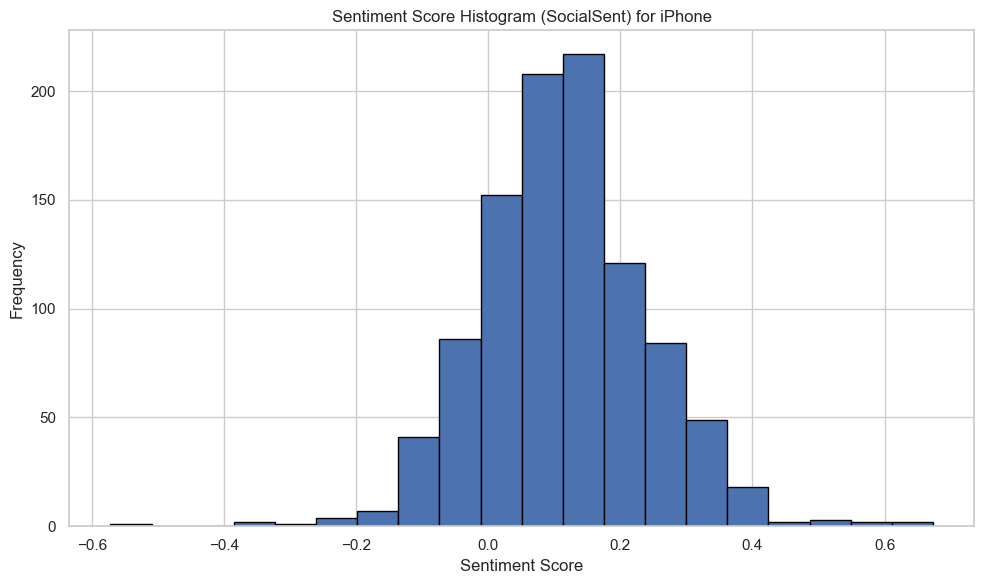

In [206]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [207]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The colour is really vibrant and beautiful. Fits perfectly on iPhone13. Soft touch on the exterior, easy to fit and sturdy . Comes with 2 screen protectors, 2 glass camera protectors and it’s all wrapped up in a beautiful box.Thank you note inside with three cute stickers. Highly recommend!
---------------------------------------------------------------------------------------------------
1 Perfect fit for the iPhone 15, it’s lightweight and doesn’t add bulk to the phone, while giving it great protection. The MagSafe charging is super strong. The kickstand is a great feature and love how it blends in around the rear cameras.I purchased the clear so I could enjoy the colour of phone I chose.
---------------------------------------------------------------------------------------------------
2 Great quality phone and as described. Really well packaged and arrived faster than we were advised. Super service from the supplier and great communications. Would absolutely recommend. Have bough

In [208]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I upgraded from an iPhone 12 Pro. This phone is good but there are various problems that irk me. They’re probably iOS rather than the phone itself but I didn’t have them on my 12 Pro.Main one being the wallpaper vanishes randomly for random lengths of time, and random lengths of time.
---------------------------------------------------------------------------------------------------
1 Honestly was a bit scared to buy this case as I was worried it would be one of those flimsy plastic ones.But i was pleasantly surprised.This case seems strong and i can show off my pretty iphone colour with it.Ive dropped it once and not even a chip off the case.Would highly recommend.
---------------------------------------------------------------------------------------------------
2 HoweverI have problems for the last few monthsWhen making calls,, the callers can hardly hear me, but it is that same where I cannot hear them.I am also experiencing difficulties when I touch the screen, and regularly hav

In [209]:
# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_iphone


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1686458130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search  Product Price  \
4000  iPhone           1038   
4001  iPhone           1689   
4002  iPhone            259   
4003  iPhone            953   
4004  iPhone            599   
...      ...            ...   
4995  iPhone             25   
4996  iPhone             11   
4997  iPhone            380   
4998  iPhone            247   
4999  iPhone            134   

                                                Comment  \
4000  This will be a long and detailed review. I am ...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4002  I have been waiting for Umidigi to release an ...   
4003  I've been a long-time user of Android and I'm ...   
4004  Before we start, apologies for the long review...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
4000  long detailed review writing guide resistant w...   
4001  nachdem ich ein iphone size pro max von merest...   
4002  waiting umidigi release unlocked phone global ...   
4003  long time user android also tech enthusiast us...   
4004  start apology long review hope useful submissi...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  Length Price_Segment  \
4000  This will be a long and detailed review . I am...   10441     Expensive   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive   
4002  I have been waiting for Umidigi to release an ...    7158     Expensive   
4003  I have been a long - time user of Android and ...    4335     Expensive   
4004  Before we start , apologies for the long revie...    4220     Expensive   
...                                                 ...     ...           ...   
4995  Just bought this MagSafe horrid case with stan...     280         Cheap   
4996  Brilliant product and quite sturdy and a barga...     280         Cheap   
4997  The description says “ Like New ” . The appear...     280     Expensive   
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive   
4999  Most things about this purchase were great , t...     279     Expensive   

                                      Tokenized_Comment  Topic  \
4000  [long, detailed, review, writing, guide, resis...      4   
4001  [nachdem, ich, ein, iphone, size, pro, max, vo...      2   
4002  [waiting, umidigi, release, unlocked, phone, g...      4   
4003  [long, time, user, android, also, tech, enthus...      4   
4004  [start, apology, long, review, hope, useful, s...      4   
...                                                 ...    ...   
4995  [bought, magsafe, horrid, case, stand, armorit...      3   
4996  [brilliant, product, quite, sturdy, bargain, c...      3   
4997  [description, say, like, new, ”, appearance, l...      4   
4998  [bought, iphone, size, unconditioned, excellen...      4   
4999  [thing, purchase, great, one, little, flaw, ph...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9996                Positive                Positive   
4001               -0.9991                Negative                Positive   
4002                0.9991                Positive                Positive   
4003                0.9983                Positive                Positive   
4004                0.9993                Positive         

***27.2. Macbook***

In [211]:
df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2924118264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)


Search  Product Price  \
2000  Macbook            139   
2001  Macbook            139   
2002  Macbook            139   
2003  Macbook           1249   
2004  Macbook              0   
...       ...            ...   
2995  Macbook            499   
2996  Macbook            599   
2997  Macbook            349   
2998  Macbook            293   
2999  Macbook            619   

                                                Comment  \
2000  I'm in my last semester (hopefully) of my unde...   
2001  To start, this Chromebook is the best one I ha...   
2002  Alright folks, I just bought my first chromebo...   
2003  I shall break this review into 2 categories - ...   
2004  Have you been putting off upgrading that Retin...   
...                                                 ...   
2995  really nice laptop, runs windows 11 and Adobe ...   
2996  I thought a refurbished MacBook won’t be as go...   
2997  Just got it today! Fast delivery! Used it for ...   
2998  Bought this MacBook pro for my son and he’s ov...   
2999  Fantastic item my daughter is over the moon wi...   

                                        Cleaned_Comment  \
2000  last smelter hopefully undergrad size year old...   
2001  start chromebook best one ever owned read revi...   
2002  alright folk bought first chromebook hour hour...   
2003  shall break review size category hardware soft...   
2004  putting upbraiding retina macbook pro reluctan...   
...                                                 ...   
2995  really nice laptop run window size done nicely...   
2996  thought refurbished macbook good considering c...   
2997  got today last delivery used day hardly felt l...   
2998  bought macbook pro son moon battery life amazi...   
2999  fantastic item daughter moon sent faulty item ...   

                                      Sentiment_Comment  Length Price_Segment  \
2000  I am in my last smelter ( hopefully ) of my un...    8448         Cheap   
2001  To start , this Chromebook is the best one I h...    7585         Cheap   
2002  Alright folks , I just bought my first chromeb...    6001         Cheap   
2003  I shall break this review into [ SIZE ] catego...    5538     Expensive   
2004  Have you been putting off upbraiding that Reti...    5022         Cheap   
...                                                 ...     ...           ...   
2995  really nice laptop , runs windows [ SIZE ] and...     203     Expensive   
2996  I thought a refurbished MacBook will not be as...     203     Expensive   
2997  Just got it today ! Last delivery ! Used it fo...     203         Cheap   
2998  Bought this MacBook pro for my son and he is o...     203         Cheap   
2999  Fantastic item my daughter is over the moon wi...     202     Expensive   

                                      Tokenized_Comment  Topic  \
2000  [last, smelter, hopefully, undergrad, size, ye...      3   
2001  [start, chromebook, best, one, ever, owned, re...      3   
2002  [alright, folk, bought, first, chromebook, hou...      3   
2003  [shall, break, review, size, category, hardwar...      3   
2004  [putting, upbraiding, retina, macbook, pro, re...      0   
...                                                 ...    ...   
2995  [really, nice, laptop, run, window, size, done...      1   
2996  [thought, refurbished, macbook, good, consider...      4   
2997  [got, today, last, delivery, used, day, hardly...      0   
2998  [bought, macbook, pro, son, moon, battery, lif...      1   
2999  [fantastic, item, daughter, moon, sent, faulty...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9993                Positive                Positive   
2001                0.9992                Positive                Positive   
2002                0.9995                Positive                Positive   
2003                0.9795                Positive                Positive   
2004                0.9995                Positi

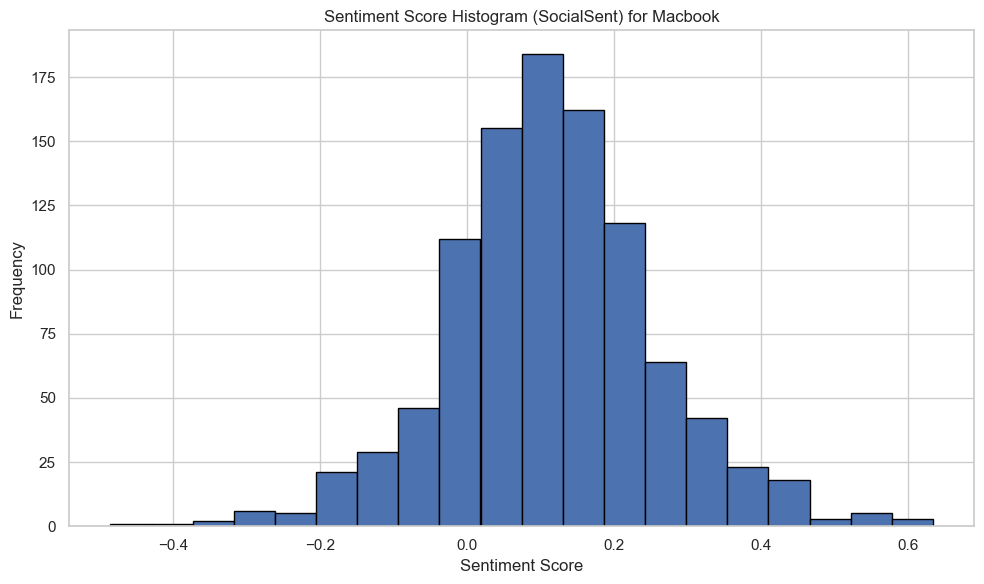

In [212]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [213]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 This is a good value basic laptop.Pros - Great screen.pretty responsivedecent amount of storagevery quietCons - battery life is pretty poortouchpad is not as responsive as i would likein built camera and mic are not very good quality
---------------------------------------------------------------------------------------------------
1 Pretty solid running speed, has some nice backlight colors - you can switch through them using fn + f2. Has good quality as well, definitely recommend if you're on a budget or not looking to spend too much. Especially if you want a laptop for simple personal use. It’s pretty good!
---------------------------------------------------------------------------------------------------
2 A very lightweight laptop with a decent screen.It's quick and responsive, ideal for work or browsing.Customer service were very helpful when I lost the charger.Would recommend to others,great value for money.
---------------------------------------------------------------------

In [214]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 sticky keys, and a battery fault- however I sent it back to the company who offered to fix the fault or a partial refund (I had some accidental damage) and they sent it back out very quickly and repaired my only fried was trying to send it with ups.
---------------------------------------------------------------------------------------------------
1 Exactly as described in the advert, arrived when expected, in excellent condition. I’ve used the MacBook everyday since and so far it’s been faultless. Much better than buying a cheap and nasty laptop. Very happy.
---------------------------------------------------------------------------------------------------
2 Just got it today! Fast delivery! Used it for a day and it hardly felt like a (acceptable condition) macbook air. A couple small dents at the edge and scratches but it didn’t bother me. Would recommend!!
---------------------------------------------------------------------------------------------------
3 I was a bit sceptical ab

In [215]:
# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2596257996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search  Product Price  \
2000  Macbook            139   
2001  Macbook            139   
2002  Macbook            139   
2003  Macbook           1249   
2004  Macbook              0   
...       ...            ...   
2995  Macbook            499   
2996  Macbook            599   
2997  Macbook            349   
2998  Macbook            293   
2999  Macbook            619   

                                                Comment  \
2000  I'm in my last semester (hopefully) of my unde...   
2001  To start, this Chromebook is the best one I ha...   
2002  Alright folks, I just bought my first chromebo...   
2003  I shall break this review into 2 categories - ...   
2004  Have you been putting off upgrading that Retin...   
...                                                 ...   
2995  really nice laptop, runs windows 11 and Adobe ...   
2996  I thought a refurbished MacBook won’t be as go...   
2997  Just got it today! Fast delivery! Used it for ...   
2998  Bought this MacBook pro for my son and he’s ov...   
2999  Fantastic item my daughter is over the moon wi...   

                                        Cleaned_Comment  \
2000  last smelter hopefully undergrad size year old...   
2001  start chromebook best one ever owned read revi...   
2002  alright folk bought first chromebook hour hour...   
2003  shall break review size category hardware soft...   
2004  putting upbraiding retina macbook pro reluctan...   
...                                                 ...   
2995  really nice laptop run window size done nicely...   
2996  thought refurbished macbook good considering c...   
2997  got today last delivery used day hardly felt l...   
2998  bought macbook pro son moon battery life amazi...   
2999  fantastic item daughter moon sent faulty item ...   

                                      Sentiment_Comment  Length Price_Segment  \
2000  I am in my last smelter ( hopefully ) of my un...    8448         Cheap   
2001  To start , this Chromebook is the best one I h...    7585         Cheap   
2002  Alright folks , I just bought my first chromeb...    6001         Cheap   
2003  I shall break this review into [ SIZE ] catego...    5538     Expensive   
2004  Have you been putting off upbraiding that Reti...    5022         Cheap   
...                                                 ...     ...           ...   
2995  really nice laptop , runs windows [ SIZE ] and...     203     Expensive   
2996  I thought a refurbished MacBook will not be as...     203     Expensive   
2997  Just got it today ! Last delivery ! Used it fo...     203         Cheap   
2998  Bought this MacBook pro for my son and he is o...     203         Cheap   
2999  Fantastic item my daughter is over the moon wi...     202     Expensive   

                                      Tokenized_Comment  Topic  \
2000  [last, smelter, hopefully, undergrad, size, ye...      3   
2001  [start, chromebook, best, one, ever, owned, re...      3   
2002  [alright, folk, bought, first, chromebook, hou...      3   
2003  [shall, break, review, size, category, hardwar...      3   
2004  [putting, upbraiding, retina, macbook, pro, re...      0   
...                                                 ...    ...   
2995  [really, nice, laptop, run, window, size, done...      1   
2996  [thought, refurbished, macbook, good, consider...      4   
2997  [got, today, last, delivery, used, day, hardly...      0   
2998  [bought, macbook, pro, son, moon, battery, lif...      1   
2999  [fantastic, item, daughter, moon, sent, faulty...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9993                Positive                Positive   
2001                0.9992                Positive                Positive   
2002                0.9995                Positive                Positive   
2003                0.9795                Positive                Positive   
2004                0.9995                Positi

***27.3. iPad***

In [217]:
df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1361102979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)


Search  Product Price                                            Comment  \
3000   iPad             73  I bought this tablet when I retired and had mo...   
3001   iPad             89  I've been using this for a few weeks now and I...   
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3003   iPad            527  Over a year ago, I used the iPad 5th gen to co...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
...     ...            ...                                                ...   
3995   iPad            105  Two weeks usage and so far very impressed with...   
3996   iPad             19  Bought blue version for iPhone 15 supplied USB...   
3997   iPad             19  This is a very good quality product as my son ...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3999   iPad             16  The protector is nice and clear so doesn't dam...   

                                        Cleaned_Comment  \
3000  bought tablet retired time sit around reading ...   
3001  using week impressed fit ipad size pro magnifi...   
3002  introduction rvntop 20w usb c last larger bund...   
3003  year ago used ipad th gen control smart home a...   
3004  journey procase size back screen protector ipa...   
...                                                 ...   
3995  two week usage far impressed bundle tablet per...   
3996  bought blue version iphone size supplied usb c...   
3997  good quality product son started use pleasantl...   
3998  absolutely phenomenon alternative apple pen st...   
3999  protector nice clear damper ipad pro screen co...   

                                      Sentiment_Comment  Length Price_Segment  \
3000  I bought this tablet when I retired and had mo...    5271     Expensive   
3001  I have been using this for a few weeks now and...    4876     Expensive   
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap   
3003  Over a year ago , I used the iPad th gen to co...    3774     Expensive   
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap   
...                                                 ...     ...           ...   
3995  Two weeks usage and so far very impressed with...     291     Expensive   
3996  Bought blue version for iPhone [ SIZE ] suppli...     291         Cheap   
3997  This is a very good quality product as my son ...     291         Cheap   
3998  Absolutely phenomena alternative to an apple p...     290         Cheap   
3999  The protector is nice and clear so does not da...     290         Cheap   

                                      Tokenized_Comment  Topic  \
3000  [bought, tablet, retired, time, sit, around, r...      0   
3001  [using, week, impressed, fit, ipad, size, pro,...      0   
3002  [introduction, rvntop, 20w, usb, c, last, larg...      4   
3003  [year, ago, used, ipad, th, gen, control, smar...      4   
3004  [journey, procase, size, back, screen, protect...      2   
...                                                 ...    ...   
3995  [two, week, usage, far, impressed, bundle, tab...      0   
3996  [bought, blue, version, iphone, size, supplied...      0   
3997  [good, quality, product, son, started, use, pl...      3   
3998  [absolutely, phenomenon, alternative, apple, p...      0   
3999  [protector, nice, clear, damper, ipad, pro, sc...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9993                Positive                Positive   
3001                0.9925                Positive                Positive   
3002               -0.6743                Negative                Positive   
3003                0.9985                Positive                Positive   
3004               -0.9934                Negative                Positive   
...                    ...                     ...                     ...   
3995       

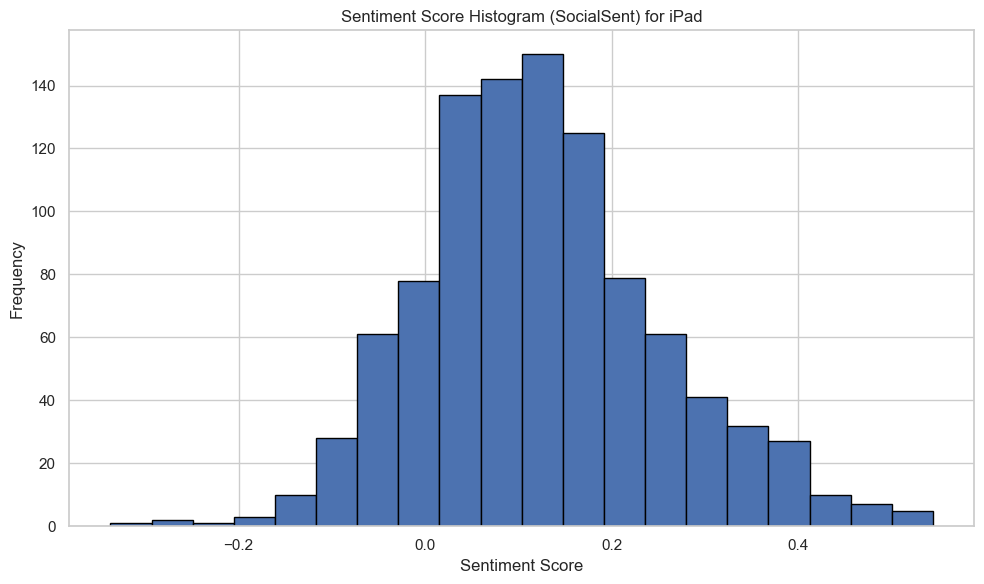

In [218]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [219]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The protective cover is really good. It's all-round protection against falling. It fits my iPad very well. The eyelets can all be right. The texture of super nice protective shell is also very soft. It's very comfortable to touch. With it, I can rest assured. Finally, what I am most satisfied with is the beauty value and endurance
---------------------------------------------------------------------------------------------------
1 Great buy for the casual user like myself. My old ipad only and had limited editions and didn't update beyond the 12th. But this ipad is excellent for all my needs. Quick, sharp, great back light feature.Good job all round. Quick charging feature and battery life is very good. "Yeah, good product". Thanks
---------------------------------------------------------------------------------------------------
2 This Moko sleeve in blue was a great match for my iPad Air 4 blue protective cover. I had measured the cover and the sleeve fitted perfectly over the iPad

In [220]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I got this back in August because I loved the look of the green set. The colour is lovely and the iPad case itself is good (got compliments on it) but the keyboard was playing up pretty much since I got it and just got worse over the next few weeks. It and the mouse bug out a lot. If you want this for the mouse and keyboard more than than the case then I’d advise to get something else.
---------------------------------------------------------------------------------------------------
1 The ipad itself was in perfect condition with no scratches. Came with an unofficial charger and charging lead. I was a bit shocked by the packaging, no ipad box, just put with a bit of bubble wrap into a cardboard box. Everything was working as normal until it restarted itself randomly. Tried a bunch of fixes to see if it would help, and after hours of troubleshooting I still had the same problem. Battery life was awful, ipad constantly restarting. I don't think the ipad was tested further than if it t

In [221]:
# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1972745783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search  Product Price                                            Comment  \
3000   iPad             73  I bought this tablet when I retired and had mo...   
3001   iPad             89  I've been using this for a few weeks now and I...   
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3003   iPad            527  Over a year ago, I used the iPad 5th gen to co...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
...     ...            ...                                                ...   
3995   iPad            105  Two weeks usage and so far very impressed with...   
3996   iPad             19  Bought blue version for iPhone 15 supplied USB...   
3997   iPad             19  This is a very good quality product as my son ...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3999   iPad             16  The protector is nice and clear so doesn't dam...   

                                        Cleaned_Comment  \
3000  bought tablet retired time sit around reading ...   
3001  using week impressed fit ipad size pro magnifi...   
3002  introduction rvntop 20w usb c last larger bund...   
3003  year ago used ipad th gen control smart home a...   
3004  journey procase size back screen protector ipa...   
...                                                 ...   
3995  two week usage far impressed bundle tablet per...   
3996  bought blue version iphone size supplied usb c...   
3997  good quality product son started use pleasantl...   
3998  absolutely phenomenon alternative apple pen st...   
3999  protector nice clear damper ipad pro screen co...   

                                      Sentiment_Comment  Length Price_Segment  \
3000  I bought this tablet when I retired and had mo...    5271     Expensive   
3001  I have been using this for a few weeks now and...    4876     Expensive   
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap   
3003  Over a year ago , I used the iPad th gen to co...    3774     Expensive   
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap   
...                                                 ...     ...           ...   
3995  Two weeks usage and so far very impressed with...     291     Expensive   
3996  Bought blue version for iPhone [ SIZE ] suppli...     291         Cheap   
3997  This is a very good quality product as my son ...     291         Cheap   
3998  Absolutely phenomena alternative to an apple p...     290         Cheap   
3999  The protector is nice and clear so does not da...     290         Cheap   

                                      Tokenized_Comment  Topic  \
3000  [bought, tablet, retired, time, sit, around, r...      0   
3001  [using, week, impressed, fit, ipad, size, pro,...      0   
3002  [introduction, rvntop, 20w, usb, c, last, larg...      4   
3003  [year, ago, used, ipad, th, gen, control, smar...      4   
3004  [journey, procase, size, back, screen, protect...      2   
...                                                 ...    ...   
3995  [two, week, usage, far, impressed, bundle, tab...      0   
3996  [bought, blue, version, iphone, size, supplied...      0   
3997  [good, quality, product, son, started, use, pl...      3   
3998  [absolutely, phenomenon, alternative, apple, p...      0   
3999  [protector, nice, clear, damper, ipad, pro, sc...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9993                Positive                Positive   
3001                0.9925                Positive                Positive   
3002               -0.6743                Negative                Positive   
3003                0.9985                Positive                Positive   
3004               -0.9934                Negative                Positive   
...                    ...                     ...                     ...   
3995       

***27.4. AirPods***

In [223]:
df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1246500405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)


Search  Product Price  \
0    AirPods             59   
1    AirPods             99   
2    AirPods             99   
3    AirPods            209   
4    AirPods            120   
..       ...            ...   
995  AirPods             79   
996  AirPods             15   
997  AirPods            479   
998  AirPods             19   
999  AirPods             15   

                                               Comment  \
0    The Philips T8505 Active Noise Cancelling True...   
1    TL;DR - a stunning set of wireless headphones ...   
2    I bought these in May 2021 and a few other wir...   
3    FURTHER UPDATE, FEB 2021I have experienced pai...   
4    Firstly, let me apologise for the long read bu...   
..                                                 ...   
995  The Galaxy Buds are great!The black colour loo...   
996  Am not into buying expensive earphones as it's...   
997  Good sounding and very comfortable wireless he...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   
999  Delivery & Packaging - the airpods were delive...   

                                       Cleaned_Comment  \
0    philip t8505 active noise panelling true wirel...   
1    stunning set wireless headphone prompted write...   
2    bought may size wireless airpods time specific...   
3    update feb 2021i experienced paring issue size...   
4    firstly let apologise long read really wanted ...   
..                                                 ...   
995  galaxy bud great black colour look sleek actua...   
996  buying expensive earphone easy lose damage sou...   
997  good sounding comfortable wireless headphone w...   
998  sunday size january size size size gmt cab bud...   
999  delivery packaging airpods delivered next day ...   

                                     Sentiment_Comment  Length Price_Segment  \
0    The Philip T8505 Active Noise Panelling True W...   13149     Expensive   
1    of ; of - a stunning set of wireless headphone...   10252     Expensive   
2    I bought these in May [ SIZE ] and a few other...    9998     Expensive   
3    FURTHER UPDATE , FEB 2021I have experienced pa...    9081     Expensive   
4    Firstly , let me apologise for the long read b...    8087     Expensive   
..                                                 ...     ...           ...   
995  The Galaxy Buds are great ! The black colour l...    1406     Expensive   
996  Am not into buying expensive earphones as it i...    1404         Cheap   
997  Good sounding and very comfortable wireless he...    1404     Expensive   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap   
999  Delivery & Packaging - the airpods were delive...    1400         Cheap   

                                     Tokenized_Comment  Topic  \
0    [philip, t8505, active, noise, panelling, true...      4   
1    [stunning, set, wireless, headphone, prompted,...      1   
2    [bought, may, size, wireless, airpods, time, s...      1   
3    [update, feb, 2021i, experienced, paring, issu...      2   
4    [firstly, let, apologise, long, read, really, ...      1   
..                                                 ...    ...   
995  [galaxy, bud, great, black, colour, look, slee...      1   
996  [buying, expensive, earphone, easy, lose, dama...      1   
997  [good, sounding, comfortable, wireless, headph...      1   
998  [sunday, size, january, size, size, size, gmt,...      1   
999  [delivery, packaging, airpods, delivered, next...      1   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  1.0000                Positive                Positive   
1                  0.9994                Positive                Positive   
2                  0.9996                Positive                Positive   
3                  0.9995                Positive                Positive   
4                  0.9998                Positive                Positive   
..                    ...          

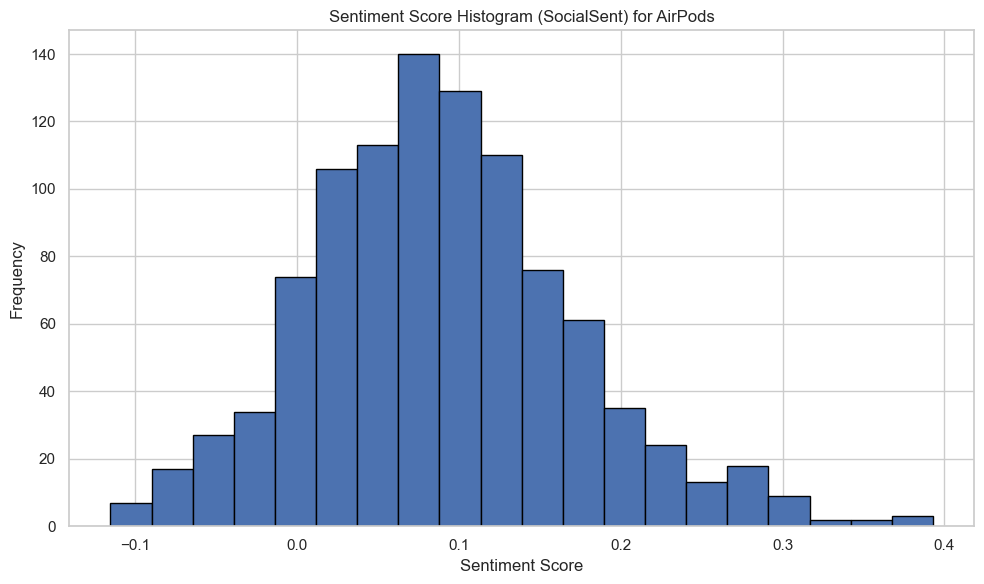

In [224]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [225]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The media could not be loaded. These are nice, comfortable airpods. They are definitely "gaming" airpods, as the case lights up! :DThe sound quality is good, and everything is nice and clear. I think an app to adjust bass etc would be good and fitting to their style.Everything is packaged beautifully, and all great quality, the metal charging case is fantastic and looks really great, even the box is nice good quality solid plastic.I was really impressed with the charging case, it's a chunky, heavy and solid bit of kit and has a nice bag to carry it in too.Twist the Y shape cover to access the airpods, pop them back in and they start charging. Simple.The lights are a bit of a gimmick, but they look really great. I'm unsure as to why everything "gaming" has to have RGB lighting on it, but it seems to be the way and these fit in the aesthetic nicely.They pair quickly and easily, I paired the iphone, Nintendo Switch and popped the dongle into the PS5 and it connected to that easily too.I

In [226]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I've had these earphones for about a month now, and so have had time to put them through their paces.They really do stand up to what they promise!They are exceptionally comfortable. Even when worn for a very long duration.They sound good. But don't expect true HiFi quality here. That's not what they are made for, but they do sound good. Being "On Ear" and "Open" you will get some sound leakage, but it is only very minor. But colleagues sat close to you will be able to hear them if they listen very carefully. That said sound leakage is very minor and shouldn't sway your decision to purchase. And of course the big advantage with "On Ear" rather than "In Ear" is that you will not be sending high Decibels into your eardrums with the potential of causing ear damage.Battery Life is extremely good at a claimed 16 hours. I haven't tested that feature as I re-charged mine before the battery had expired completely, but I did have several hours usage before I re-charged, and I have no reason to

In [227]:
# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_airpods


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1346995673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search  Product Price  \
0    AirPods             59   
1    AirPods             99   
2    AirPods             99   
3    AirPods            209   
4    AirPods            120   
..       ...            ...   
995  AirPods             79   
996  AirPods             15   
997  AirPods            479   
998  AirPods             19   
999  AirPods             15   

                                               Comment  \
0    The Philips T8505 Active Noise Cancelling True...   
1    TL;DR - a stunning set of wireless headphones ...   
2    I bought these in May 2021 and a few other wir...   
3    FURTHER UPDATE, FEB 2021I have experienced pai...   
4    Firstly, let me apologise for the long read bu...   
..                                                 ...   
995  The Galaxy Buds are great!The black colour loo...   
996  Am not into buying expensive earphones as it's...   
997  Good sounding and very comfortable wireless he...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   
999  Delivery & Packaging - the airpods were delive...   

                                       Cleaned_Comment  \
0    philip t8505 active noise panelling true wirel...   
1    stunning set wireless headphone prompted write...   
2    bought may size wireless airpods time specific...   
3    update feb 2021i experienced paring issue size...   
4    firstly let apologise long read really wanted ...   
..                                                 ...   
995  galaxy bud great black colour look sleek actua...   
996  buying expensive earphone easy lose damage sou...   
997  good sounding comfortable wireless headphone w...   
998  sunday size january size size size gmt cab bud...   
999  delivery packaging airpods delivered next day ...   

                                     Sentiment_Comment  Length Price_Segment  \
0    The Philip T8505 Active Noise Panelling True W...   13149     Expensive   
1    of ; of - a stunning set of wireless headphone...   10252     Expensive   
2    I bought these in May [ SIZE ] and a few other...    9998     Expensive   
3    FURTHER UPDATE , FEB 2021I have experienced pa...    9081     Expensive   
4    Firstly , let me apologise for the long read b...    8087     Expensive   
..                                                 ...     ...           ...   
995  The Galaxy Buds are great ! The black colour l...    1406     Expensive   
996  Am not into buying expensive earphones as it i...    1404         Cheap   
997  Good sounding and very comfortable wireless he...    1404     Expensive   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap   
999  Delivery & Packaging - the airpods were delive...    1400         Cheap   

                                     Tokenized_Comment  Topic  \
0    [philip, t8505, active, noise, panelling, true...      4   
1    [stunning, set, wireless, headphone, prompted,...      1   
2    [bought, may, size, wireless, airpods, time, s...      1   
3    [update, feb, 2021i, experienced, paring, issu...      2   
4    [firstly, let, apologise, long, read, really, ...      1   
..                                                 ...    ...   
995  [galaxy, bud, great, black, colour, look, slee...      1   
996  [buying, expensive, earphone, easy, lose, dama...      1   
997  [good, sounding, comfortable, wireless, headph...      1   
998  [sunday, size, january, size, size, size, gmt,...      1   
999  [delivery, packaging, airpods, delivered, next...      1   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  1.0000                Positive                Positive   
1                  0.9994                Positive                Positive   
2                  0.9996                Positive                Positive   
3                  0.9995                Positive                Positive   
4                  0.9998                Positive                Positive   
..                    ...          

***27.5. Apple Watch***

In [229]:
df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3320060839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)


Search  Product Price  \
1000  Apple Watch            399   
1001  Apple Watch            369   
1002  Apple Watch             71   
1003  Apple Watch             44   
1004  Apple Watch             29   
...           ...            ...   
1995  Apple Watch             18   
1996  Apple Watch              6   
1997  Apple Watch             21   
1998  Apple Watch             14   
1999  Apple Watch              0   

                                                Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                        Cleaned_Comment  \
1000  often upgrade smart device upgrade iphone ever...   
1001  apple watch series size latest operation apple...   
1002  wish read review purchased many review spot bo...   
1003  say watch good reasonably price useful feature...   
1004  charging station one favorite recent purchase ...   
...                                                 ...   
1995  k price one received mark strap doesnot come g...   
1996  comfortable replacement old tired original app...   
1997  strap great look feel like apple strap well wo...   
1998  good value moneycolour true advertised colourl...   
1999  love product colour combination outfit fabulou...   

                                      Sentiment_Comment  Length Price_Segment  \
1000  How often do you upgrade your smart devices ? ...    8134     Expensive   
1001  The Apple Watch Series [ SIZE ] is the latest ...    5039     Expensive   
1002  I wish I had read these reviews before I purch...    3873     Expensive   
1003  I have to say this watch is good , and reasona...    3539     Expensive   
1004  This charging station is one of my favorite re...    3339     Expensive   
...                                                 ...     ...           ...   
1995  K for the price . The one i received has a mar...     111     Expensive   
1996  Very comfortable replacement for an old tired ...     111         Cheap   
1997  These straps are great they look and feel just...     111     Expensive   
1998  Very good value for moneyColour true to advert...     111         Cheap   
1999  Love this product - colour combinations with m...     110         Cheap   

                                      Tokenized_Comment  Topic  \
1000  [often, upgrade, smart, device, upgrade, iphon...      3   
1001  [apple, watch, series, size, latest, operation...      3   
1002  [wish, read, review, purchased, many, review, ...      0   
1003  [say, watch, good, reasonably, price, useful, ...      3   
1004  [charging, station, one, favorite, recent, pur...      4   
...                                                 ...    ...   
1995  [k, price, one, received, mark, strap, doesnot...      3   
1996  [comfortable, replacement, old, tired, origina...      2   
1997  [strap, great, look, feel, like, apple, strap,...      2   
1998  [good, value, moneycolour, true, advertised, c...      1   
1999  [love, product, colour, combination, outfit, f...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9995                Positive                Positive   
1001                0.9971                Positive                Positive   
1002               -0.3640                Negative                Positive   
1003                0.9954                Positive                Positive   
1004

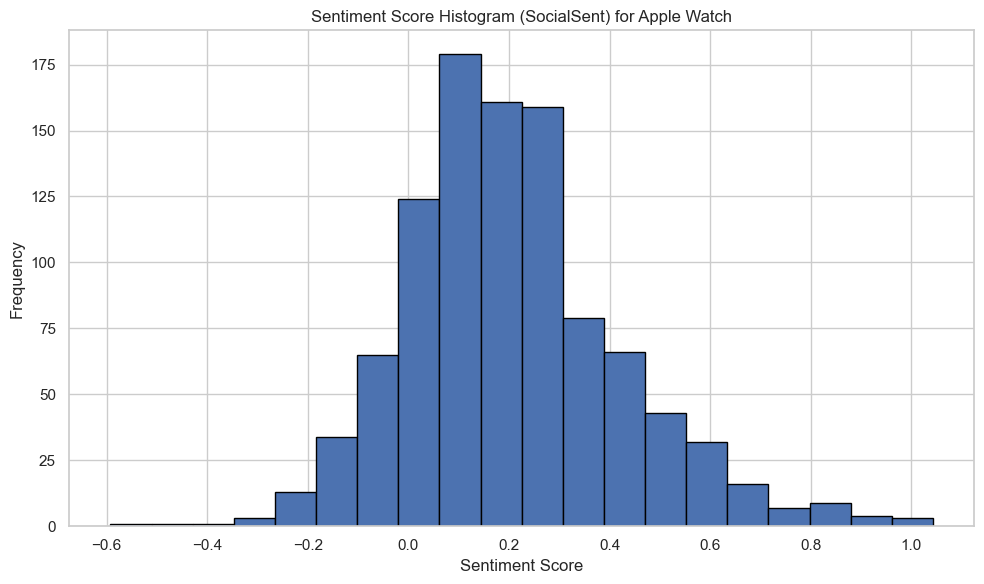

In [230]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [231]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The strap is really attractive, I love the colour design and fit. It fastens securely and is comfortable. Very happy with my purchase.
---------------------------------------------------------------------------------------------------
1 Classy looking straps; great colours ; comfortable to wear and perfect fit for even tiny wrists like mine! Highly recommend
---------------------------------------------------------------------------------------------------
2 Easy to fit and did the job perfectly. The shiny finish is not noticeable with the light brushed aluminium finish of my watch.
---------------------------------------------------------------------------------------------------
3 Straps are nice and comfortable well worth the price especially for three as well, I find these more comfortable than plastic straps, great for casual wear..
---------------------------------------------------------------------------------------------------
4 Super nice quality watch straps. Easy to adjus

In [232]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Bought from Loop-mobile.Watch in good condition. However the strap is not Apple. Considering you buy the watch for the whole product and this was not stated - I feel this is disingenuous.The strap also smells terrible.
---------------------------------------------------------------------------------------------------
1 Avoid this seller, even though I got a refund eventually, they were hard to get a response from and the watcvh was described as excellent and it was awful. Scratched and scuffed and looked like it had taken one hell of a battering.
---------------------------------------------------------------------------------------------------
2 The item was stated as excellent condition however the screen has a lot and very noticeabledamage to it that you could physically feel
---------------------------------------------------------------------------------------------------
3 I was very excited for this protector having used several others but turns out this is the worst. Not even

In [233]:
# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_watch


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/4099690096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search  Product Price  \
1000  Apple Watch            399   
1001  Apple Watch            369   
1002  Apple Watch             71   
1003  Apple Watch             44   
1004  Apple Watch             29   
...           ...            ...   
1995  Apple Watch             18   
1996  Apple Watch              6   
1997  Apple Watch             21   
1998  Apple Watch             14   
1999  Apple Watch              0   

                                                Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                        Cleaned_Comment  \
1000  often upgrade smart device upgrade iphone ever...   
1001  apple watch series size latest operation apple...   
1002  wish read review purchased many review spot bo...   
1003  say watch good reasonably price useful feature...   
1004  charging station one favorite recent purchase ...   
...                                                 ...   
1995  k price one received mark strap doesnot come g...   
1996  comfortable replacement old tired original app...   
1997  strap great look feel like apple strap well wo...   
1998  good value moneycolour true advertised colourl...   
1999  love product colour combination outfit fabulou...   

                                      Sentiment_Comment  Length Price_Segment  \
1000  How often do you upgrade your smart devices ? ...    8134     Expensive   
1001  The Apple Watch Series [ SIZE ] is the latest ...    5039     Expensive   
1002  I wish I had read these reviews before I purch...    3873     Expensive   
1003  I have to say this watch is good , and reasona...    3539     Expensive   
1004  This charging station is one of my favorite re...    3339     Expensive   
...                                                 ...     ...           ...   
1995  K for the price . The one i received has a mar...     111     Expensive   
1996  Very comfortable replacement for an old tired ...     111         Cheap   
1997  These straps are great they look and feel just...     111     Expensive   
1998  Very good value for moneyColour true to advert...     111         Cheap   
1999  Love this product - colour combinations with m...     110         Cheap   

                                      Tokenized_Comment  Topic  \
1000  [often, upgrade, smart, device, upgrade, iphon...      3   
1001  [apple, watch, series, size, latest, operation...      3   
1002  [wish, read, review, purchased, many, review, ...      0   
1003  [say, watch, good, reasonably, price, useful, ...      3   
1004  [charging, station, one, favorite, recent, pur...      4   
...                                                 ...    ...   
1995  [k, price, one, received, mark, strap, doesnot...      3   
1996  [comfortable, replacement, old, tired, origina...      2   
1997  [strap, great, look, feel, like, apple, strap,...      2   
1998  [good, value, moneycolour, true, advertised, c...      1   
1999  [love, product, colour, combination, outfit, f...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9995                Positive                Positive   
1001                0.9971                Positive                Positive   
1002               -0.3640                Negative                Positive   
1003                0.9954                Positive                Positive   
1004

**28. Sentiment analysis with TextBlob**

***28.1. iPhone***

In [267]:
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity

# Apply sentiment analysis to calculate polarity
df_iphone['SentimentScore_TextBlob'] = df_iphone['Sentiment_Comment'].apply(analyze_sentiment)

# Optionally, you can also include the Sentiment Category based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df_iphone['SentimentCategory_TextBlob'] = df_iphone['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1198180241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_TextBlob'] = df_iphone['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1198180241.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_TextBlob'] = df_iphone['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search  Product Price  \
4000  iPhone           1038   
4001  iPhone           1689   
4002  iPhone            259   
4003  iPhone            953   
4004  iPhone            599   
...      ...            ...   
4995  iPhone             25   
4996  iPhone             11   
4997  iPhone            380   
4998  iPhone            247   
4999  iPhone            134   

                                                Comment  \
4000  This will be a long and detailed review. I am ...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4002  I have been waiting for Umidigi to release an ...   
4003  I've been a long-time user of Android and I'm ...   
4004  Before we start, apologies for the long review...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
4000  long detailed review writing guide resistant w...   
4001  nachdem ich ein iphone size pro max von merest...   
4002  waiting umidigi release unlocked phone global ...   
4003  long time user android also tech enthusiast us...   
4004  start apology long review hope useful submissi...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  Length Price_Segment  \
4000  This will be a long and detailed review . I am...   10441     Expensive   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive   
4002  I have been waiting for Umidigi to release an ...    7158     Expensive   
4003  I have been a long - time user of Android and ...    4335     Expensive   
4004  Before we start , apologies for the long revie...    4220     Expensive   
...                                                 ...     ...           ...   
4995  Just bought this MagSafe horrid case with stan...     280         Cheap   
4996  Brilliant product and quite sturdy and a barga...     280         Cheap   
4997  The description says “ Like New ” . The appear...     280     Expensive   
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive   
4999  Most things about this purchase were great , t...     279     Expensive   

                                      Tokenized_Comment  Topic  \
4000  [long, detailed, review, writing, guide, resis...      0   
4001  [nachdem, ich, ein, iphone, size, pro, max, vo...      1   
4002  [waiting, umidigi, release, unlocked, phone, g...      0   
4003  [long, time, user, android, also, tech, enthus...      0   
4004  [start, apology, long, review, hope, useful, s...      4   
...                                                 ...    ...   
4995  [bought, magsafe, horrid, case, stand, armorit...      4   
4996  [brilliant, product, quite, sturdy, bargain, c...      4   
4997  [description, say, like, new, ”, appearance, l...      2   
4998  [bought, iphone, size, unconditioned, excellen...      3   
4999  [thing, purchase, great, one, little, flaw, ph...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9996                Positive                Positive   
4001               -0.9991                Negative                Positive   
4002                0.9991                Positive                Positive   
4003                0.9983                Positive                Positive   
4004                0.9993                Positive         

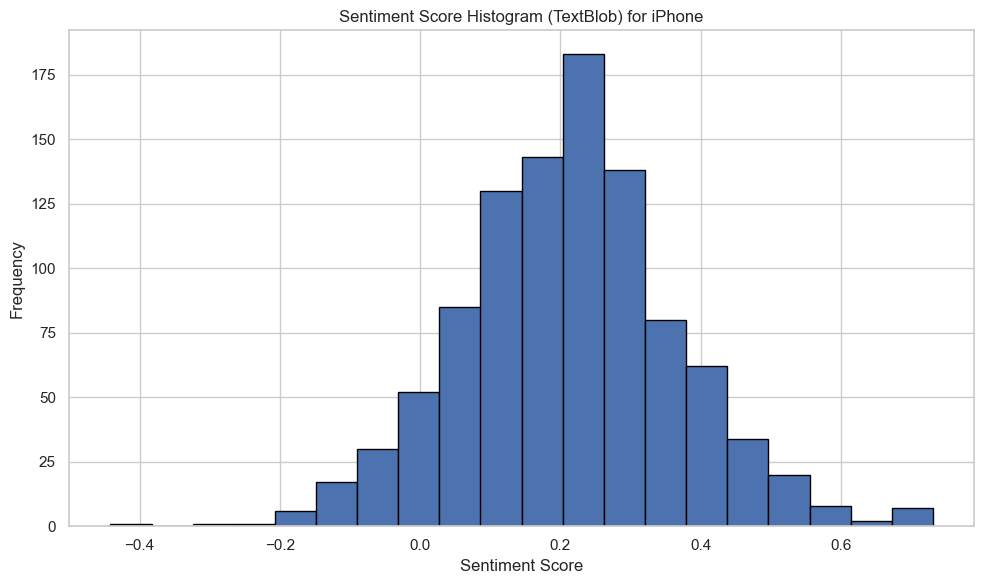

In [268]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [269]:
sorted_df = df_iphone.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I ordered excellent condition and my new iphone 14 pro is definitely in excellent condition. I never write reviews but I just had to with this one. I haven’t got any scratches or defects, I ran a hardware test and the phone works perfectly and the battery health is at 94% 😍 First time buying a refurbished phone and I am so happy! I might just continue to do this from now on!
---------------------------------------------------------------------------------------------------
1 Used them for over a year every day to charge my iPhone 13 Pro, They do a great job and are able to carry a good wattage to charge the device, there is not even a hint showing that the necks of the cables will start to bend or break because of the rubber reinforcing, however, the rubber cable wrap does rip after a while, not a deal breaker to me since I use reusable velcro straps for them!
---------------------------------------------------------------------------------------------------
2 Easy application of scr

In [270]:
sorted_df = df_iphone.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Battery life lasts less than 5hrs even from when you fully charge to when it dies itself even without playing any games on it dies in around 5 hours even if you play some low intensity games like subway surfers it dies at 3hrs worst battery life buy this if you want to charge your phone every hr
---------------------------------------------------------------------------------------------------
1 HoweverI have problems for the last few monthsWhen making calls,, the callers can hardly hear me, but it is that same where I cannot hear them.I am also experiencing difficulties when I touch the screen, and regularly have to keep tapping like 😡My Parkinson’s has procured very painful dexterity in my hands, and the end of my fingers are constantly painful I am hoping the seller will help to swap out for the replacement IPhone XR
---------------------------------------------------------------------------------------------------
2 I bought it to replace my ailing iPhone, the damn thing wouldn’t

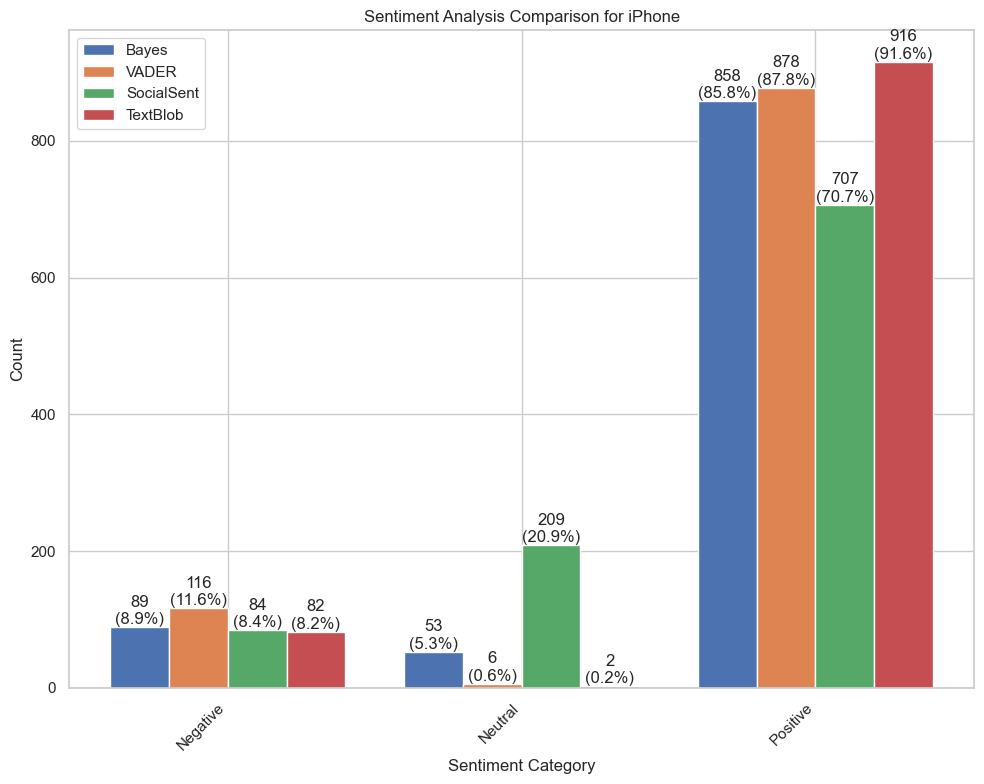

In [271]:
vader_counts = df_iphone['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_iphone['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_iphone['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_iphone['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPhone')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.2. Macbook***

In [272]:
# Apply sentiment analysis to calculate polarity
df_mac['SentimentScore_TextBlob'] = df_mac['Sentiment_Comment'].apply(analyze_sentiment)

df_mac['SentimentCategory_TextBlob'] = df_mac['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1325668551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_TextBlob'] = df_mac['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1325668551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_TextBlob'] = df_mac['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search  Product Price  \
2000  Macbook            139   
2001  Macbook            139   
2002  Macbook            139   
2003  Macbook           1249   
2004  Macbook              0   
...       ...            ...   
2995  Macbook            499   
2996  Macbook            599   
2997  Macbook            349   
2998  Macbook            293   
2999  Macbook            619   

                                                Comment  \
2000  I'm in my last semester (hopefully) of my unde...   
2001  To start, this Chromebook is the best one I ha...   
2002  Alright folks, I just bought my first chromebo...   
2003  I shall break this review into 2 categories - ...   
2004  Have you been putting off upgrading that Retin...   
...                                                 ...   
2995  really nice laptop, runs windows 11 and Adobe ...   
2996  I thought a refurbished MacBook won’t be as go...   
2997  Just got it today! Fast delivery! Used it for ...   
2998  Bought this MacBook pro for my son and he’s ov...   
2999  Fantastic item my daughter is over the moon wi...   

                                        Cleaned_Comment  \
2000  last smelter hopefully undergrad size year old...   
2001  start chromebook best one ever owned read revi...   
2002  alright folk bought first chromebook hour hour...   
2003  shall break review size category hardware soft...   
2004  putting upbraiding retina macbook pro reluctan...   
...                                                 ...   
2995  really nice laptop run window size done nicely...   
2996  thought refurbished macbook good considering c...   
2997  got today last delivery used day hardly felt l...   
2998  bought macbook pro son moon battery life amazi...   
2999  fantastic item daughter moon sent faulty item ...   

                                      Sentiment_Comment  Length Price_Segment  \
2000  I am in my last smelter ( hopefully ) of my un...    8448         Cheap   
2001  To start , this Chromebook is the best one I h...    7585         Cheap   
2002  Alright folks , I just bought my first chromeb...    6001         Cheap   
2003  I shall break this review into [ SIZE ] catego...    5538     Expensive   
2004  Have you been putting off upbraiding that Reti...    5022         Cheap   
...                                                 ...     ...           ...   
2995  really nice laptop , runs windows [ SIZE ] and...     203     Expensive   
2996  I thought a refurbished MacBook will not be as...     203     Expensive   
2997  Just got it today ! Last delivery ! Used it fo...     203         Cheap   
2998  Bought this MacBook pro for my son and he is o...     203         Cheap   
2999  Fantastic item my daughter is over the moon wi...     202     Expensive   

                                      Tokenized_Comment  Topic  \
2000  [last, smelter, hopefully, undergrad, size, ye...      3   
2001  [start, chromebook, best, one, ever, owned, re...      3   
2002  [alright, folk, bought, first, chromebook, hou...      3   
2003  [shall, break, review, size, category, hardwar...      3   
2004  [putting, upbraiding, retina, macbook, pro, re...      0   
...                                                 ...    ...   
2995  [really, nice, laptop, run, window, size, done...      1   
2996  [thought, refurbished, macbook, good, consider...      4   
2997  [got, today, last, delivery, used, day, hardly...      0   
2998  [bought, macbook, pro, son, moon, battery, lif...      1   
2999  [fantastic, item, daughter, moon, sent, faulty...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9993                Positive                Positive   
2001                0.9992                Positive                Positive   
2002                0.9995                Positive                Positive   
2003                0.9795                Positive                Positive   
2004                0.9995                Positi

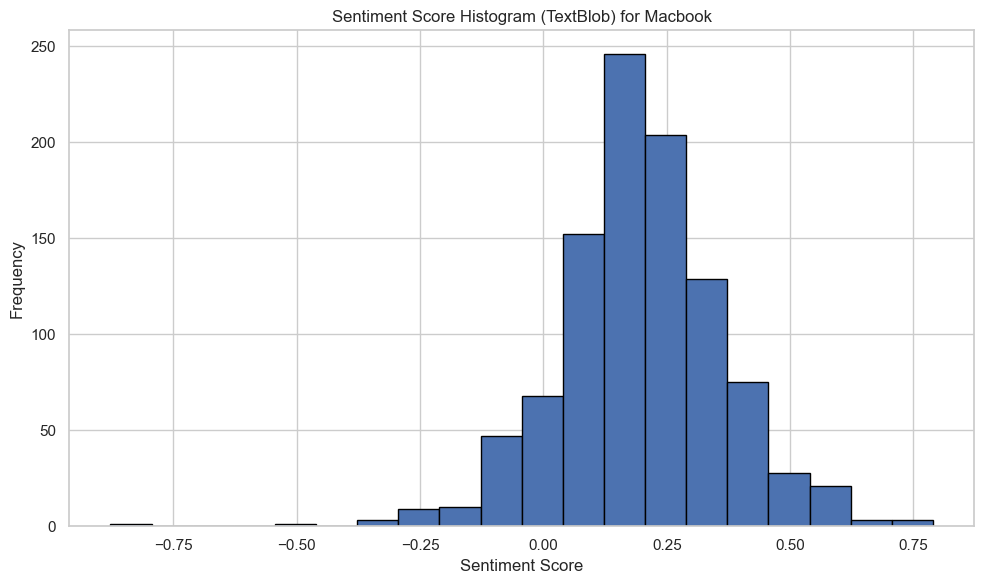

In [273]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [274]:
sorted_df = df_mac.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The mac came out perfect. State again. I was impressed with the conditions of the equipment. The fact that it has a touch bar is very good when using it. I advise you if you want a mac, buy it with the touch bar, you won't regret it.Incredible product. It looks new.
---------------------------------------------------------------------------------------------------
1 Arrived on time and well packaged, laptop was perfect out the box, no issues at all, no whine or screen bleed, fan is quite, runs starfield and cyperpunk on ultra with ease. Can't fault this device. Value for money and very easy to use.
---------------------------------------------------------------------------------------------------
2 We got this Macbook as a spare for the office. It is in excellent condition and works well. I have a brand new Macbook Pro, but keep using this one as I like the lightness and ease of use. Great purchase!..
-----------------------------------------------------------------------------------

In [275]:
sorted_df = df_mac.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Very unhappy with this Apple Mac. Battery doesn’t hold its charge won’t allow me to upgrade as told by sellers cannot get any apps because it won’t update to allow me to get them. Very Disappointed thought all upgrades should have been done before sending it out
---------------------------------------------------------------------------------------------------
1 The media could not be loaded. I sent an email and WhatsApp to the seller because I am having issues on setting the laptop. I am unable to get pass creating pin number. I am still waiting for a reply from them. It is so frustrating as I cannot use the laptop as yet
---------------------------------------------------------------------------------------------------
2 Really disappointed with refurbo uk , sent my refurbished Mac book pro back as I had a problem with the battery at a cost of £25 . Just got the laptop back and the problem still exists and is worse than before. So think before you buy a refurbished Mac bookHowever 

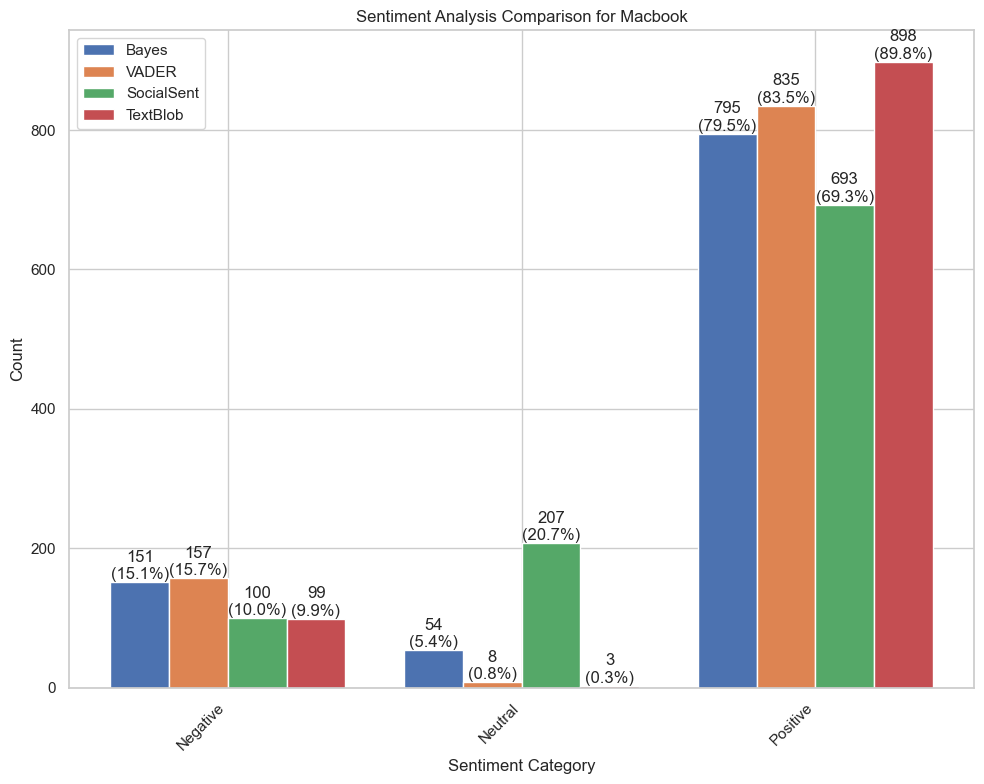

In [276]:
vader_counts = df_mac['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_mac['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_mac['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_mac['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Macbook')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.3. iPad***

In [278]:
# Apply sentiment analysis to calculate polarity
df_ipad['SentimentScore_TextBlob'] = df_ipad['Sentiment_Comment'].apply(analyze_sentiment)

df_ipad['SentimentCategory_TextBlob'] = df_ipad['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/4060305146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_TextBlob'] = df_ipad['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/4060305146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_TextBlob'] = df_ipad['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search  Product Price                                            Comment  \
3000   iPad             73  I bought this tablet when I retired and had mo...   
3001   iPad             89  I've been using this for a few weeks now and I...   
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3003   iPad            527  Over a year ago, I used the iPad 5th gen to co...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
...     ...            ...                                                ...   
3995   iPad            105  Two weeks usage and so far very impressed with...   
3996   iPad             19  Bought blue version for iPhone 15 supplied USB...   
3997   iPad             19  This is a very good quality product as my son ...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3999   iPad             16  The protector is nice and clear so doesn't dam...   

                                        Cleaned_Comment  \
3000  bought tablet retired time sit around reading ...   
3001  using week impressed fit ipad size pro magnifi...   
3002  introduction rvntop 20w usb c last larger bund...   
3003  year ago used ipad th gen control smart home a...   
3004  journey procase size back screen protector ipa...   
...                                                 ...   
3995  two week usage far impressed bundle tablet per...   
3996  bought blue version iphone size supplied usb c...   
3997  good quality product son started use pleasantl...   
3998  absolutely phenomenon alternative apple pen st...   
3999  protector nice clear damper ipad pro screen co...   

                                      Sentiment_Comment  Length Price_Segment  \
3000  I bought this tablet when I retired and had mo...    5271     Expensive   
3001  I have been using this for a few weeks now and...    4876     Expensive   
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap   
3003  Over a year ago , I used the iPad th gen to co...    3774     Expensive   
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap   
...                                                 ...     ...           ...   
3995  Two weeks usage and so far very impressed with...     291     Expensive   
3996  Bought blue version for iPhone [ SIZE ] suppli...     291         Cheap   
3997  This is a very good quality product as my son ...     291         Cheap   
3998  Absolutely phenomena alternative to an apple p...     290         Cheap   
3999  The protector is nice and clear so does not da...     290         Cheap   

                                      Tokenized_Comment  Topic  \
3000  [bought, tablet, retired, time, sit, around, r...      0   
3001  [using, week, impressed, fit, ipad, size, pro,...      0   
3002  [introduction, rvntop, 20w, usb, c, last, larg...      4   
3003  [year, ago, used, ipad, th, gen, control, smar...      4   
3004  [journey, procase, size, back, screen, protect...      2   
...                                                 ...    ...   
3995  [two, week, usage, far, impressed, bundle, tab...      0   
3996  [bought, blue, version, iphone, size, supplied...      0   
3997  [good, quality, product, son, started, use, pl...      3   
3998  [absolutely, phenomenon, alternative, apple, p...      0   
3999  [protector, nice, clear, damper, ipad, pro, sc...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9993                Positive                Positive   
3001                0.9925                Positive                Positive   
3002               -0.6743                Negative                Positive   
3003                0.9985                Positive                Positive   
3004               -0.9934                Negative                Positive   
...                    ...                     ...                     ...   
3995       

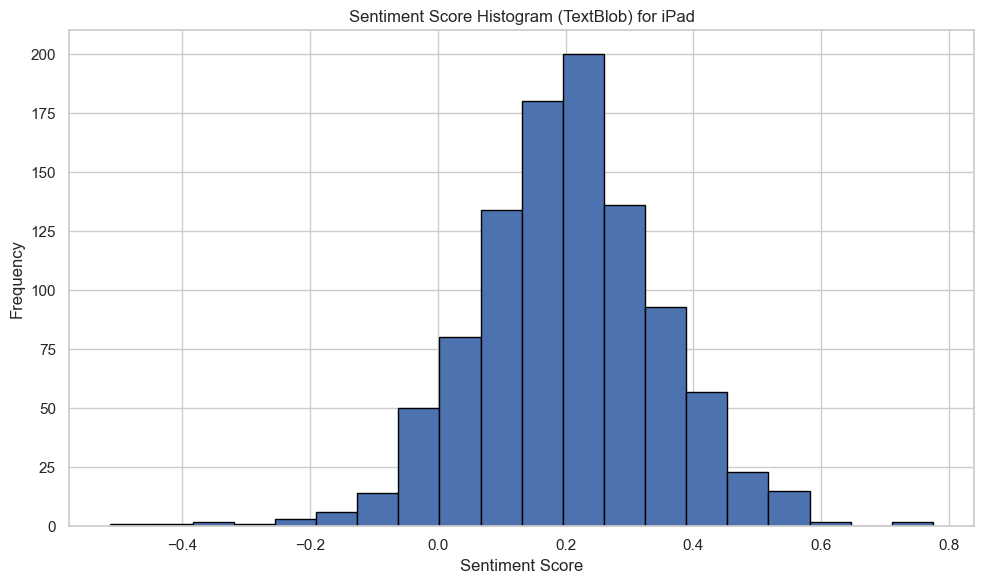

In [279]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [280]:
sorted_df = df_ipad.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Got this case after looking for a good, protective case for my iPad that doesn’t hinder the drawing experience for uni. The fact that the case is separate to the cover is brilliant for this and the vertical use is so good for FaceTime - makes up for Apple putting the front camera on the side!! Love the case and hopefully it’ll stand the test of time too
---------------------------------------------------------------------------------------------------
1 It is a plus that the keyboard has both Apple and PC notation on the Ctrl /Win / Cmd keys and that these can be re-programmed.The case is functional rather than luxurious. It is fairly plasticky in look and feel - but serves the purpose of protecting the iPad and holding the pencil/stylus.At £21 at time of review, this is good value and would (for instance) be ideal to protect the kids' iPads if used at school/college, whilst giving keyboard functionality
--------------------------------------------------------------------------------

In [281]:
sorted_df = df_ipad.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 It was a absolutely shocking Absolutely shocking, been waiting for a refund for long enough and you plug it in it will charge to 100% take it off charge and it will die and then need plugging in immediately after unplugging would not recommend anyone using this guy or company as I am waiting for a £289 refund and have been for 2 weeks
---------------------------------------------------------------------------------------------------
1 This was so disgusting wasn’t charged or had a plug and it’s already had Apple ID pass word and was all scratched all round I bought this for my son birthday and I was so gutted how they sent it out to me and still haven’t payed my money in to my account and I even sent it back and payed posted and package as well
---------------------------------------------------------------------------------------------------
2 Comments:I bought this stand for my daughter’s birthday. It is out of the warranty but only opened today to find the stand is broken and noth

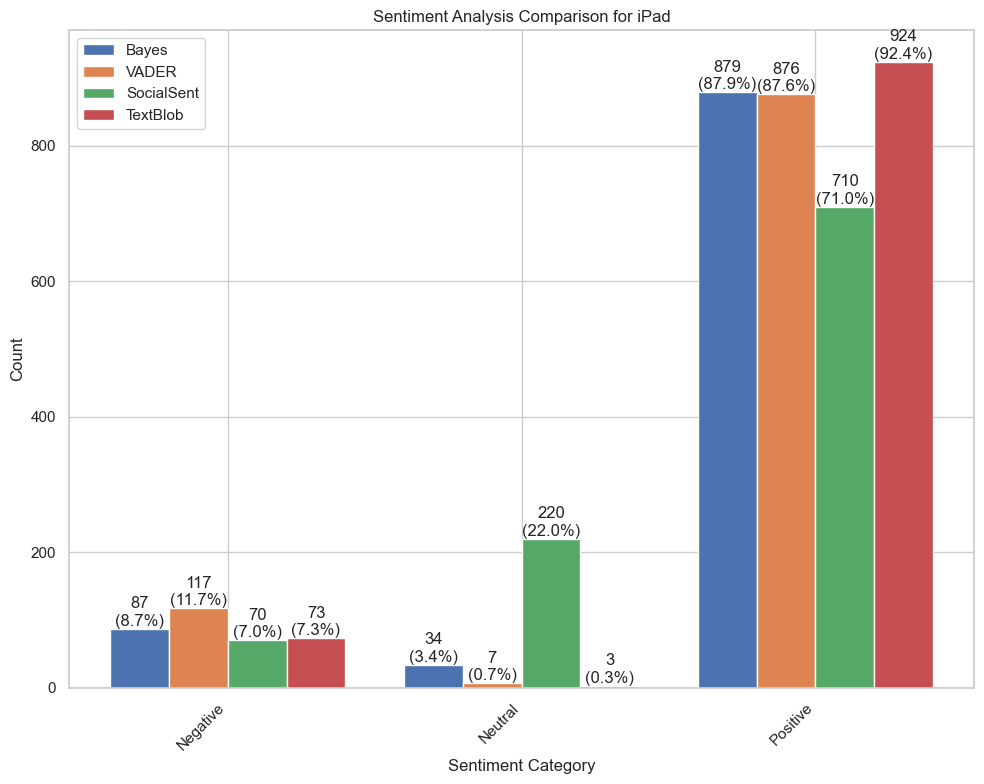

In [282]:
vader_counts = df_ipad['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_ipad['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_ipad['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_ipad['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPad')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.4. AirPods***

In [283]:
# Apply sentiment analysis to calculate polarity
df_airpods['SentimentScore_TextBlob'] = df_airpods['Sentiment_Comment'].apply(analyze_sentiment)

df_airpods['SentimentCategory_TextBlob'] = df_airpods['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/927618517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_TextBlob'] = df_airpods['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/927618517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_TextBlob'] = df_airpods['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search  Product Price  \
0    AirPods             59   
1    AirPods             99   
2    AirPods             99   
3    AirPods            209   
4    AirPods            120   
..       ...            ...   
995  AirPods             79   
996  AirPods             15   
997  AirPods            479   
998  AirPods             19   
999  AirPods             15   

                                               Comment  \
0    The Philips T8505 Active Noise Cancelling True...   
1    TL;DR - a stunning set of wireless headphones ...   
2    I bought these in May 2021 and a few other wir...   
3    FURTHER UPDATE, FEB 2021I have experienced pai...   
4    Firstly, let me apologise for the long read bu...   
..                                                 ...   
995  The Galaxy Buds are great!The black colour loo...   
996  Am not into buying expensive earphones as it's...   
997  Good sounding and very comfortable wireless he...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   
999  Delivery & Packaging - the airpods were delive...   

                                       Cleaned_Comment  \
0    philip t8505 active noise panelling true wirel...   
1    stunning set wireless headphone prompted write...   
2    bought may size wireless airpods time specific...   
3    update feb 2021i experienced paring issue size...   
4    firstly let apologise long read really wanted ...   
..                                                 ...   
995  galaxy bud great black colour look sleek actua...   
996  buying expensive earphone easy lose damage sou...   
997  good sounding comfortable wireless headphone w...   
998  sunday size january size size size gmt cab bud...   
999  delivery packaging airpods delivered next day ...   

                                     Sentiment_Comment  Length Price_Segment  \
0    The Philip T8505 Active Noise Panelling True W...   13149     Expensive   
1    of ; of - a stunning set of wireless headphone...   10252     Expensive   
2    I bought these in May [ SIZE ] and a few other...    9998     Expensive   
3    FURTHER UPDATE , FEB 2021I have experienced pa...    9081     Expensive   
4    Firstly , let me apologise for the long read b...    8087     Expensive   
..                                                 ...     ...           ...   
995  The Galaxy Buds are great ! The black colour l...    1406     Expensive   
996  Am not into buying expensive earphones as it i...    1404         Cheap   
997  Good sounding and very comfortable wireless he...    1404     Expensive   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap   
999  Delivery & Packaging - the airpods were delive...    1400         Cheap   

                                     Tokenized_Comment  Topic  \
0    [philip, t8505, active, noise, panelling, true...      4   
1    [stunning, set, wireless, headphone, prompted,...      1   
2    [bought, may, size, wireless, airpods, time, s...      1   
3    [update, feb, 2021i, experienced, paring, issu...      2   
4    [firstly, let, apologise, long, read, really, ...      1   
..                                                 ...    ...   
995  [galaxy, bud, great, black, colour, look, slee...      1   
996  [buying, expensive, earphone, easy, lose, dama...      1   
997  [good, sounding, comfortable, wireless, headph...      1   
998  [sunday, size, january, size, size, size, gmt,...      1   
999  [delivery, packaging, airpods, delivered, next...      1   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  1.0000                Positive                Positive   
1                  0.9994                Positive                Positive   
2                  0.9996                Positive                Positive   
3                  0.9995                Positive                Positive   
4                  0.9998                Positive                Positive   
..                    ...          

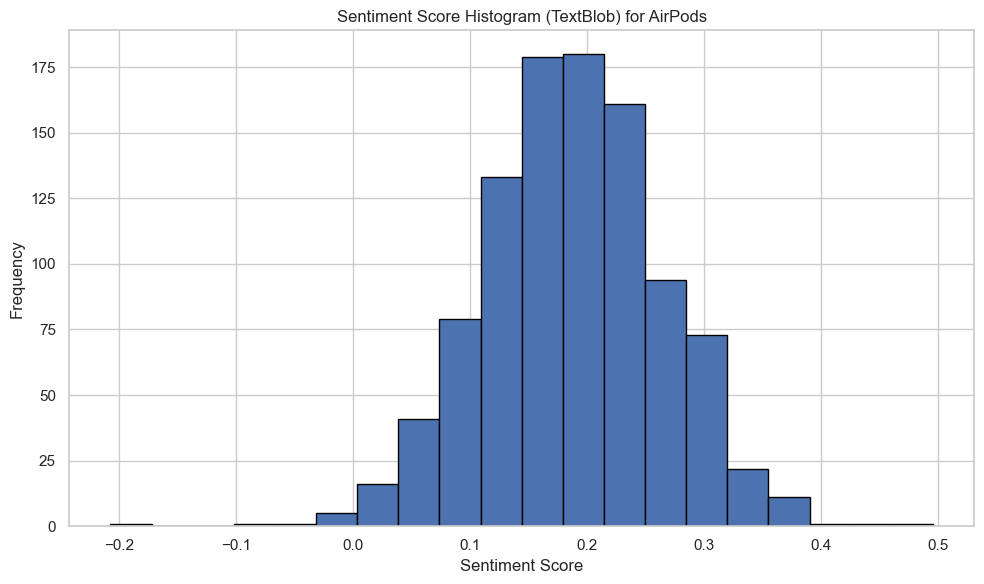

In [284]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [285]:
sorted_df = df_airpods.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Pros:- Excellent premium headset👍- - very comfortable to wear and fits just perfect 🎧over the ears and it feels just great, very happy on that end👏- Packaging is well maintained and very neat📦- - Sound Quality very good (very good ANC), works perfectly fine, great sound and music👍🎶- Thickness is also good, no problem with that- - Built quality is very good-10hrs plus music playtime (impressive spec👍)-- Pricing is very good at £129.99 for what you're getting 💸- White is my favourite colour, great colour of choiceCons:- Ears become really warm overtime (4+ hours) and feels less comfortable after, had that experience but can be subjective (as I have sensitive ears👂)- -Microphone quality is medicore- - Doesn't have ip rating, not waterproofOverall, these headphones are really good in terms of sound quality and built quality. Used it a lot for hitting the gym and working outside or jogging out in the park, very stable and resistant to my sweat, great results. Active noice cancellation wor

In [286]:
sorted_df = df_airpods.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Sunday, 15 January 2023, at 21:58 [GMT]JLab 'JBuds Pro Wireless Signature airpods Bluetooth'Order Date: Mon, 28 Feb 2022 / Delivery Date: Wed, 02 Mar 2022 / 1st of 2 sets of earphones (colour: black) received circa 10 months ago on Wednesday, 02 March 2022, is faulty, is not working (totally) after circa 2 months of use (only circa 2 hours daily) /Order Date: Sat, 14 Jan 2023 / Delivery Date: Sun, 15 Jan 2023 / 2nd of 2 sets of earphones (colour: white) received circa 4 hours ago on today Sunday, 15 January 2023, is not faulty (yet!), but is not working (partially) after circa 4 hours of use.Referring to the product manual, reveived with the product device. Several (circa 9) "BUTTON FUNCTIONS" are not working.Button (#1): the "POWER ON" / "POWER OFF" button is not working.Button (#2): the "VOLUME DOWN" / "TRACK BACKWARD" button is not working.Button (#3): the "VOLUME UP" / "TRACK FORWARD" button is not working.The 3 (three) buttons are broken inside the device, because there is no cl

In [287]:
vader_counts = df_airpods['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_airpods['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_airpods['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_airpods['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for AirPods')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.5. Apple Watch***

In [289]:
# Apply sentiment analysis to calculate polarity
df_watch['SentimentScore_TextBlob'] = df_watch['Sentiment_Comment'].apply(analyze_sentiment)

df_watch['SentimentCategory_TextBlob'] = df_watch['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3017537030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_TextBlob'] = df_watch['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3017537030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_TextBlob'] = df_watch['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search  Product Price  \
1000  Apple Watch            399   
1001  Apple Watch            369   
1002  Apple Watch             71   
1003  Apple Watch             44   
1004  Apple Watch             29   
...           ...            ...   
1995  Apple Watch             18   
1996  Apple Watch              6   
1997  Apple Watch             21   
1998  Apple Watch             14   
1999  Apple Watch              0   

                                                Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                        Cleaned_Comment  \
1000  often upgrade smart device upgrade iphone ever...   
1001  apple watch series size latest operation apple...   
1002  wish read review purchased many review spot bo...   
1003  say watch good reasonably price useful feature...   
1004  charging station one favorite recent purchase ...   
...                                                 ...   
1995  k price one received mark strap doesnot come g...   
1996  comfortable replacement old tired original app...   
1997  strap great look feel like apple strap well wo...   
1998  good value moneycolour true advertised colourl...   
1999  love product colour combination outfit fabulou...   

                                      Sentiment_Comment  Length Price_Segment  \
1000  How often do you upgrade your smart devices ? ...    8134     Expensive   
1001  The Apple Watch Series [ SIZE ] is the latest ...    5039     Expensive   
1002  I wish I had read these reviews before I purch...    3873     Expensive   
1003  I have to say this watch is good , and reasona...    3539     Expensive   
1004  This charging station is one of my favorite re...    3339     Expensive   
...                                                 ...     ...           ...   
1995  K for the price . The one i received has a mar...     111     Expensive   
1996  Very comfortable replacement for an old tired ...     111         Cheap   
1997  These straps are great they look and feel just...     111     Expensive   
1998  Very good value for moneyColour true to advert...     111         Cheap   
1999  Love this product - colour combinations with m...     110         Cheap   

                                      Tokenized_Comment  Topic  \
1000  [often, upgrade, smart, device, upgrade, iphon...      3   
1001  [apple, watch, series, size, latest, operation...      3   
1002  [wish, read, review, purchased, many, review, ...      0   
1003  [say, watch, good, reasonably, price, useful, ...      3   
1004  [charging, station, one, favorite, recent, pur...      4   
...                                                 ...    ...   
1995  [k, price, one, received, mark, strap, doesnot...      3   
1996  [comfortable, replacement, old, tired, origina...      2   
1997  [strap, great, look, feel, like, apple, strap,...      2   
1998  [good, value, moneycolour, true, advertised, c...      1   
1999  [love, product, colour, combination, outfit, f...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9995                Positive                Positive   
1001                0.9971                Positive                Positive   
1002               -0.3640                Negative                Positive   
1003                0.9954                Positive                Positive   
1004

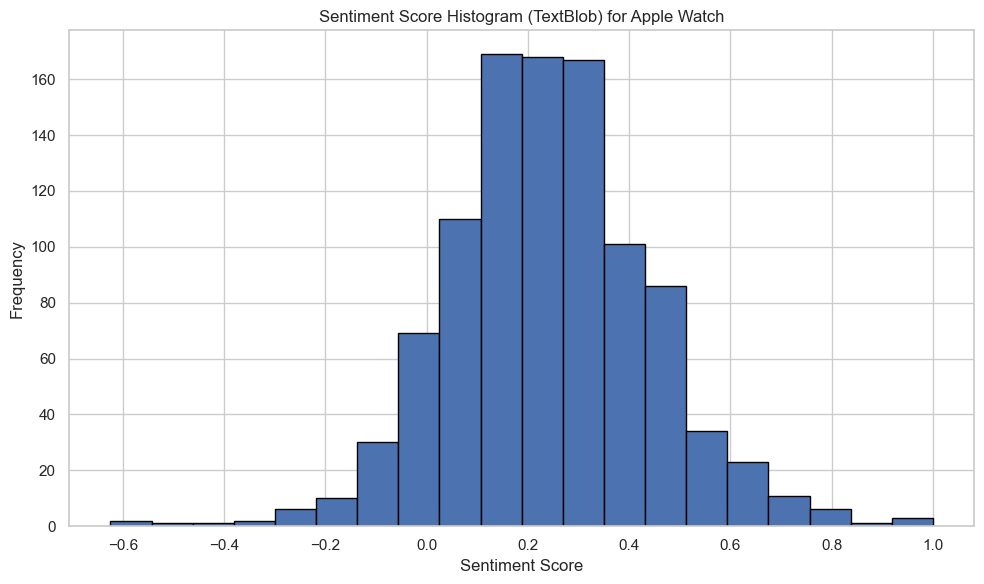

In [290]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [291]:
sorted_df = df_watch.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I have just bought a iPad Pro & I have a Apple Watch ultra & the satechi quatro means I can charge two at once plus my iPhone wireless so vey happy with product.
---------------------------------------------------------------------------------------------------
1 Was a birthday gift for an avid Star Wars fan. Was very happy with the selected Mandalorian bands with both sizes included.
---------------------------------------------------------------------------------------------------
2 Very happy with my Apple 6 watch. Was in perfect condition, not a scratch on it considering it was a refurb watch. Would but again
---------------------------------------------------------------------------------------------------
3 My partner needed an extension for laptop web cam to take tests for online school, this worked brilliantly. Connectivity, length and quality of product are great.
---------------------------------------------------------------------------------------------------
4 Great stan

In [292]:
sorted_df = df_watch.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The media could not be loaded. Bad quality !DisappointedOnly used for 3 months ( not wearing every day)😞and the leather broken as photo attached !!
---------------------------------------------------------------------------------------------------
1 I threw this in the bin within 24 hours. The silicone is hard and not flexible and marks appeared on it that could not be removed with anything!!Waste of money!
---------------------------------------------------------------------------------------------------
2 Nice band that is breathable. Unfortunately the box did not have a QR code for me to use to download my watch faces. 🤷🏻‍♂️
---------------------------------------------------------------------------------------------------
3 Found this strap to be a bit of a nightmare as it restricted my wrist movements every time I bent my wrist it set off the siren on my I watch ultra bit of a nuisance so went back to the wrist band it also kept pulling on the hairs on my arm very annoying!
----

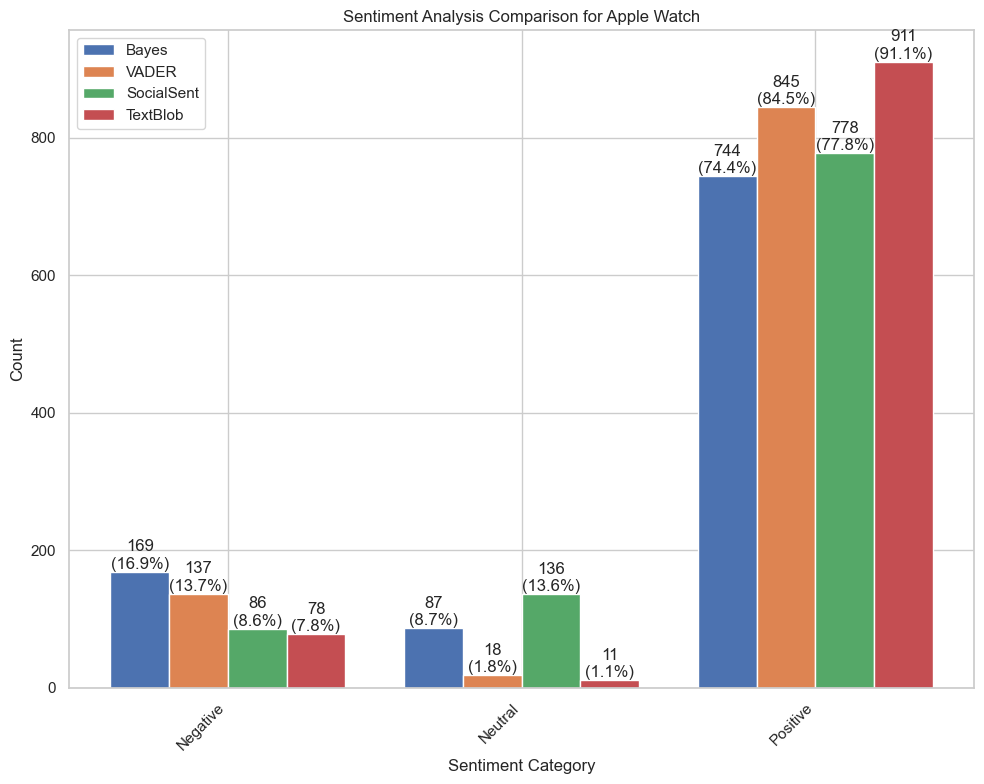

In [293]:
vader_counts = df_watch['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_watch['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_watch['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_watch['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Apple Watch')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


**29. Emotion analysis**

***29.1. iPhone***

In [299]:
from LeXmo import LeXmo

def calculate_emotion(text):
    emo = LeXmo.LeXmo(text)
    emo.pop('text')
    emo.pop('negative')
    emo.pop('positive')
    max_value = max(emo.values())
    max_keys = [key for key, value in emo.items() if value == max_value]
    return " ".join(max_keys)

df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1492879640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)


Search  Product Price  \
4000  iPhone           1038   
4001  iPhone           1689   
4002  iPhone            259   
4003  iPhone            953   
4004  iPhone            599   
...      ...            ...   
4995  iPhone             25   
4996  iPhone             11   
4997  iPhone            380   
4998  iPhone            247   
4999  iPhone            134   

                                                Comment  \
4000  This will be a long and detailed review. I am ...   
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...   
4002  I have been waiting for Umidigi to release an ...   
4003  I've been a long-time user of Android and I'm ...   
4004  Before we start, apologies for the long review...   
...                                                 ...   
4995  Just bought this MagSafe hybrid case with stan...   
4996  Brilliant product and quite sturdy and a barga...   
4997  The description says “Like New”. The appearanc...   
4998  I bought this iPhone 11 as a reconditioned 'ex...   
4999  Most things about this purchase were great, th...   

                                        Cleaned_Comment  \
4000  long detailed review writing guide resistant w...   
4001  nachdem ich ein iphone size pro max von merest...   
4002  waiting umidigi release unlocked phone global ...   
4003  long time user android also tech enthusiast us...   
4004  start apology long review hope useful submissi...   
...                                                 ...   
4995  bought magsafe horrid case stand armorite scre...   
4996  brilliant product quite sturdy bargain come ca...   
4997  description say like new ” appearance like new...   
4998  bought iphone size unconditioned excellent con...   
4999  thing purchase great one little flaw phone sti...   

                                      Sentiment_Comment  Length Price_Segment  \
4000  This will be a long and detailed review . I am...   10441     Expensive   
4001  Nachdem ich ein iPhone [ SIZE ] Pro Max von Me...    8841     Expensive   
4002  I have been waiting for Umidigi to release an ...    7158     Expensive   
4003  I have been a long - time user of Android and ...    4335     Expensive   
4004  Before we start , apologies for the long revie...    4220     Expensive   
...                                                 ...     ...           ...   
4995  Just bought this MagSafe horrid case with stan...     280         Cheap   
4996  Brilliant product and quite sturdy and a barga...     280         Cheap   
4997  The description says “ Like New ” . The appear...     280     Expensive   
4998  I bought this iPhone [ SIZE ] as a uncondition...     279     Expensive   
4999  Most things about this purchase were great , t...     279     Expensive   

                                      Tokenized_Comment  Topic  \
4000  [long, detailed, review, writing, guide, resis...      0   
4001  [nachdem, ich, ein, iphone, size, pro, max, vo...      1   
4002  [waiting, umidigi, release, unlocked, phone, g...      0   
4003  [long, time, user, android, also, tech, enthus...      0   
4004  [start, apology, long, review, hope, useful, s...      4   
...                                                 ...    ...   
4995  [bought, magsafe, horrid, case, stand, armorit...      4   
4996  [brilliant, product, quite, sturdy, bargain, c...      4   
4997  [description, say, like, new, ”, appearance, l...      2   
4998  [bought, iphone, size, unconditioned, excellen...      3   
4999  [thing, purchase, great, one, little, flaw, ph...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9996                Positive                Positive   
4001               -0.9991                Negative                Positive   
4002                0.9991                Positive                Positive   
4003                0.9983                Positive                Positive   
4004                0.9993                Positive         

In [300]:
df_iphone[['Comment','Emotion']]

Comment             Emotion
4000  This will be a long and detailed review. I am ...               trust
4001  Nachdem ich ein iPhone 12 Pro Max von Herbst 2...                fear
4002  I have been waiting for Umidigi to release an ...        anticipation
4003  I've been a long-time user of Android and I'm ...        anticipation
4004  Before we start, apologies for the long review...        anticipation
...                                                 ...                 ...
4995  Just bought this MagSafe hybrid case with stan...               trust
4996  Brilliant product and quite sturdy and a barga...               trust
4997  The description says “Like New”. The appearanc...  anticipation trust
4998  I bought this iPhone 11 as a reconditioned 'ex...        anticipation
4999  Most things about this purchase were great, th...       sadness trust

[1000 rows x 2 columns]

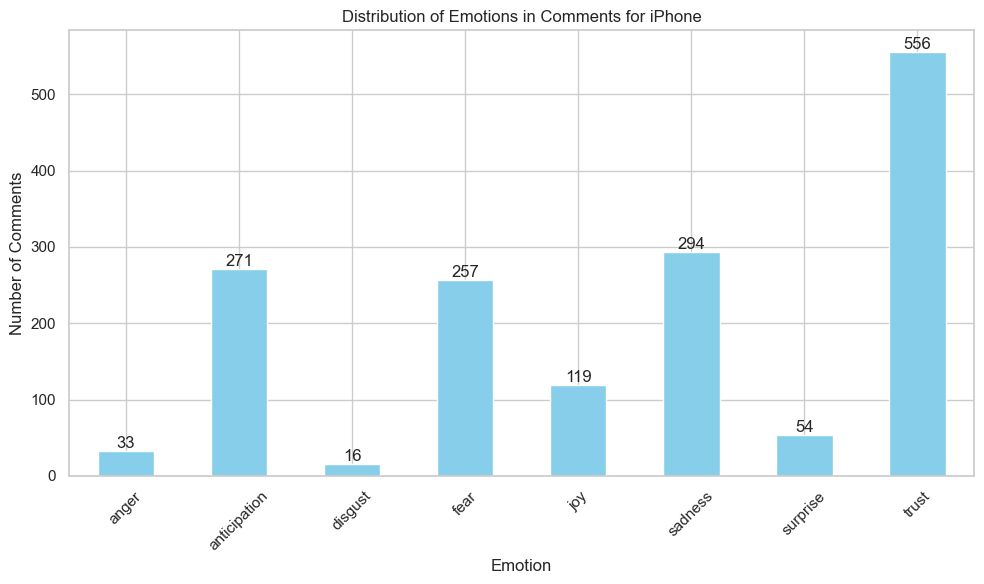

In [301]:
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_iphone.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPhone')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***29.2. Macbook***

In [302]:
df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/1581698278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)


Search  Product Price  \
2000  Macbook            139   
2001  Macbook            139   
2002  Macbook            139   
2003  Macbook           1249   
2004  Macbook              0   
...       ...            ...   
2995  Macbook            499   
2996  Macbook            599   
2997  Macbook            349   
2998  Macbook            293   
2999  Macbook            619   

                                                Comment  \
2000  I'm in my last semester (hopefully) of my unde...   
2001  To start, this Chromebook is the best one I ha...   
2002  Alright folks, I just bought my first chromebo...   
2003  I shall break this review into 2 categories - ...   
2004  Have you been putting off upgrading that Retin...   
...                                                 ...   
2995  really nice laptop, runs windows 11 and Adobe ...   
2996  I thought a refurbished MacBook won’t be as go...   
2997  Just got it today! Fast delivery! Used it for ...   
2998  Bought this MacBook pro for my son and he’s ov...   
2999  Fantastic item my daughter is over the moon wi...   

                                        Cleaned_Comment  \
2000  last smelter hopefully undergrad size year old...   
2001  start chromebook best one ever owned read revi...   
2002  alright folk bought first chromebook hour hour...   
2003  shall break review size category hardware soft...   
2004  putting upbraiding retina macbook pro reluctan...   
...                                                 ...   
2995  really nice laptop run window size done nicely...   
2996  thought refurbished macbook good considering c...   
2997  got today last delivery used day hardly felt l...   
2998  bought macbook pro son moon battery life amazi...   
2999  fantastic item daughter moon sent faulty item ...   

                                      Sentiment_Comment  Length Price_Segment  \
2000  I am in my last smelter ( hopefully ) of my un...    8448         Cheap   
2001  To start , this Chromebook is the best one I h...    7585         Cheap   
2002  Alright folks , I just bought my first chromeb...    6001         Cheap   
2003  I shall break this review into [ SIZE ] catego...    5538     Expensive   
2004  Have you been putting off upbraiding that Reti...    5022         Cheap   
...                                                 ...     ...           ...   
2995  really nice laptop , runs windows [ SIZE ] and...     203     Expensive   
2996  I thought a refurbished MacBook will not be as...     203     Expensive   
2997  Just got it today ! Last delivery ! Used it fo...     203         Cheap   
2998  Bought this MacBook pro for my son and he is o...     203         Cheap   
2999  Fantastic item my daughter is over the moon wi...     202     Expensive   

                                      Tokenized_Comment  Topic  \
2000  [last, smelter, hopefully, undergrad, size, ye...      3   
2001  [start, chromebook, best, one, ever, owned, re...      3   
2002  [alright, folk, bought, first, chromebook, hou...      3   
2003  [shall, break, review, size, category, hardwar...      3   
2004  [putting, upbraiding, retina, macbook, pro, re...      0   
...                                                 ...    ...   
2995  [really, nice, laptop, run, window, size, done...      1   
2996  [thought, refurbished, macbook, good, consider...      4   
2997  [got, today, last, delivery, used, day, hardly...      0   
2998  [bought, macbook, pro, son, moon, battery, lif...      1   
2999  [fantastic, item, daughter, moon, sent, faulty...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9993                Positive                Positive   
2001                0.9992                Positive                Positive   
2002                0.9995                Positive                Positive   
2003                0.9795                Positive                Positive   
2004                0.9995                Positi

In [303]:
df_mac[['Comment','Emotion']]

Comment             Emotion
2000  I'm in my last semester (hopefully) of my unde...               trust
2001  To start, this Chromebook is the best one I ha...        anticipation
2002  Alright folks, I just bought my first chromebo...               trust
2003  I shall break this review into 2 categories - ...        anticipation
2004  Have you been putting off upgrading that Retin...               trust
...                                                 ...                 ...
2995  really nice laptop, runs windows 11 and Adobe ...        anticipation
2996  I thought a refurbished MacBook won’t be as go...  anticipation trust
2997  Just got it today! Fast delivery! Used it for ...       sadness trust
2998  Bought this MacBook pro for my son and he’s ov...       disgust trust
2999  Fantastic item my daughter is over the moon wi...    anticipation joy

[1000 rows x 2 columns]

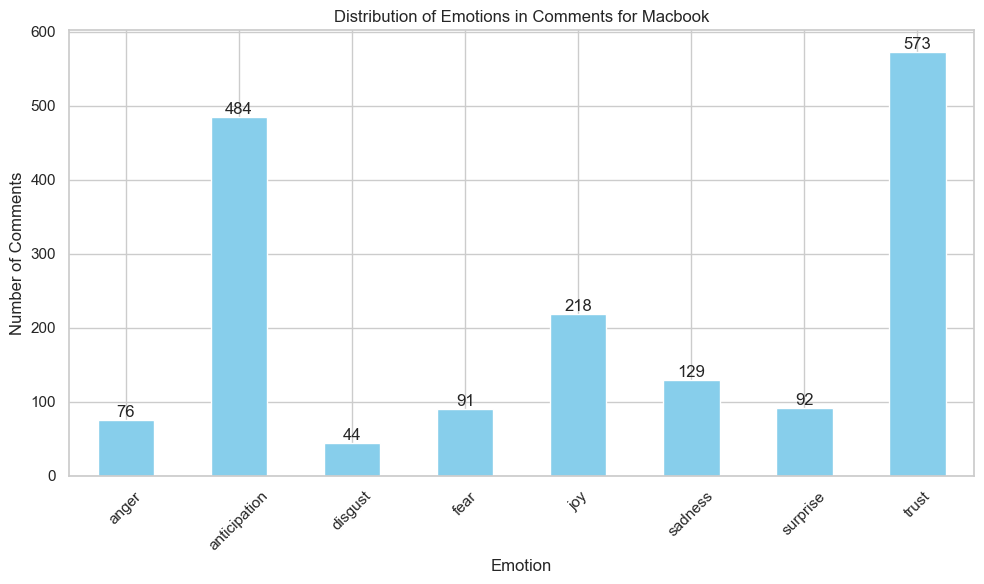

In [304]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_mac.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Macbook')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.3. iPad***

In [305]:
df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/3321922518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)


Search  Product Price                                            Comment  \
3000   iPad             73  I bought this tablet when I retired and had mo...   
3001   iPad             89  I've been using this for a few weeks now and I...   
3002   iPad             11  Introduction:The Rvntop 20W USB C Fast Charger...   
3003   iPad            527  Over a year ago, I used the iPad 5th gen to co...   
3004   iPad              7  My journey with the ProCase 2 Pack Screen Prot...   
...     ...            ...                                                ...   
3995   iPad            105  Two weeks usage and so far very impressed with...   
3996   iPad             19  Bought blue version for iPhone 15 supplied USB...   
3997   iPad             19  This is a very good quality product as my son ...   
3998   iPad             15  Absolutely phenomenal alternative to an apple ...   
3999   iPad             16  The protector is nice and clear so doesn't dam...   

                                        Cleaned_Comment  \
3000  bought tablet retired time sit around reading ...   
3001  using week impressed fit ipad size pro magnifi...   
3002  introduction rvntop 20w usb c last larger bund...   
3003  year ago used ipad th gen control smart home a...   
3004  journey procase size back screen protector ipa...   
...                                                 ...   
3995  two week usage far impressed bundle tablet per...   
3996  bought blue version iphone size supplied usb c...   
3997  good quality product son started use pleasantl...   
3998  absolutely phenomenon alternative apple pen st...   
3999  protector nice clear damper ipad pro screen co...   

                                      Sentiment_Comment  Length Price_Segment  \
3000  I bought this tablet when I retired and had mo...    5271     Expensive   
3001  I have been using this for a few weeks now and...    4876     Expensive   
3002  Introduction : The Rvntop 20W USB C Last Large...    3935         Cheap   
3003  Over a year ago , I used the iPad th gen to co...    3774     Expensive   
3004  My journey with the ProCase [ SIZE ] Back Scre...    3682         Cheap   
...                                                 ...     ...           ...   
3995  Two weeks usage and so far very impressed with...     291     Expensive   
3996  Bought blue version for iPhone [ SIZE ] suppli...     291         Cheap   
3997  This is a very good quality product as my son ...     291         Cheap   
3998  Absolutely phenomena alternative to an apple p...     290         Cheap   
3999  The protector is nice and clear so does not da...     290         Cheap   

                                      Tokenized_Comment  Topic  \
3000  [bought, tablet, retired, time, sit, around, r...      0   
3001  [using, week, impressed, fit, ipad, size, pro,...      0   
3002  [introduction, rvntop, 20w, usb, c, last, larg...      4   
3003  [year, ago, used, ipad, th, gen, control, smar...      4   
3004  [journey, procase, size, back, screen, protect...      2   
...                                                 ...    ...   
3995  [two, week, usage, far, impressed, bundle, tab...      0   
3996  [bought, blue, version, iphone, size, supplied...      0   
3997  [good, quality, product, son, started, use, pl...      3   
3998  [absolutely, phenomenon, alternative, apple, p...      0   
3999  [protector, nice, clear, damper, ipad, pro, sc...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9993                Positive                Positive   
3001                0.9925                Positive                Positive   
3002               -0.6743                Negative                Positive   
3003                0.9985                Positive                Positive   
3004               -0.9934                Negative                Positive   
...                    ...                     ...                     ...   
3995       

In [306]:
df_ipad[['Comment','Emotion']]

Comment  \
3000  I bought this tablet when I retired and had mo...   
3001  I've been using this for a few weeks now and I...   
3002  Introduction:The Rvntop 20W USB C Fast Charger...   
3003  Over a year ago, I used the iPad 5th gen to co...   
3004  My journey with the ProCase 2 Pack Screen Prot...   
...                                                 ...   
3995  Two weeks usage and so far very impressed with...   
3996  Bought blue version for iPhone 15 supplied USB...   
3997  This is a very good quality product as my son ...   
3998  Absolutely phenomenal alternative to an apple ...   
3999  The protector is nice and clear so doesn't dam...   

                        Emotion  
3000                      trust  
3001              sadness trust  
3002                      trust  
3003               anticipation  
3004                      trust  
...                         ...  
3995  anticipation joy surprise  
3996                      trust  
3997         anticipation trust  
3998                      anger  
3999                      trust  

[1000 rows x 2 columns]

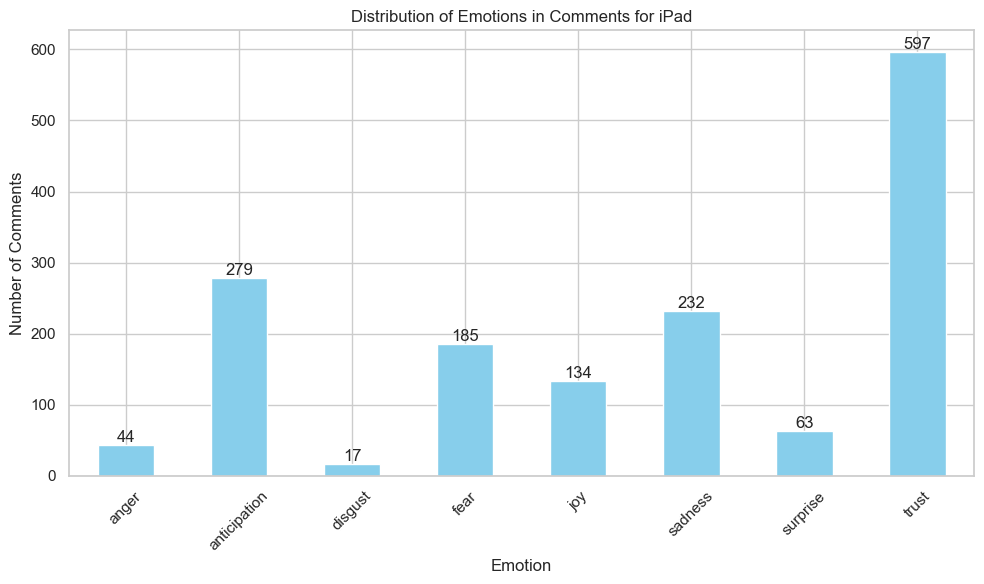

In [307]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_ipad.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPad')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.4. AirPods***

In [308]:
df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/2632544429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)


Search  Product Price  \
0    AirPods             59   
1    AirPods             99   
2    AirPods             99   
3    AirPods            209   
4    AirPods            120   
..       ...            ...   
995  AirPods             79   
996  AirPods             15   
997  AirPods            479   
998  AirPods             19   
999  AirPods             15   

                                               Comment  \
0    The Philips T8505 Active Noise Cancelling True...   
1    TL;DR - a stunning set of wireless headphones ...   
2    I bought these in May 2021 and a few other wir...   
3    FURTHER UPDATE, FEB 2021I have experienced pai...   
4    Firstly, let me apologise for the long read bu...   
..                                                 ...   
995  The Galaxy Buds are great!The black colour loo...   
996  Am not into buying expensive earphones as it's...   
997  Good sounding and very comfortable wireless he...   
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...   
999  Delivery & Packaging - the airpods were delive...   

                                       Cleaned_Comment  \
0    philip t8505 active noise panelling true wirel...   
1    stunning set wireless headphone prompted write...   
2    bought may size wireless airpods time specific...   
3    update feb 2021i experienced paring issue size...   
4    firstly let apologise long read really wanted ...   
..                                                 ...   
995  galaxy bud great black colour look sleek actua...   
996  buying expensive earphone easy lose damage sou...   
997  good sounding comfortable wireless headphone w...   
998  sunday size january size size size gmt cab bud...   
999  delivery packaging airpods delivered next day ...   

                                     Sentiment_Comment  Length Price_Segment  \
0    The Philip T8505 Active Noise Panelling True W...   13149     Expensive   
1    of ; of - a stunning set of wireless headphone...   10252     Expensive   
2    I bought these in May [ SIZE ] and a few other...    9998     Expensive   
3    FURTHER UPDATE , FEB 2021I have experienced pa...    9081     Expensive   
4    Firstly , let me apologise for the long read b...    8087     Expensive   
..                                                 ...     ...           ...   
995  The Galaxy Buds are great ! The black colour l...    1406     Expensive   
996  Am not into buying expensive earphones as it i...    1404         Cheap   
997  Good sounding and very comfortable wireless he...    1404     Expensive   
998  Sunday , [ SIZE ] January [ SIZE ] , at [ SIZE...    1404         Cheap   
999  Delivery & Packaging - the airpods were delive...    1400         Cheap   

                                     Tokenized_Comment  Topic  \
0    [philip, t8505, active, noise, panelling, true...      4   
1    [stunning, set, wireless, headphone, prompted,...      1   
2    [bought, may, size, wireless, airpods, time, s...      1   
3    [update, feb, 2021i, experienced, paring, issu...      2   
4    [firstly, let, apologise, long, read, really, ...      1   
..                                                 ...    ...   
995  [galaxy, bud, great, black, colour, look, slee...      1   
996  [buying, expensive, earphone, easy, lose, dama...      1   
997  [good, sounding, comfortable, wireless, headph...      1   
998  [sunday, size, january, size, size, size, gmt,...      1   
999  [delivery, packaging, airpods, delivered, next...      1   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  1.0000                Positive                Positive   
1                  0.9994                Positive                Positive   
2                  0.9996                Positive                Positive   
3                  0.9995                Positive                Positive   
4                  0.9998                Positive                Positive   
..                    ...          

In [309]:
df_airpods[['Comment','Emotion']]

Comment                Emotion
0    The Philips T8505 Active Noise Cancelling True...                    joy
1    TL;DR - a stunning set of wireless headphones ...                  trust
2    I bought these in May 2021 and a few other wir...                  trust
3    FURTHER UPDATE, FEB 2021I have experienced pai...                  trust
4    Firstly, let me apologise for the long read bu...                  trust
..                                                 ...                    ...
995  The Galaxy Buds are great!The black colour loo...                sadness
996  Am not into buying expensive earphones as it's...  anticipation surprise
997  Good sounding and very comfortable wireless he...       anticipation joy
998  Sunday, 15 January 2023, at 21:58 [GMT]JLab 'J...                sadness
999  Delivery & Packaging - the airpods were delive...                sadness

[1000 rows x 2 columns]

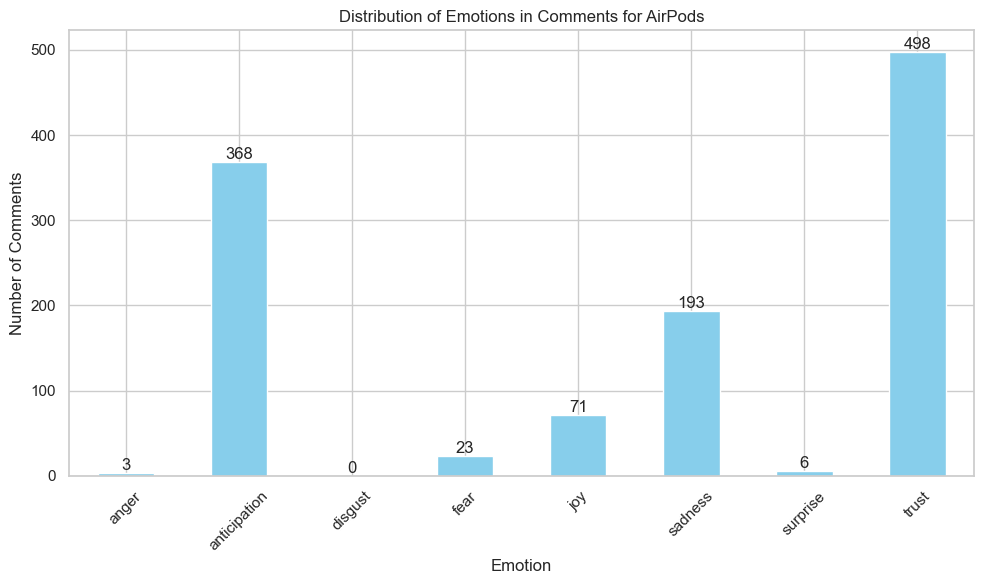

In [310]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_airpods.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for AirPods')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.5. Apple Watch***

In [311]:
df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_15567/164227614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)


Search  Product Price  \
1000  Apple Watch            399   
1001  Apple Watch            369   
1002  Apple Watch             71   
1003  Apple Watch             44   
1004  Apple Watch             29   
...           ...            ...   
1995  Apple Watch             18   
1996  Apple Watch              6   
1997  Apple Watch             21   
1998  Apple Watch             14   
1999  Apple Watch              0   

                                                Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                        Cleaned_Comment  \
1000  often upgrade smart device upgrade iphone ever...   
1001  apple watch series size latest operation apple...   
1002  wish read review purchased many review spot bo...   
1003  say watch good reasonably price useful feature...   
1004  charging station one favorite recent purchase ...   
...                                                 ...   
1995  k price one received mark strap doesnot come g...   
1996  comfortable replacement old tired original app...   
1997  strap great look feel like apple strap well wo...   
1998  good value moneycolour true advertised colourl...   
1999  love product colour combination outfit fabulou...   

                                      Sentiment_Comment  Length Price_Segment  \
1000  How often do you upgrade your smart devices ? ...    8134     Expensive   
1001  The Apple Watch Series [ SIZE ] is the latest ...    5039     Expensive   
1002  I wish I had read these reviews before I purch...    3873     Expensive   
1003  I have to say this watch is good , and reasona...    3539     Expensive   
1004  This charging station is one of my favorite re...    3339     Expensive   
...                                                 ...     ...           ...   
1995  K for the price . The one i received has a mar...     111     Expensive   
1996  Very comfortable replacement for an old tired ...     111         Cheap   
1997  These straps are great they look and feel just...     111     Expensive   
1998  Very good value for moneyColour true to advert...     111         Cheap   
1999  Love this product - colour combinations with m...     110         Cheap   

                                      Tokenized_Comment  Topic  \
1000  [often, upgrade, smart, device, upgrade, iphon...      3   
1001  [apple, watch, series, size, latest, operation...      3   
1002  [wish, read, review, purchased, many, review, ...      0   
1003  [say, watch, good, reasonably, price, useful, ...      3   
1004  [charging, station, one, favorite, recent, pur...      4   
...                                                 ...    ...   
1995  [k, price, one, received, mark, strap, doesnot...      3   
1996  [comfortable, replacement, old, tired, origina...      2   
1997  [strap, great, look, feel, like, apple, strap,...      2   
1998  [good, value, moneycolour, true, advertised, c...      1   
1999  [love, product, colour, combination, outfit, f...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9995                Positive                Positive   
1001                0.9971                Positive                Positive   
1002               -0.3640                Negative                Positive   
1003                0.9954                Positive                Positive   
1004

In [312]:
df_watch[['Comment','Emotion']]

Comment  \
1000  How often do you upgrade your smart devices? I...   
1001  The Apple Watch Series 8 is the latest iterati...   
1002  I wish I had read these reviews before I purch...   
1003  I have to say this watch is good, and reasonab...   
1004  This charging station is one of my favorite re...   
...                                                 ...   
1995  Ok for the price. The one i received has a mar...   
1996  Very comfortable replacement for an old tired ...   
1997  These straps are great they look and feel just...   
1998  Very good value for moneyColour true to advert...   
1999  Love this product - colour combinations with m...   

                                    Emotion  
1000                           anticipation  
1001                                   fear  
1002                           anticipation  
1003                           anticipation  
1004                           anticipation  
...                                     ...  
1995                           fear sadness  
1996                 anticipation joy trust  
1997  anger anticipation joy surprise trust  
1998                                  trust  
1999                              joy trust  

[1000 rows x 2 columns]

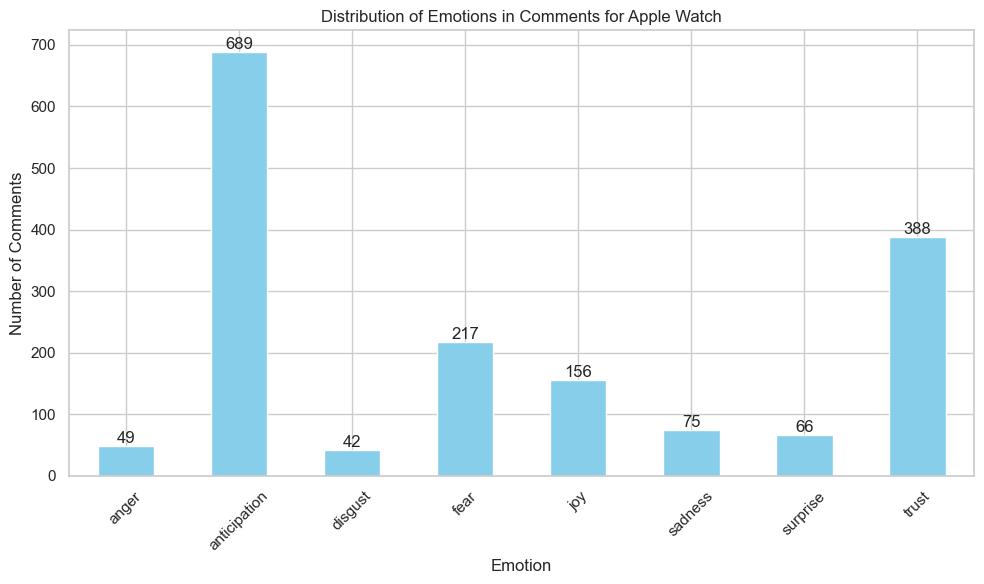

In [313]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_watch.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Apple Watch')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [314]:
df_iphone.to_excel('Output/Amazon/amazon_iphone.xlsx', index=False)
df_airpods.to_excel('Output/Amazon/amazon_airpods.xlsx', index=False)
df_ipad.to_excel('Output/Amazon/amazon_ipad.xlsx', index=False)
df_mac.to_excel('Output/Amazon/amazon_mac.xlsx', index=False)
df_watch.to_excel('Output/Amazon/amazon_watch.xlsx', index=False)